### 전처리에 사용되는 모듈 임포트

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
import scipy.misc
import scipy.stats
import statistics
import cv2
from tqdm import tqdm_notebook
from pandas import DataFrame
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

### 파일 경로로 부터 데이터 로드

In [3]:
# cwd = os.getcwd() #현재 열어놓은 폴더의 주소를 가져 오는 함수.
dir_name = 'text_folder/Newdata/'
path =  'C:/Users/user/processing' + '/' + dir_name # 경로 추적
print ("[%d] CATEGORIES ARE IN \n %s" % (len(os.listdir(path)), path))

categories = os.listdir(path) # data 폴더 안에 있는 폴더 명
ncategories = len(categories)
valid_extscsv = [".csv"]
valid_extsimg = [".jpg", ".gif", ".png", ".jpeg"]

print(categories)
where = []
dfs = []
labelsimg = []
labelscsv = []
num = 0
imgs = []

def imread(path):
    img = scipy.misc.imread(path).astype(np.float)
    if len(img.shape) == 2:
        img = np.transpose(np.array([img, img, img]), (2, 0, 1))
    return img

# LOAD ALL IMAGES

for i, category in enumerate(categories):
    iter = 0
    for file in os.listdir(path + '/'+ category):
        if iter == 0:
            ext = os.path.splitext(file)[1]
            if ext.lower() not in valid_extscsv:
                continue
#             if category is '1' or category is '2' or category is '3' or category is '4' or category is '5' or category is '6':
#                 break #주희꺼 데이터 분석할 때 데이터 짤라서 비교
            #fullpath = os.path.join(path + category, file)
            #here = os.path.join("/" + category, file)
            #where.append(here)
           
            #if i >= 18 and i <=25:
                #continue
            df = np.loadtxt(path + category+'/'+file,delimiter=',')
            df = np.array(df)
              
            dfs.append(df) # NORMALIZE IMAGE 
            label_curr = i
            labelscsv.append(label_curr)
         
for i, category in enumerate(categories):
    iter = 0
    for file in os.listdir(path + '/'+ category):
        if iter == 0:
            ext = os.path.splitext(file)[1]
            if ext.lower() not in valid_extsimg:
                continue
#             if category is '1' or category is '2' or category is '3' or category is '4' or category is '5' or category is '6':
#                 break
            #fullpath = os.path.join(path + category, file)
            #here = os.path.join("/" + category, file)
            #where.append(here)
            #if i >= 18 and i <=25:
                #continue
            img = cv2.imread(path + category+'/'+file) #왜 경로를 현재파일 이후로 지정해야 gray스케일이 나오는지는 알아봐야함
            img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            if img.shape[0] != 918:
                img = cv2.resize(img,(918,918))
            #img = scipy.misc.imread(dir_name + category+'/'+file).astype(np.int32)
            #img = scipy.misc.imresize(imread(fullpath), [370,370, 3])
            #img = img.astype('int32')
            #img = img.astype('float32')
            #img /= 255
            imgs.append(img) # NORMALIZE IMAGE 
            label_curr = i
            labelsimg.append(label_curr)

print ("Num dfs: %d" % (len(dfs)))
print ("Num labels: %d" % (len(labelscsv)))
print (ncategories)

[96] CATEGORIES ARE IN 
 C:/Users/user/processing/text_folder/Newdata/
['001_LKM', '002_KIM_JIHOON', '003_KSI', '004_CJH', '005_BMC', '006_LHM', '007_LDY', '008_KHH', '009_YCY', '010_KIM_JOONHYEONG', '011_JMY', '012_SYO', '013_LTH', '014_KYJ', '015_Solichin', '016_JHU', '017_KDH', '018_JKH', '019_Subash Lama', '020_Sohel Rana', '021_Gaueshkhadeu', '022_Rohan khadka', '023_Sahjiv Sapkora', '024_RasinOralaw', '025_Tara Lama Ginising', '026_SabinaTimalsina', '027_YangEunSeek', '028_Uma Rai', '029_Bayinder lcaur', '030_Nim Tsheminj', '031_LamuShrepa', '032_Suban Magar', '033_Buddha Syangbo', '034_Sandip tiwri', '035_Karma sonam Lama', '036_ParkJaeHyeon', '037_Vikasduhan', '038_BanHyeonJung', '039_Abebe Mola', '040_Luu Thuy Dung', '041_Nguyen Thi Nhu Y', '042_Nguyen Duy Phuong', '043_Nguyen Thi Thu Huong', '044_Pham Thi Thao Nguyen', '045_Lin Xiangling', '046_Nguyen Thanh Thu', '047_Nguyen Anh Tho', '048_Abdullaev bakhromjon', '049_Truong Van Tuan Anh', '050_Do Van Truyen', '051_Nguyen Quan

### 로드된 데이터 확인

(918, 918, 3)


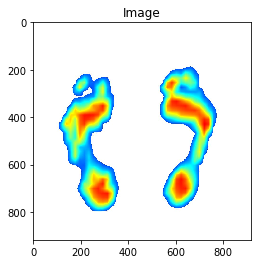

In [4]:
row, col,_ = imgs[14].shape
print((imgs[35].shape))
plt.imshow(imgs[0], cmap = "gray")
plt.title("Image")
img = np.array(imgs[12])
plt.imshow(img)
plt.show()

## Numerical data를 이용한 특성 데이터 생성 과정 시작
- 학습에 사용된 특성 변수값 선언
- 특성 데이터 생성 전처리

error 10 번째 데이터


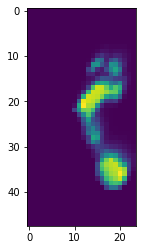

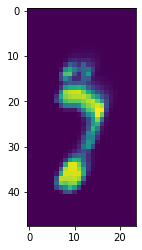

error 221 번째 데이터


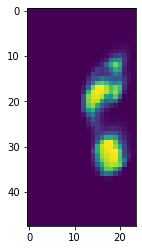

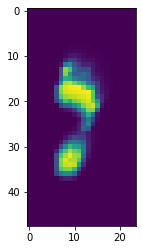

error 265 번째 데이터


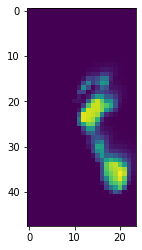

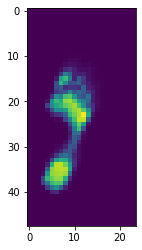

끝


In [5]:
import numpy as np
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import mlab,cm
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
from itertools import chain

df_maxpressure = []
df_leftmaxpressure = []
df_rightmaxpressure = []

df_meanpressure = []
df_Leftmeanpressure = []
df_Rightmeanpressure = []

df_sumpressure = []
df_Leftsumpressure = []
df_Rightsumpressure = []

df_median = []
df_leftmedian = []
df_rightmedian = []

df_std = []
df_leftstd = []
df_rightstd = []

df_skew = []
df_leftskew = []
df_rightskew = []

df_kurto = []
df_leftkurto = []
df_rightkurto = []

df_count = []
df_leftcount = []
df_rightcount = []

df_left_ff=[]# Front left
df_left_rr=[]# Rear left

df_right_ff=[]# Front right
df_right_rr=[]# Rear right

df_x_cop_l = []#x 의 압력중심 Left
df_x_cop_r = []#x 의 압력중심 Right

df_y_cop_l = []#y 의 압력중심 Left
df_y_cop_r = []#y 의 압력중심 Right

df_ly_mid = []#mid x 위치 left
df_lx_mid = []#mid y 위치 left

df_ry_mid = []#mid x 위치 right
df_rx_mid = []#mid y 위치 right

for i in range(len(dfs)):
#     print(categories[labelsimg[i]],labelsimg[i],'type',i%5)

    count = 0
    
    yl_min = 0
    yr_min = 0
    
    xl_min = 0
    xr_min = 0
    
    ylm = []
    yrm = []
    
    xln = []
    xrn = []
    
    x_cop_l = []
    x_cop_r = []
    
    y_cop_l = []
    y_cop_r = []

    leftcount = 0
    rightcount = 0
    
    
    df = np.array(dfs[i])
    img = imgs[i]
    
    outdata = np.zeros((48, 48), dtype="uint8")

    
    for j in range(48):
        left = df[:,0:24+count]
        right = df[:,24+count:]
        if left[j][23+count] != 0 and right[j][0+count] != 0 :
            print('error',i,'번째 데이터')
            count+=1
            plt.imshow(left)
            plt.show()
            plt.imshow(right)
            plt.show()
            
    for m in range(left.shape[0]): # 0,m 이 세로
        for n in range(left.shape[1]): # 1,n 이 가로
            if left[m][n] != 0:
                if yl_min < m:
                    yl_min = m
                    ylm.append(m)
                leftcount+=1
                y_cop_l.append(m * left[m][n])
                
    for n in range(left.shape[1]): # 0,m 이 세로
        for m in range(left.shape[0]): # 1,n 이 가로
            if left[m][n] != 0:
                if xl_min < n:
                    xl_min = n
                    xln.append(n)
                x_cop_l.append(n * left[m][n])
    
                
    ly_mid = int(np.round((max(ylm)-min(ylm)) / 2))
    df_ly_mid.append(ly_mid)
    lx_mid = int(np.round((max(xln)-min(xln)) / 2))
    df_lx_mid.append(lx_mid)

    left = left[min(ylm):max(ylm),min(xln):max(xln)]

    df_left_ff.append(np.sum(left[0:ly_mid,:]))
    df_left_rr.append(np.sum(left[ly_mid:,:]))
    
    df_x_cop_l.append((sum(x_cop_l) / sum(sum(left)) - min(xln)))
    df_y_cop_l.append((sum(y_cop_l) / sum(sum(left)) - min(ylm)))

    
    for m in range(right.shape[0]):
        for n in range(right.shape[1]):
            if right[m][n] != 0:
                if yr_min < m:
                    yr_min = m
                    yrm.append(m)                
                rightcount+=1
                y_cop_r.append(m * right[m][n])
                
    for n in range(right.shape[1]):
        for m in range(right.shape[0]):
            if right[m][n] != 0:
                if xr_min < n:
                    xr_min = n
                    xrn.append(n)
                x_cop_r.append(n * right[m][n])

    ry_mid = int(np.round((max(yrm)-min(yrm)) / 2))
    df_ry_mid.append(ry_mid)
    rx_mid = int(np.round((max(xrn)-min(xrn)) / 2))
    df_rx_mid.append(rx_mid)

    right = right[min(yrm):max(yrm),min(xrn):max(xrn)]

    
    df_right_ff.append(np.sum(right[0:ry_mid,:]))
    df_right_rr.append(np.sum(right[ry_mid:,:]))

    df_x_cop_r.append((sum(x_cop_r) / sum(sum(right)) - min(xrn)))
    df_y_cop_r.append((sum(y_cop_r) / sum(sum(right)) - min(yrm)))
    
    df_count.append(leftcount+rightcount)
    df_leftcount.append(leftcount)
    df_rightcount.append(rightcount)
    
    
    
#     for m in range(48):
#         for m in range(48):
            
            
#     print(leftcount,rightcount,leftcount+rightcount)

    df_maxpressure.append(df.max())
    df_leftmaxpressure.append(left.max())
    df_rightmaxpressure.append(right.max())
    
    df_std.append(np.std(np.nonzero(df)))
    df_leftstd.append(np.std(np.nonzero(left)))
    df_rightstd.append(np.std(np.nonzero(right)))
    
    df_skew.append(stats.skew(stats.skew((df))))
    df_leftskew.append(stats.skew(stats.skew((left))))
    df_rightskew.append(stats.skew(stats.skew((right))))
    
    df_kurto.append(stats.kurtosis(stats.kurtosis(np.nonzero(df))))
    df_leftkurto.append(stats.kurtosis(stats.kurtosis(np.nonzero(left))))
    df_rightkurto.append(stats.kurtosis(stats.kurtosis(np.nonzero(right))))
    
    df_sumpressure.append(np.sum(np.sum(df)))
    df_Leftsumpressure.append(np.sum(np.sum(left)))
    df_Rightsumpressure.append(np.sum(np.sum(right)))

    df_meanpressure.append(np.sum(np.sum(df))/(leftcount+rightcount))
    df_Leftmeanpressure.append(np.sum(np.sum(left))/(leftcount))
    df_Rightmeanpressure.append(np.sum(np.sum(right))/(rightcount))

    df_median.append(np.median(np.median(np.nonzero(df))))
    df_leftmedian.append(np.median(np.median(np.nonzero(left))))
    df_rightmedian.append(np.median(np.median(np.nonzero(right))))
    
    points = np.arange(0,48,1)
    xs,ys = np.meshgrid(points,points)

    
print('끝')

## 생성된 특징 데이터의 확인

In [6]:
print(len(df_leftmaxpressure))
print('max left',np.mean(df_leftmaxpressure))
print('max right', np.mean(df_rightmaxpressure))

print('median left', np.round(np.mean(df_leftmedian),3))
print('median right', np.round(np.mean(df_rightmedian),3))

allsum = df_Leftsumpressure + df_Rightsumpressure
print(np.mean(df_Leftsumpressure))

print('Left mean',np.mean(df_Leftmeanpressure))
print('Right mean',np.mean(df_Rightmeanpressure))

print('Left real area',int(25 * np.mean(df_leftcount)))
print('Right real area',int(25 * np.mean(df_rightcount)))

print('Left Reaction Force',int(25 * np.mean(df_leftcount) * np.mean(df_Leftsumpressure)*0.01/9.81))

print('mid[L,R](x,y)',int(np.mean(df_lx_mid)),int(np.mean(df_ly_mid)),int(np.mean(df_rx_mid)),int(np.mean(df_ry_mid)))

print('COP[L,R](X,Y)', int(np.mean(df_x_cop_l)), int(np.mean(df_y_cop_l)), int(np.mean(df_x_cop_r)), int(np.mean(df_y_cop_r)))

difference_mid_xl = int(np.mean(df_lx_mid)) - int(np.mean(df_x_cop_l))
difference_mid_yl = int(np.mean(df_ly_mid)) - int(np.mean(df_y_cop_l))

difference_mid_xr = int(np.mean(df_rx_mid)) - int(np.mean(df_x_cop_r))
difference_mid_yr = int(np.mean(df_ry_mid)) - int(np.mean(df_y_cop_r))

print('difference(X,Y)','\n L :',difference_mid_xl,difference_mid_yl, '(',np.round(np.sqrt(difference_mid_xl**2 + difference_mid_yl**2),2),')', '\n R :',difference_mid_xr, difference_mid_yr,'(',np.round(np.sqrt(difference_mid_xr**2 + difference_mid_yr**2),2),')')

print('FR balance','\n(',np.round(np.mean(df_left_ff) / (np.mean(df_left_ff)+np.mean(df_left_rr)),4)*100,',',np.round(np.mean(df_left_rr) / (np.mean(df_left_ff)+np.mean(df_left_rr)),4)*100,')')

print('LR balance', np.round(np.mean(df_Leftmeanpressure) / (np.mean(df_Leftmeanpressure) + np.mean(df_Rightmeanpressure)),4)*100,100 - np.round(np.mean(df_Leftmeanpressure) / (np.mean(df_Leftmeanpressure) + np.mean(df_Rightmeanpressure)),4)*100)

480
max left 132.49375
max right 133.47708333333333
median left 8.584
median right 8.16
12297.060416666667
Left mean 40.97923362679632
Right mean 42.637361557412895
Left real area 7506
Right real area 7444
Left Reaction Force 94091
mid[L,R](x,y) 6 15 6 15
COP[L,R](X,Y) 5 16 5 16
difference(X,Y) 
 L : 1 -1 ( 1.41 ) 
 R : 1 -1 ( 1.41 )
FR balance 
( 52.52 , 47.48 )
LR balance 49.01 50.99


## 수집한 96명의 데이터를 분석하기 위해 .csv 를 읽어옴

In [7]:
dff =[]
dfss = []
points1 = np.arange(0,240,1)
points2 = np.arange(0,48,1)
xs,ys = np.meshgrid(points1,points2)



for i in range(len(dfs)):
    df = dfs[i]
    for j in range(48):
        for k in range(48):
            if df[j][k] ==0:
                df[j][k] =None
    df = np.fliplr(np.flip(df))
    

    
    dff.append(df)


cwd = os.getcwd()
dir_name = 'text_folder/'
path = cwd + '/' + dir_name # 경로 추적
information = pd.read_excel('C:/Users/user/processing/' + dir_name + 'subject_information_r2.xlsx')
information.drop(['disease','Phone','E-mail'],axis=1, inplace=True)

ix = []
BMI = []
Type = []

for j in range(len(information)):
    for i in range(5):
        ix.append(information.loc[j])
        BMI.append(round(information['Weight'][i] / ((information['Height'][i]/100)**2),2))
        Type.append(i)

ix = pd.DataFrame(ix)
ix['BMI'] = pd.DataFrame(BMI)

In [8]:
print((df_leftmedian[0]))
print((df_leftstd[0]))

10.0
7.70046814305784


In [9]:
ix = ix.reset_index(drop=True)

ix['Max Pressure'] = pd.DataFrame(df_maxpressure)
ix['Left Max Pressure'] = pd.DataFrame(df_leftmaxpressure)
ix['Right Max Pressure'] = pd.DataFrame(df_rightmaxpressure)

ix['Mean Pressure'] = pd.DataFrame(df_meanpressure)
ix['Left Mean Pressure'] = pd.DataFrame(df_Leftmeanpressure)
ix['Right Mean Pressure'] = pd.DataFrame(df_Rightmeanpressure)

ix['Median Pressure'] = pd.DataFrame(df_median)
ix['Left Median Pressure'] = pd.DataFrame(df_leftmedian)
ix['Right Median Pressure'] = pd.DataFrame(df_rightmedian)

ix['std'] = pd.DataFrame(df_std)
ix['Left std'] = pd.DataFrame(df_leftstd)
ix['Right std'] = pd.DataFrame(df_rightstd)

ix['Sum Pressure'] = pd.DataFrame(df_sumpressure)
ix['Left Sum Pressure'] = pd.DataFrame(df_Leftsumpressure)
ix['Right Sum Pressure'] = pd.DataFrame(df_Rightsumpressure)

ix['Skewness'] = pd.DataFrame(df_skew)
ix['Left Skewness'] = pd.DataFrame(df_leftskew)
ix['Right Skewness'] = pd.DataFrame(df_rightskew)

ix['Kurtosis'] = pd.DataFrame(df_kurto)
ix['Left Kurtosis'] = pd.DataFrame(df_leftkurto)
ix['Right Kurtosis'] = pd.DataFrame(df_rightkurto)

# ix['Area'] = pd.DataFrame(df_count)
# ix['Left Area'] = pd.DataFrame(df_leftcount)
# ix['Right Area'] = pd.DataFrame(df_rightcount)

ix['Left Front sum'] = pd.DataFrame(df_left_ff)
ix['Left Rear sum'] = pd.DataFrame(df_left_rr)

ix['Right Front sum'] = pd.DataFrame(df_right_ff)
ix['Right Rear sum'] = pd.DataFrame(df_right_rr)

ix['Type'] = pd.DataFrame(Type)
ix.to_csv('C:/Users/user/processing/text_folder/revised_info_r.csv',encoding = 'cp949')

## 이미지 관련 데이터의 전처리 함수들
- calculation_area : 컨투어(경계선)내 면적 계산용 함수
- splitcolor : 읽어온 이미지의 색감을 RGB로 분리하여 HSV컬러로 변화 후, 각 색감의 면적과 컨투어 이미지를 반환
- split_blue_color : splitcolor와 동일한 목적이나, blue 색감의 컨투어만 추출.
- crop_rect : 이미지 내의 객체를 사각형으로 도려내어 반환하는 작업
- black_white : 학습에 있어 이미지의 불필요한 부분을 제가하기 위한 함수.

In [12]:
def calculation_area(contours):
    area = []
    for num in range(len(contours)):
        area.append(cv2.contourArea(contours[num]))
    return area

In [22]:
#Color 구분하는 코드
def splitcolor(img,newwhiteboard,row,col):
    img_hsv = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)#HSV 변환 이미지
            
    lower_blue = (100-20,30,30)
    upper_blue = (100+20,255,255)

    lower_green = (60-20,30,30)
    upper_green = (60+20,255,255)

    lower_red = (20-20,30,30)
    upper_red = (20+20,255,255)

    mask_blue = cv2.inRange(img_hsv,lower_blue,upper_blue)
    mask_green = cv2.inRange(img_hsv,lower_green,upper_green)
    mask_red = cv2.inRange(img_hsv,lower_red,upper_red)

    img_blue = cv2.bitwise_and(img,img, mask = mask_blue)
    img_green = cv2.bitwise_and(img,img, mask = mask_green)
    img_red = cv2.bitwise_and(img,img, mask = mask_red)

    HSMb = cv2.morphologyEx(mask_blue, cv2.MORPH_OPEN, np.ones((2,2),np.uint8), iterations=2)
    HSMCb = cv2.morphologyEx(HSMb, cv2.MORPH_CLOSE, np.ones((2,2),np.uint8), iterations=2)
    LHSMCb = HSMCb[0:np.int0(col),0:np.int0(row/2)]
    RHSMCb = HSMCb[0:np.int0(col),np.int0(row/2):np.int0(row)]

    
    HSMg = cv2.morphologyEx(mask_green, cv2.MORPH_OPEN, np.ones((2,2),np.uint8), iterations=2)
    HSMCg = cv2.morphologyEx(HSMg, cv2.MORPH_CLOSE, np.ones((2,2),np.uint8), iterations=2)
    LHSMCg = HSMCg[0:np.int0(col),0:np.int0(row/2)]
    RHSMCg = HSMCg[0:np.int0(col),np.int0(row/2):np.int0(row)]

    HSMr = cv2.morphologyEx(mask_red, cv2.MORPH_OPEN, np.ones((2,2),np.uint8), iterations=2)
    HSMCr = cv2.morphologyEx(HSMr, cv2.MORPH_CLOSE, np.ones((2,2),np.uint8), iterations=2)
    LHSMCr = HSMCr[0:np.int0(col),0:np.int0(row/2)]
    RHSMCr = HSMCr[0:np.int0(col),np.int0(row/2):np.int0(row)]

    mode = cv2.RETR_EXTERNAL
    method = cv2.CHAIN_APPROX_NONE

    lcontoursb, hierarchy = cv2.findContours(LHSMCb, mode, method)
    lcontoursg, hierarchy = cv2.findContours(LHSMCg, mode, method)
    lcontoursr, hierarchy = cv2.findContours(LHSMCr, mode, method)

    rcontoursb, hierarchy = cv2.findContours(RHSMCb, mode, method)
    rcontoursg, hierarchy = cv2.findContours(RHSMCg, mode, method)
    rcontoursr, hierarchy = cv2.findContours(RHSMCr, mode, method)
    
#     cv2.drawContours(newwhiteboard[0:np.int0(col),0:np.int0(row/2)],lcontoursb,-1,(0,0,255),1) 
#     cv2.drawContours(newwhiteboard[0:np.int0(col),0:np.int0(row/2)],lcontoursg,-1,(0,255,0),1) 
#     cv2.drawContours(newwhiteboard[0:np.int0(col),0:np.int0(row/2)],lcontoursr,-1,(255,0,0),1) 
    
#     cv2.drawContours(newwhiteboard[0:np.int0(col),np.int0(row/2):np.int0(row)],rcontoursb,-1,(0,0,255),1) 
#     cv2.drawContours(newwhiteboard[0:np.int0(col),np.int0(row/2):np.int0(row)],rcontoursg,-1,(0,255,0),1) 
#     cv2.drawContours(newwhiteboard[0:np.int0(col),np.int0(row/2):np.int0(row)],rcontoursr,-1,(255,0,0),1)
    
    lbarea = []
    lgarea = []
    lrarea = []
    
    rbarea = []
    rgarea = []
    rrarea = []
    
    lbarea = calculation_area(lcontoursb)
    lgarea = calculation_area(lcontoursg)
    lrarea = calculation_area(lcontoursr)
        
    rbarea = calculation_area(rcontoursb)
    rgarea = calculation_area(rcontoursg)
    rrarea = calculation_area(rcontoursr)
    
    total_left_blue_area = sum(lbarea)-sum(lgarea)
    total_left_green_area = sum(lgarea)-sum(lrarea)
    total_left_red_area = sum(lrarea)
    sum_total_left_area = total_left_blue_area + total_left_green_area*2 + total_left_red_area*3
       
    total_right_blue_area = sum(rbarea)-sum(rgarea)
    total_right_green_area = sum(rgarea)-sum(rrarea)
    total_right_red_area = sum(rrarea)
    sum_total_right_area = total_right_blue_area + total_right_green_area*2 + total_right_red_area*3
    

        
    return sum_total_left_area,sum_total_right_area,total_left_blue_area,total_left_green_area,total_left_red_area,total_right_blue_area,total_right_green_area,total_right_red_area,lcontoursb,lcontoursg,lcontoursr,rcontoursb,rcontoursg,rcontoursr

In [23]:
#blue color 구분하는 코드
def split_blue_color(img,bluewhiteboard,row,col):
    img_hsv = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)#HSV 변환 이미지
    
   
    lower_blue = (100-20,30,30)
    upper_blue = (100+20,255,255)

    mask_blue = cv2.inRange(img_hsv,lower_blue,upper_blue)

    img_blue = cv2.bitwise_and(img,img, mask = mask_blue)
    

    HSMb = cv2.morphologyEx(mask_blue, cv2.MORPH_OPEN, np.ones((2,2),np.uint8), iterations=2)
    HSMCb = cv2.morphologyEx(HSMb, cv2.MORPH_CLOSE, np.ones((2,2),np.uint8), iterations=2)
    LHSMCb = HSMCb[0:np.int0(col),0:np.int0(row/2)]
    RHSMCb = HSMCb[0:np.int0(col),np.int0(row/2):np.int0(row)]

    mode = cv2.RETR_EXTERNAL
    method = cv2.CHAIN_APPROX_NONE

    contoursb, hieracrchy = cv2.findContours(HSMCb,mode,method)
    
    lcontoursb, hierarchy = cv2.findContours(LHSMCb, mode, method)

    rcontoursb, hierarchy = cv2.findContours(RHSMCb, mode, method)

    cv2.drawContours(bluewhiteboard[0:np.int0(col),0:np.int0(row/2)],lcontoursb,-1,(0,0,255),3) 

    cv2.drawContours(bluewhiteboard[0:np.int0(col),np.int0(row/2):np.int0(row)],rcontoursb,-1,(0,0,255),3) 

    Lallcontours = lcontoursb[0]#0번째를 미리 넣어두고 시작해야함
    Rallcontours = rcontoursb[0]#0번째를 미리 넣어두고 시작해야함
    allcontours = contoursb[0]
    for L in range(len(contoursb)):
        if cv2.contourArea(contoursb[L]) > 4000:
            allcontours = np.concatenate((allcontours,contoursb[L]))
    hull = cv2.convexHull(allcontours)
    
    
    for L in range(len(lcontoursb)):
        if cv2.contourArea(lcontoursb[L]) > 4000:
            Lallcontours = np.concatenate((Lallcontours,lcontoursb[L]))
    Lhull = cv2.convexHull(Lallcontours)
    #cv2.drawContours(whiteimg1,[Lhull],0,(255,0,255),1)

    for R in range(len(rcontoursb)):
        if cv2.contourArea(rcontoursb[R]) > 4000:
            Rallcontours = np.concatenate((Rallcontours,rcontoursb[R]))
    Rhull = cv2.convexHull(Rallcontours)

    lbarea = calculation_area(lcontoursb)
    rbarea = calculation_area(rcontoursb)

    return Lallcontours,Rallcontours,lbarea,rbarea,bluewhiteboard,allcontours

In [24]:
def crop_rect(img, rect):
    # get the parameter of the small rectangle
    center = rect[0]
    size = rect[1]
    angle = rect[2]
    center, size = tuple(map(int, center)), tuple(map(int, size))

    # get row and col num in img
    height, width = img.shape[0], img.shape[1]
    print("width: {}, height: {}".format(width, height))

    M = cv2.getRotationMatrix2D(center, angle, 1)
    img_rot = cv2.warpAffine(img, M, (width, height))

    img_crop = cv2.getRectSubPix(img_rot, size, center)

    return img_crop, img_rot

In [25]:
def black_white(img,direction):#불필요한 검은부분, 면적 작은 부분 없애는 함수
    height, width = img.shape[0],img.shape[1]
    
    subimg = img.copy()
    copyimg = img.copy()
    
    for i in range(height):#부분적으로 검은색(0,0,0) 픽셀이면 흰색(255,255,255)로 변환하는 구문
        for j in range(width):
            if (img[i,j] == 0).all():
                img[i,j] = 255

#     cv2.imwrite('img.png', cv2.cvtColor(img,cv2.COLOR_RGB2BGR))
    
    img_hsv = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)#HSV 변환 이미지
    
    lower_red = (20-20,30,30)
    upper_red = (20+20,255,255)

    lower_blue = (100-20,30,30)
    upper_blue = (100+20,255,255)

    lower_green = (60-20,30,30)
    upper_green = (60+20,255,255)
    
    lower_color = (20-20,30,30)
    upper_color = (100+20,255,255)
    
    mask_red = cv2.inRange(img_hsv,lower_red,upper_red)
    mask_blue = cv2.inRange(img_hsv,lower_blue,upper_blue)
    mask_green = cv2.inRange(img_hsv,lower_green,upper_green)


#     kernel = np.ones((10,10),np.uint8)
    kernel = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=np.uint8)
#     mask_red = cv2.erode(mask_red, kernel,iterations = 4)
    
 
    mask_red = cv2.morphologyEx(mask_red, cv2.MORPH_OPEN, kernel, iterations = 4) #형태변환, open 노이즈 제거
    mask_red = cv2.morphologyEx(mask_red, cv2.MORPH_CLOSE, kernel, iterations = 4) #형태변환, close 내부 노이즈 제거

#     cv2.imwrite('mask_red.png', cv2.cvtColor(mask_red,cv2.COLOR_RGB2BGR))

    contoursr,_= cv2.findContours(mask_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    contoursb,_= cv2.findContours(mask_blue, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    contoursg,_= cv2.findContours(mask_green, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    Lallcontoursg = contoursg[0]
    for L in range(len(contoursg)):
        if cv2.contourArea(contoursg[L]) > 3000:
            Lallcontoursg = np.concatenate((Lallcontoursg,contoursg[L]))
    gLhull = cv2.convexHull(Lallcontoursg)
    
    Lallcontoursr = contoursr[0]
    for L in range(len(contoursr)):
        if cv2.contourArea(contoursr[L]) > 2000:
            Lallcontoursr = np.concatenate((Lallcontoursr,contoursr[L]))
    rLhull = cv2.convexHull(Lallcontoursr)
    
    x2,y2,w2,h2 = cv2.boundingRect(gLhull)
    x3,y3,w3,h3 = cv2.boundingRect(rLhull)
    Lhullbottommost = (tuple(rLhull[rLhull[:,:,1].argmax()][0])) #
    degree = np.arctan( (h3/2) / (Lhullbottommost[1] - (x3+w3/2)) ) * 180 / np.pi
    ellipse_length = np.sqrt(np.square(Lhullbottommost[0] - (y3+h3/2)) + np.square(Lhullbottommost[1] - (x3+w3/2)))
#     print('dgree',degree)
    """도형의 외곽선"""
    for i in range(y2-15):#부분적으로 검은색(0,0,0) 픽셀이면 흰색(255,255,255)로 변환하는 구문
        for j in range(width):
            if (img[i,j] != 255).any():
                img[i,j] = 255

    mask = np.zeros(img.shape).astype(img.dtype)
    color = [255,255,255]
    
    ellipse_mask = np.zeros(img.shape).astype(img.dtype)
        
    if direction == 1:
        pt = cv2.ellipse2Poly((np.int0(x3 + w3/2),np.int0(y3+h3/2)),(np.int0(w3*1.0),np.int0(h3/2 +30)),-np.int0(degree-40),0,360,10)
    else:
        pt = cv2.ellipse2Poly((np.int0(x3 + w3/2),np.int0(y3+h3/2)),(np.int0(w3*1.0),np.int0(h3/2 +30)),np.int0(degree-40),0,360,10)
    
    for cnt in contoursb:
        area = cv2.contourArea(cnt)
        if area > 10000:
            cv2.fillPoly(mask,[cnt],color)
            
    cv2.fillPoly(ellipse_mask,[pt],color)

    
    for i in range(np.int0(height - (y3+h3/2))):#부분적으로 검은색(0,0,0) 픽셀이면 흰색(255,255,255)로 변환하는 구문
        for j in range(width):
            if (ellipse_mask[i+np.int0(y3+h3/2),j] == 0).all():
                ellipse_mask[i+np.int0(y3+h3/2),j] = 255

#     cv2.imwrite('ellipse_mask.png', cv2.cvtColor(ellipse_mask,cv2.COLOR_RGB2BGR))
    
    img = cv2.bitwise_and(img,mask)

    img = cv2.bitwise_and(img,ellipse_mask)
    
    
    img_hsv = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)#HSV 변환 이미지
    mask_color = cv2.inRange(img_hsv,lower_color,upper_color)

    maincontoursb,_= cv2.findContours(mask_color, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    Lallcontoursb = maincontoursb[0]

    for L in range(len(maincontoursb)):
        if cv2.contourArea(maincontoursb[L]) > 3000:
            Lallcontoursb = np.concatenate((Lallcontoursb,maincontoursb[L]))
    bLhull = cv2.convexHull(Lallcontoursb)
    
    x1,y1,w1,h1 = cv2.boundingRect(bLhull)

    submask = np.zeros(img.shape).astype(img.dtype)
    submask = cv2.rectangle(submask,(0,np.int0(y1 + h1/3)),(np.int0(width), np.int0(y1+ h1/3*2)),color,-1)
    subimg = cv2.bitwise_and(subimg,submask) #sub img 생성하는 bitwise 연산
    
    
    for i in range(height):#부분적으로 검은색(0,0,0) 픽셀이면 흰색(255,255,255)로 변환하는 구문
        for j in range(width):
            if (subimg[i,j] == 0).all():
                subimg[i,j] = 255
    
    subimg_hsv = cv2.cvtColor(subimg,cv2.COLOR_RGB2HSV)#HSV 변환 이미지
    submask_color = cv2.inRange(subimg_hsv,lower_color,upper_color)   
    subcontoursb,_= cv2.findContours(submask_color, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    cv2.drawContours(copyimg,subcontoursb,-1,(255,0,0),3)
    cv2.drawContours(copyimg,maincontoursb,-1,(255,0,0),3)
    
#     cv2.imwrite('copyimg.png', cv2.cvtColor(copyimg,cv2.COLOR_RGB2BGR))
#     plt.imshow(copyimg)
#     plt.show()

    """4 : Arch index 계산"""
#     print('img area',calculation_area(maincontoursb))
#     print('subimg area',calculation_area(subcontoursb))
#     print('Arch index',np.float64(np.sum(calculation_area(subcontoursb))) / np.float64(np.sum(calculation_area(maincontoursb))))
    
    subarea = np.float64(np.sum(calculation_area(subcontoursb)))
    mainarea = np.float64(np.sum(calculation_area(maincontoursb)))
    Arch_index = subarea / mainarea
    
    
    for i in range(height):#부분적으로 검은색(0,0,0) 픽셀이면 흰색(255,255,255)로 변환하는 구문
        for j in range(width):
            if (img[i,j] == 0).all():
                img[i,j] = 255

#     cv2.imwrite('finalimg.png', cv2.cvtColor(img,cv2.COLOR_RGB2BGR))
    
    img = img[ y1-10 : y1+h1+10, x1 : x1+w1]
    
    return img, Arch_index,mainarea,subarea,w1,h1

# 이미지 전처리 과정 시작

In [13]:
archindex = []
sumarchindex = []
whitefile = 'C:/Users/user/processing/image/white.jpg'
LR_balance = []
LUL_balance = []
RUL_balance = []
#def calculation_area(contours):
left_rect = []
right_rect = []
all_rect = []

Lwidth = []
Llength = []
Langle = []
Rwidth = []
Rlength = []
Rangle = []

Lmain_area = []
Rmain_area = []
Lsub_area = []
Rsub_area = []

left_rot = []
right_rot = []
contour_left_rot = []
contour_right_rot = []

left_five_pos = []
right_five_pos = []
contour_left_five_pos = []
contour_right_five_pos = []

left_ten_pos = []
right_ten_pos = []
contour_left_ten_pos = []
contour_right_ten_pos = []

left_five_neg = []
right_five_neg = []
contour_left_five_neg = []
contour_right_five_neg = []

left_ten_neg = []
right_ten_neg = []
contour_left_ten_neg = []
contour_right_ten_neg = []



revisedimg = []

def prop_img(imgs):
    for k in tqdm_notebook(range(len(imgs))):
        print('====================[%d]====================='%k)

        img = imgs[k].copy()
        newimg = imgs[k].copy()

        row,col,_ = img.shape

        bluewhiteboard = cv2.imread(whitefile,cv2.IMREAD_COLOR)
        lcontoursb1,rcontoursb1,lbarea1,rbarea1,bluewhiteboard,allcontours = split_blue_color(img,bluewhiteboard,row,col)
        x,y,w,h = cv2.boundingRect(allcontours)
                
        roiimg = img[y-30:y+h+30,x-30:x+w+30]
        roi_width,roi_height,_ = roiimg.shape
        
        center_disp_x = np.int0(row/2 - (2*x + w)/2)
        center_disp_y = np.int0(col/2 - (2*y + h)/2)
        
        roi_move = cv2.imread(whitefile,cv2.IMREAD_COLOR)
        roi_move[y+center_disp_y-30:y+center_disp_y+h+30,x+center_disp_x-30:x+center_disp_x+w+30] = roiimg
        
#         cv2.imwrite('roi_move.png', cv2.cvtColor(roi_move,cv2.COLOR_RGB2BGR))

        
        revisedimg.append(roi_move)
        """ROI MOVE"""
        #draw_histogram(img)       im
        newwhiteboard = cv2.imread(whitefile,cv2.IMREAD_COLOR)
        sum_total_left_area,sum_total_right_area,total_left_blue_area,total_left_green_area,total_left_red_area,total_right_blue_area,total_right_green_area,total_right_red_area,lcontoursb,lcontoursg,lcontoursr,rcontoursb,rcontoursg,rcontoursr = splitcolor(roi_move,newwhiteboard,row,col)#color 쪼개는 함수

        outputblue = cv2.imread(whitefile,cv2.IMREAD_COLOR)
        _,_,_,_,outputblue,_ = split_blue_color(roi_move,outputblue,row,col)
        
        #white file
        img_aligned = cv2.imread(whitefile,cv2.IMREAD_COLOR)#box drawcontours하기 위한 white
        
        red = cv2.imread(whitefile,cv2.IMREAD_COLOR)#box drawcontours하기 위한 white
        ured = cv2.imread(whitefile,cv2.IMREAD_COLOR)#box drawcontours하기 위한 white
        lred = cv2.imread(whitefile,cv2.IMREAD_COLOR)#box drawcontours하기 위한 white
        
        blue = cv2.imread(whitefile,cv2.IMREAD_COLOR)
        ublue = cv2.imread(whitefile,cv2.IMREAD_COLOR)
        lblue = cv2.imread(whitefile,cv2.IMREAD_COLOR)
        
        green = cv2.imread(whitefile,cv2.IMREAD_COLOR)
        ugreen = cv2.imread(whitefile,cv2.IMREAD_COLOR)
        lgreen = cv2.imread(whitefile,cv2.IMREAD_COLOR)
        
        whiteimg1 = cv2.imread(whitefile,cv2.IMREAD_COLOR)
        white_l = cv2.imread(whitefile,cv2.IMREAD_COLOR)
        #whiteimg1 = cv2.resize(whiteimg1,(128,128))
        whiteboard = cv2.imread(whitefile,cv2.IMREAD_COLOR)
        #whiteboard = cv2.resize(whiteboard,(128,128))
        
        newred =  cv2.imread(whitefile,cv2.IMREAD_COLOR)#fillconvexfully 위한 white
        newured =  cv2.imread(whitefile,cv2.IMREAD_COLOR)#fillconvexfully 위한 white
        newlred =  cv2.imread(whitefile,cv2.IMREAD_COLOR)#fillconvexfully 위한 white
        
        newblue =  cv2.imread(whitefile,cv2.IMREAD_COLOR)
        newublue =  cv2.imread(whitefile,cv2.IMREAD_COLOR)
        newlblue =  cv2.imread(whitefile,cv2.IMREAD_COLOR)
        
        newgreen =  cv2.imread(whitefile,cv2.IMREAD_COLOR)
        newugreen =  cv2.imread(whitefile,cv2.IMREAD_COLOR)
        newlgreen =  cv2.imread(whitefile,cv2.IMREAD_COLOR)
        
        white_B = cv2.imread(whitefile,cv2.IMREAD_COLOR)#color B-area contours하기 위한 white
        white_Front_Rear = cv2.imread(whitefile,cv2.IMREAD_COLOR)#color front,rear-area contours하기 위한 white        
        
        white_m = cv2.imread(whitefile,cv2.IMREAD_COLOR)#의미없음
        
        whiteleft_rot = cv2.imread(whitefile,cv2.IMREAD_COLOR)#left_회전 
        whiteleft_contour = cv2.imread(whitefile,cv2.IMREAD_COLOR)#left_회전 
        whiteright_rot = cv2.imread(whitefile,cv2.IMREAD_COLOR)#right_회전
        whiteright_contour = cv2.imread(whitefile,cv2.IMREAD_COLOR)#left_회전 
        
        roi_rot = cv2.imread(whitefile,cv2.IMREAD_COLOR)#right_회전
        roi_rot5 = cv2.imread(whitefile,cv2.IMREAD_COLOR)#right_회전
        roi_rot10 = cv2.imread(whitefile,cv2.IMREAD_COLOR)#right_회전
        roi_rot_5 = cv2.imread(whitefile,cv2.IMREAD_COLOR)#right_회전
        roi_rot_10 = cv2.imread(whitefile,cv2.IMREAD_COLOR)#right_회전
        
        contour_roi_rot = cv2.imread(whitefile,cv2.IMREAD_COLOR)#right_회전
        contour_roi_rot5 = cv2.imread(whitefile,cv2.IMREAD_COLOR)#right_회전
        contour_roi_rot10 = cv2.imread(whitefile,cv2.IMREAD_COLOR)#right_회전
        contour_roi_rot_5 = cv2.imread(whitefile,cv2.IMREAD_COLOR)#right_회전
        contour_roi_rot_10 = cv2.imread(whitefile,cv2.IMREAD_COLOR)#right_회전
        
        #white file end
  
        img_gray = cv2.cvtColor(roi_move,cv2.COLOR_RGB2GRAY) 

        cv2.drawContours(blue[0:np.int0(col),0:np.int0(row/2)],lcontoursb,-1,(0,0,255),1) 
        cv2.drawContours(green[0:np.int0(col),0:np.int0(row/2)],lcontoursg,-1,(0,255,0),1) 
        cv2.drawContours(red[0:np.int0(col),0:np.int0(row/2)],lcontoursr,-1,(255,0,0),1) 
        
        cv2.drawContours(blue[0:np.int0(col),np.int0(row/2):np.int0(row)],rcontoursb,-1,(0,0,255),1) 
        cv2.drawContours(green[0:np.int0(col),np.int0(row/2):np.int0(row)],rcontoursg,-1,(0,255,0),1) 
        cv2.drawContours(red[0:np.int0(col),np.int0(row/2):np.int0(row)],rcontoursr,-1,(255,0,0),1)

        """contour 외곽의 boundary 구하기위한 전처리과정"""
        for i in range(roi_move.shape[0]):
            for j in range(roi_move.shape[1]):
                if (img_gray[i,j]  < 230):
                    img_gray[i,j] = 0
        """contour process"""

        kernel = np.ones((2,2))
        img_gray = cv2.morphologyEx(img_gray, cv2.MORPH_OPEN, kernel, iterations = 2) #형태변환, open 노이즈 제거
        img_gray = cv2.morphologyEx(img_gray, cv2.MORPH_CLOSE, kernel, iterations = 2) #형태변환, close 내부 노이즈 제거
        img_blue1 = cv2.cvtColor(img_gray,cv2.COLOR_GRAY2RGB)
        img_blue2 = cv2.cvtColor(img_gray,cv2.COLOR_GRAY2RGB)
        
        blur =cv2.GaussianBlur(img_gray,(7,7),0)#가우시안 스무딩 적용해서 경계를 선명하게 하고, 잡음 제거 9,9 로 하는게 가장 선명함
        canny = cv2.Canny(blur,100,200)#Canny 필터가 효과가 좋음
        
        leftcanny = canny[0:np.int0(col),0:np.int0(row/2)]
        rightcanny = canny[0:np.int0(col),np.int0(row/2):np.int0(row)]
        
        leftcontours,_ = cv2.findContours(leftcanny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)#컨투어를 찾기위해 앞의 설정한 Canny 필터 적용   
        rightcontours,_ = cv2.findContours(rightcanny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

        """기존 img에 만들어진 contour 덮어 그리기"""
        cv2.drawContours(whiteimg1, leftcontours, -1, (0,0,0), 1)
        cv2.drawContours(whiteimg1[0:np.int0(col),np.int0(row/2):np.int0(row)], rightcontours, -1, (0,0,0), 1)
        
        ################
        
        leftnumcontour = len(leftcontours)
        rightnumcontour = len(rightcontours)
        
        """컨투어의 컨벡스 찾기"""
        Lallcontours = leftcontours[0]#0번째를 미리 넣어두고 시작해야함

        for L in range(leftnumcontour):
            if cv2.contourArea(leftcontours[L]) > 4000:
                Lallcontours = np.concatenate((Lallcontours,leftcontours[L]))
        Lhull = cv2.convexHull(Lallcontours)
        #cv2.drawContours(whiteimg1,[Lhull],0,(255,0,255),1)
        
        Rallcontours = rightcontours[0]#0번째를 미리 넣어두고 시작해야함
        for R in range(rightnumcontour):
            if cv2.contourArea(rightcontours[R]) > 4000:
                Rallcontours = np.concatenate((Rallcontours,rightcontours[R]))
        Rhull = cv2.convexHull(Rallcontours)
        
        #cv2.drawContours(whiteimg1[0:np.int0(col),np.int0(row/2):np.int0(row)],[Rhull],0,(255,0,255),1)

        """극좌표점 찾기"""
        # contour[:,:,0] 은 point의 x좌표 값만 포함하는 배열
        # contour[:,:,1] 은 point의 y좌표 값만 포함하는 배열
        # argmin() 을 적용하면 가장 작은 값의 위치가 나옴.
        # argmax() 을 적용하면 가장 높은 값의 위치가 나옴.
        # 찾은 위치를 다시 contour 에서 찾으면 됨.
        Lleftmost = []
        Lrightmost = []
        Ltopmost = []
        Lbottommost = []
        
        Lhullleftmost =[]
        Lhullrightmost =[]
        Lhulltopmost = []
        Lhullbottommost = []
        
        Lhullleftmost.append(tuple(Lhull[Lhull[:,:,0].argmin()][0]))
        Lhullrightmost.append(tuple(Lhull[Lhull[:,:,0].argmax()][0]))
        Lhulltopmost.append(tuple(Lhull[Lhull[:,:,1].argmin()][0]))
        Lhullbottommost.append(tuple(Lhull[Lhull[:,:,1].argmax()][0]))        
        
        
        Rleftmost = []
        Rrightmost = []
        Rtopmost = []
        Rbottommost = []
                
        Rhullleftmost =[]
        Rhullrightmost =[]
        Rhulltopmost = []
        Rhullbottommost = []
        
        upper_rightmost = 0
        lower_rightmost =  0       
        for i in range(len(Lhull[:,:,0])): # 위쪽, 아래쪽 반 분할 해서 왼발의 Medial line 을 구하기 위함
            if (Lhull[i,0][1] < Lhull[:,:,1].mean() ):
                if upper_rightmost < Lhull[i,0][0]:
                    upper_rightmost = Lhull[i,0][0]
                    r_um = i
            else:
                if lower_rightmost < Lhull[i,0][0]:
                    lower_rightmost = Lhull[i,0][0]
                    r_lm = i

                    
        upper_leftmost = Rhull[:,:,0].mean() 
        lower_leftmost = Rhull[:,:,0].mean()    
        for i in range(len(Rhull[:,:,0])): # 위쪽, 아래쪽 반 분할 해서 오른발의 Medial line 을 구하기 위함
            if (Rhull[i,0][1] < Rhull[:,:,1].mean() ):
                if upper_leftmost > Rhull[i,0][0]:
                    upper_leftmost = Rhull[i,0][0]
                    l_um = i
            else:
                if lower_leftmost > Rhull[i,0][0]:
                    lower_leftmost = Rhull[i,0][0]
                    l_lm = i
                    
                    
        Rhullleftmost.append(tuple(Rhull[Rhull[:,:,0].argmin()][0]))
        Rhullrightmost.append(tuple(Rhull[Rhull[:,:,0].argmax()][0]))
        Rhulltopmost.append(tuple(Rhull[Rhull[:,:,1].argmin()][0]))
        Rhullbottommost.append(tuple(Rhull[Rhull[:,:,1].argmax()][0]))

        for i in range(leftnumcontour):
            Lleftmost.append(tuple(leftcontours[i][leftcontours[i][:,:,0].argmin()][0]))
            Lrightmost.append(tuple(leftcontours[i][leftcontours[i][:,:,0].argmax()][0]))
            Ltopmost.append(tuple(leftcontours[i][leftcontours[i][:,:,1].argmin()][0]))
            Lbottommost.append(tuple(leftcontours[i][leftcontours[i][:,:,1].argmax()][0]))

        
#         print('Lhullleftmost',Lhullleftmost[0][0])
#         print('Lhullrightmost',Lhullrightmost[0][0])
#         print('Lhulltopmost',Lhulltopmost[0][1])
#         print('Lhullbottommost',Lhullbottommost[0][1])
        
        left_rect.append(roi_move[Lhulltopmost[0][1]:Lhullbottommost[0][1],Lhullleftmost[0][0]:Lhullrightmost[0][0]])
        right_rect.append(roi_move[Rhulltopmost[0][1]:Rhullbottommost[0][1],np.int0(row/2)+Rhullleftmost[0][0]:np.int0(row/2)+Rhullrightmost[0][0]])

#         cv2.circle(roi_move,(Lhull[r_um,0][0],Lhull[r_um,0][1]),5,(255,0,0),-1)
#         cv2.circle(roi_move,(Lhull[r_lm,0][0],Lhull[r_lm,0][1]),5,(255,0,0),-1)
#         cv2.circle(roi_move,(Rhull[l_um,0][0] + np.int0(row/2),Rhull[l_um,0][1]),5,(255,0,0),-1)
#         cv2.circle(roi_move,(Rhull[l_lm,0][0] + np.int0(row/2),Rhull[l_lm,0][1]),5,(255,0,0),-1)
        """
        if (leftnumcontour == 2) & (i == 1):
            cv2.line(img,Lbottommost[0],Ltopmost[1],(0,0,0),1)
        elif leftnumcontour == 1:
            cv2.line(img,Lbottommost[0],Ltopmost[0],(255,0,0),1)
        else:
            continue"""

        for j in range(rightnumcontour):
            Rleftmost.append(tuple(rightcontours[j][rightcontours[j][:,:,0].argmin()][0]))
            Rrightmost.append(tuple(rightcontours[j][rightcontours[j][:,:,0].argmax()][0]))
            Rtopmost.append(tuple(rightcontours[j][rightcontours[j][:,:,1].argmin()][0]))
            Rbottommost.append(tuple(rightcontours[j][rightcontours[j][:,:,1].argmax()][0]))
            

#         cv2.circle(roi_move[0:np.int0(col),np.int0(row/2):np.int0(row)],Rhullleftmost[0],5,(0,0,255),-1)
#         cv2.circle(roi_move[0:np.int0(col),np.int0(row/2):np.int0(row)],Rhullrightmost[0],5,(0,0,255),-1)
#         cv2.circle(roi_move[0:np.int0(col),np.int0(row/2):np.int0(row)],Rhulltopmost[0],5,(0,0,255),-1)
#         cv2.circle(roi_move[0:np.int0(col),np.int0(row/2):np.int0(row)],Rhullbottommost[0],5,(0,0,255),-1)


#         print('left dx upper_lower',Lhull[r_um,0][0] - Lhull[r_lm,0][0])
#         print('left dy upper-lower',Lhull[r_um,0][1] - Lhull[r_lm,0][1])
#         print('left degree',np.arctan(-(Lhull[r_um,0][0] - Lhull[r_lm,0][0]) / (Lhull[r_um,0][1] - Lhull[r_lm,0][1])) * 180 / np.pi)
        left_degree = np.arctan(-(Lhull[r_um,0][0] - Lhull[r_lm,0][0]) / (Lhull[r_um,0][1] - Lhull[r_lm,0][1])) * 180 / np.pi
        
#         print('right upper_lower',Rhull[l_um,0][0] - Rhull[l_lm,0][0])
#         print('right upper_lower',Rhull[l_um,0][1] - Rhull[l_lm,0][1])
#         print('right radian',np.arctan(-(Rhull[l_um,0][0] - Rhull[l_lm,0][0]) / (Rhull[l_um,0][1] - Rhull[l_lm,0][1])) * 180 / np.pi-90)
        right_degree = np.arctan(-(Rhull[l_um,0][0] - Rhull[l_lm,0][0]) / (Rhull[l_um,0][1] - Rhull[l_lm,0][1])) * 180 / np.pi-90
        
        """
        if (rightnumcontour == 2) & (j == 1):
            #cv2.line(img[0:np.int0(col),np.int0(row/2):np.int0(row)],Rbottommost[0],Rtopmost[1],(0,0,0),1)
        elif rightnumcontour == 1:
            #cv2.line(img[0:np.int0(col),np.int0(row/2):np.int0(row)],Rbottommost[0],Rtopmost[0],(255,0,0),1)
        else:
            continue"""

        """이미지 객체에 접하는 가장 작은 사각형을 그려줌."""
        """============================================================left================================================================"""
        leftarea = []
        
        for L in range(leftnumcontour):
            if cv2.contourArea(leftcontours[L]) > 4000:
                leftarea.append(cv2.contourArea(leftcontours[L]))
        
        Lrect = []
        Lbox = []

        
        Luharfbox = []
        Llharfbox = []
        Lthirdbox = []
        
        Lrect.append(cv2.minAreaRect(Lallcontours))
        Lbox.append(np.int0(cv2.boxPoints(Lrect[0])))
        x,y,w,h  = (cv2.boundingRect(Lallcontours))
        
        left_contour = outputblue[0:np.int0(col),0:np.int0(row/2)]
        whiteleft_contour[0:np.int0(col),0:np.int0(row/2)] = left_contour
        
        
        left_roi = roi_move[0:np.int0(col),0:np.int0(row/2)]
        whiteleft_rot[0:np.int0(col),0:np.int0(row/2)] = left_roi
        
#         print("rect: {}".format(Lrect[0]))

        center,size,angle = Lrect[0]
        Lcenter, size = tuple(map(int, center)), tuple(map(int, size))

        
        if (Lcenter[1] < Lbox[0][3,1] and Lcenter[1] < Lbox[0][0,1]):#왼쪽으로 기욱 사각형  (Lcenter[1]:y좌표, Lbox[0][3,1]:3번째 Lbox의 y좌표)
            Lthirdbox.append(tuple(Lbox[0][1] + np.abs((Lbox[0][1]-Lbox[0][0])/3*2)))
            Lthirdbox.append(tuple(Lbox[0][1] + np.abs((Lbox[0][1]-Lbox[0][0])/3)))
            Lthirdbox.append(tuple(Lbox[0][2] + np.abs((Lbox[0][3]-Lbox[0][2])/3)))
            Lthirdbox.append(tuple(Lbox[0][2] + np.abs((Lbox[0][3]-Lbox[0][2])/3*2)))#순서주의 1,2,3,4순으로 좌표 더해지기 때문
            Luharfbox.append(tuple(Lbox[0][1]))
            Luharfbox.append(tuple(Lbox[0][1] + np.abs((Lbox[0][1]-Lbox[0][0])/2)))
            Luharfbox.append(tuple(Lbox[0][2] + np.abs((Lbox[0][3]-Lbox[0][2])/2)))
            Luharfbox.append(tuple(Lbox[0][2] ))#순서주의 1,2,3,4순으로 좌표 더해지기 때문
            Llharfbox.append(tuple(Lbox[0][1] + np.abs((Lbox[0][1]-Lbox[0][0]))))
            Llharfbox.append(tuple(Lbox[0][1] + np.abs((Lbox[0][1]-Lbox[0][0])/2)))
            Llharfbox.append(tuple(Lbox[0][2] + np.abs((Lbox[0][3]-Lbox[0][2])/2)))
            Llharfbox.append(tuple(Lbox[0][2] + np.abs((Lbox[0][3]-Lbox[0][2]))))#순서주의 1,2,3,4순으로 좌표 더해지기 때문
            
            if (Lhullbottommost[0][0] < (Lbox[0][3,0] + Lbox[0][0,0])/2):
                angle = left_degree
                                
            M = cv2.getRotationMatrix2D(center, angle, 1)
            M5 = cv2.getRotationMatrix2D(center, angle +1 , 1)
            M10 = cv2.getRotationMatrix2D(center, angle + 2, 1)
            M_5 = cv2.getRotationMatrix2D(center, angle- 1 , 1)
            M_10 = cv2.getRotationMatrix2D(center, angle - 2, 1)
            
            countour_rot = cv2.warpAffine(whiteleft_contour, M, (row, col))
            countour_rot5 = cv2.warpAffine(whiteleft_contour, M5, (row, col))
            countour_rot10 = cv2.warpAffine(whiteleft_contour, M10, (row, col))
            countour_rot_5 = cv2.warpAffine(whiteleft_contour, M_5, (row, col))
            countour_rot_10 = cv2.warpAffine(whiteleft_contour, M_10, (row, col))
            
            contour_left_crop = cv2.getRectSubPix(countour_rot, (size[0]+50,size[1]+50), center)
            contour_left_crop5 = cv2.getRectSubPix(countour_rot5, (size[0]+50,size[1]+50), center)
            contour_left_crop10 = cv2.getRectSubPix(countour_rot10, (size[0]+50,size[1]+50), center)
            contour_left_crop_5 = cv2.getRectSubPix(countour_rot_5, (size[0]+50,size[1]+50), center)
            contour_left_crop_10 = cv2.getRectSubPix(countour_rot_10, (size[0]+50,size[1]+50), center)
            
            contour_roi_rot[np.int0(np.abs(col/2 - size[1]/2)-25):np.int0(np.abs(col/2 + size[1]/2)+25) , np.int0(np.abs(row*1/4 - size[0]/2))-25:np.int0(np.abs(row*1/4 + size[0]/2))+25] = contour_left_crop
            contour_roi_rot5[np.int0(np.abs(col/2 - size[1]/2)-25):np.int0(np.abs(col/2 + size[1]/2)+25) , np.int0(np.abs(row*1/4 - size[0]/2))-25:np.int0(np.abs(row*1/4 + size[0]/2))+25] = contour_left_crop5
            contour_roi_rot10[np.int0(np.abs(col/2 - size[1]/2)-25):np.int0(np.abs(col/2 + size[1]/2)+25) , np.int0(np.abs(row*1/4 - size[0]/2))-25:np.int0(np.abs(row*1/4 + size[0]/2))+25] = contour_left_crop10
            contour_roi_rot_5[np.int0(np.abs(col/2 - size[1]/2)-25):np.int0(np.abs(col/2 + size[1]/2)+25) , np.int0(np.abs(row*1/4 - size[0]/2))-25:np.int0(np.abs(row*1/4 + size[0]/2))+25] = contour_left_crop_5
            contour_roi_rot_10[np.int0(np.abs(col/2 - size[1]/2)-25):np.int0(np.abs(col/2 + size[1]/2)+25) , np.int0(np.abs(row*1/4 - size[0]/2))-25:np.int0(np.abs(row*1/4 + size[0]/2))+25] = contour_left_crop_10            
            
            img_rot = cv2.warpAffine(whiteleft_rot, M, (row, col))
            img_rot5 = cv2.warpAffine(whiteleft_rot, M5, (row, col))
            img_rot10 = cv2.warpAffine(whiteleft_rot, M10, (row, col))
            img_rot_5 = cv2.warpAffine(whiteleft_rot, M_5, (row, col))
            img_rot_10 = cv2.warpAffine(whiteleft_rot, M_10, (row, col))
            
            img_aligned[np.int0(np.abs(col/2 - size[1]/2)-50):np.int0(np.abs(col/2 + size[1]/2)+50) , np.int0(np.abs(row*1/4 - size[0]/2))-50:np.int0(np.abs(row*1/4 + size[0]/2))+50] = cv2.getRectSubPix(img_rot, (size[0]+100,size[1]+100), (center[0],center[1]))
            
            left_crop,Left_Arch_index,Lmainarea,Lsubarea,lw,lh = black_white(cv2.getRectSubPix(img_rot, (size[0]+50,size[1]+50), center),1)
            left_crop5 = cv2.getRectSubPix(img_rot5, (size[0]+50,size[1]+50), center)
            left_crop10 = cv2.getRectSubPix(img_rot10, (size[0]+50,size[1]+50), center)
            left_crop_5 = cv2.getRectSubPix(img_rot_5, (size[0]+50,size[1]+50), center)
            left_crop_10 = cv2.getRectSubPix(img_rot_10, (size[0]+50,size[1]+50), center)
            
            roi_rot[np.int0(np.abs(col/2 - lh/2))-10:np.int0(np.abs(col/2 + lh/2))+10 , np.int0(np.abs(row*1/4 - lw/2)):np.int0(np.abs(row*1/4 + lw/2))] = left_crop
            roi_rot5[np.int0(np.abs(col/2 - size[1]/2)-25):np.int0(np.abs(col/2 + size[1]/2)+25) , np.int0(np.abs(row*1/4 - size[0]/2))-25:np.int0(np.abs(row*1/4 + size[0]/2))+25] = left_crop5
            roi_rot10[np.int0(np.abs(col/2 - size[1]/2)-25):np.int0(np.abs(col/2 + size[1]/2)+25) , np.int0(np.abs(row*1/4 - size[0]/2))-25:np.int0(np.abs(row*1/4 + size[0]/2))+25] = left_crop10
            roi_rot_5[np.int0(np.abs(col/2 - size[1]/2)-25):np.int0(np.abs(col/2 + size[1]/2)+25) , np.int0(np.abs(row*1/4 - size[0]/2))-25:np.int0(np.abs(row*1/4 + size[0]/2))+25] = left_crop_5
            roi_rot_10[np.int0(np.abs(col/2 - size[1]/2)-25):np.int0(np.abs(col/2 + size[1]/2)+25) , np.int0(np.abs(row*1/4 - size[0]/2))-25:np.int0(np.abs(row*1/4 + size[0]/2))+25] = left_crop_10
            
            Lwidth.append(int(lw))
            Llength.append(int(lh))
            Langle.append(-int(angle))       
            Lmain_area.append(int(Lmainarea))
            Lsub_area.append(int(Lsubarea))
#             print('leftrotated angle',-int(angle))
            
        else:#오른쪽으로 기욱 사각형
            Lthirdbox.append(tuple(Lbox[0][1] + ((Lbox[0][2]-Lbox[0][1])/3*2)))
            Lthirdbox.append(tuple(Lbox[0][1] + ((Lbox[0][2]-Lbox[0][1])/3)))
            Lthirdbox.append(tuple(Lbox[0][0] + ((Lbox[0][3]-Lbox[0][0])/3)))
            Lthirdbox.append(tuple(Lbox[0][0] + ((Lbox[0][3]-Lbox[0][0])/3*2)))#
            Luharfbox.append(tuple(Lbox[0][1] + ((Lbox[0][2]-Lbox[0][1]))))
            Luharfbox.append(tuple(Lbox[0][1] + ((Lbox[0][2]-Lbox[0][1])/2)))
            Luharfbox.append(tuple(Lbox[0][0] + ((Lbox[0][3]-Lbox[0][0])/2)))
            Luharfbox.append(tuple(Lbox[0][0] + ((Lbox[0][3]-Lbox[0][0]))))#
            Llharfbox.append(tuple(Lbox[0][3] + ((Lbox[0][0]-Lbox[0][3]))))
            Llharfbox.append(tuple(Lbox[0][3] + ((Lbox[0][0]-Lbox[0][3])/2)))
            Llharfbox.append(tuple(Lbox[0][2] + ((Lbox[0][1]-Lbox[0][2])/2)))#
            Llharfbox.append(tuple(Lbox[0][2] + ((Lbox[0][1]-Lbox[0][2]))))#순서주의 1,2,3,4순으로 좌표 더해지기 때문
            M = cv2.getRotationMatrix2D(center, (90+angle), 1)
            M5 = cv2.getRotationMatrix2D(center, (90+angle) +1, 1)
            M10 = cv2.getRotationMatrix2D(center, (90+angle) +2, 1)
            M_5 = cv2.getRotationMatrix2D(center, (90+angle) -1, 1)
            M_10 = cv2.getRotationMatrix2D(center, (90+angle)-2, 1)
            
            countour_rot = cv2.warpAffine(whiteleft_contour, M, (row, col))
            countour_rot5 = cv2.warpAffine(whiteleft_contour, M5, (row, col))
            countour_rot10 = cv2.warpAffine(whiteleft_contour, M10, (row, col))
            countour_rot_5 = cv2.warpAffine(whiteleft_contour, M_5, (row, col))
            countour_rot_10 = cv2.warpAffine(whiteleft_contour, M_10, (row, col))
            
            contour_left_crop = cv2.getRectSubPix(countour_rot, (size[1]+50,size[0]+50), center)
            contour_left_crop5 = cv2.getRectSubPix(countour_rot5, (size[1]+50,size[0]+50), center)
            contour_left_crop10 = cv2.getRectSubPix(countour_rot10, (size[1]+50,size[0]+50), center)
            contour_left_crop_5 = cv2.getRectSubPix(countour_rot_5, (size[1]+50,size[0]+50), center)
            contour_left_crop_10 = cv2.getRectSubPix(countour_rot_10, (size[1]+50,size[0]+50), center)
            
            contour_roi_rot[np.int0(np.abs(col/2 - size[0]/2)-25):np.int0(np.abs(col/2 + size[0]/2)+25) , np.int0(np.abs(row*1/4 - size[1]/2))-25:np.int0(np.abs(row*1/4 + size[1]/2))+25] = contour_left_crop
            contour_roi_rot5[np.int0(np.abs(col/2 - size[0]/2)-25):np.int0(np.abs(col/2 + size[0]/2)+25) , np.int0(np.abs(row*1/4 - size[1]/2))-25:np.int0(np.abs(row*1/4 + size[1]/2))+25] = contour_left_crop5
            contour_roi_rot10[np.int0(np.abs(col/2 - size[0]/2)-25):np.int0(np.abs(col/2 + size[0]/2)+25) , np.int0(np.abs(row*1/4 - size[1]/2))-25:np.int0(np.abs(row*1/4 + size[1]/2))+25] = contour_left_crop10
            contour_roi_rot_5[np.int0(np.abs(col/2 - size[0]/2)-25):np.int0(np.abs(col/2 + size[0]/2)+25) , np.int0(np.abs(row*1/4 - size[1]/2))-25:np.int0(np.abs(row*1/4 + size[1]/2))+25] = contour_left_crop_5
            contour_roi_rot_10[np.int0(np.abs(col/2 - size[0]/2)-25):np.int0(np.abs(col/2 + size[0]/2)+25) , np.int0(np.abs(row*1/4 - size[1]/2))-25:np.int0(np.abs(row*1/4 + size[1]/2))+25] = contour_left_crop_10            
            
            
            img_rot = cv2.warpAffine(whiteleft_rot, M, (row, col))
            img_rot5 = cv2.warpAffine(whiteleft_rot, M5, (row, col))
            img_rot10 = cv2.warpAffine(whiteleft_rot, M10, (row, col))
            img_rot_5 = cv2.warpAffine(whiteleft_rot, M_5, (row, col))
            img_rot_10 = cv2.warpAffine(whiteleft_rot, M_10, (row, col))
            
            img_aligned[np.int0(np.abs(col/2 - size[0]/2))-50:np.int0(np.abs(col/2 + size[0]/2))+50 , np.int0(np.abs(row*1/4 - size[1]/2))-50:np.int0(np.abs(row*1/4 + size[1]/2))+50] = cv2.getRectSubPix(img_rot, (size[1]+100,size[0]+100), (center[0],center[1]))
            
            left_crop,Left_Arch_index,Lmainarea,Lsubarea,lw,lh = black_white(cv2.getRectSubPix(img_rot, (size[1]+50,size[0]+50), center),1)
            left_crop5 = cv2.getRectSubPix(img_rot5, (size[1]+50,size[0]+50), center)
            left_crop10 = cv2.getRectSubPix(img_rot10, (size[1]+50,size[0]+50), center)
            left_crop_5 = cv2.getRectSubPix(img_rot_5, (size[1]+50,size[0]+50), center)
            left_crop_10 = cv2.getRectSubPix(img_rot_10, (size[1]+50,size[0]+50), center)
            
            roi_rot[np.int0(np.abs(col/2 - lh/2))-10:np.int0(np.abs(col/2 + lh/2))+10 , np.int0(np.abs(row*1/4 - lw/2)):np.int0(np.abs(row*1/4 + lw/2))] = left_crop
            roi_rot5[np.int0(np.abs(col/2 - size[0]/2))-25:np.int0(np.abs(col/2 + size[0]/2))+25 , np.int0(np.abs(row*1/4 - size[1]/2))-25:np.int0(np.abs(row*1/4 + size[1]/2))+25] = left_crop5
            roi_rot10[np.int0(np.abs(col/2 - size[0]/2))-25:np.int0(np.abs(col/2 + size[0]/2))+25 , np.int0(np.abs(row*1/4 - size[1]/2))-25:np.int0(np.abs(row*1/4 + size[1]/2))+25] = left_crop10
            roi_rot_5[np.int0(np.abs(col/2 - size[0]/2))-25:np.int0(np.abs(col/2 + size[0]/2))+25 , np.int0(np.abs(row*1/4 - size[1]/2))-25:np.int0(np.abs(row*1/4 + size[1]/2))+25] = left_crop_5
            roi_rot_10[np.int0(np.abs(col/2 - size[0]/2))-25:np.int0(np.abs(col/2 + size[0]/2))+25 , np.int0(np.abs(row*1/4 - size[1]/2))-25:np.int0(np.abs(row*1/4 + size[1]/2))+25] = left_crop_10
            
            Lwidth.append(int(lw))
            Llength.append(int(lh))
            Langle.append(int(angle+90)) 
            Lmain_area.append(int(Lmainarea))
            Lsub_area.append(int(Lsubarea))
#             print('rightrotated angle',int(angle+90))
        
        left_rot.append(left_crop)
        left_five_pos.append(left_crop5)
        left_ten_pos.append(left_crop10)
        left_five_neg.append(left_crop_5)
        left_ten_neg.append(left_crop_10)

    
        
        contour_left_rot.append(contour_left_crop)
        contour_left_five_pos.append(contour_left_crop5)
        contour_left_ten_pos.append(contour_left_crop10)
        contour_left_five_neg.append(contour_left_crop_5)
        contour_left_ten_neg.append(contour_left_crop_10)

        
#         plt.subplot(1,5,1)
#         plt.imshow(left_rot[k])
#         plt.subplot(1,5,2)
#         plt.imshow(left_five_pos[k])
#         plt.subplot(1,5,3)
#         plt.imshow(left_ten_pos[k])
#         plt.subplot(1,5,4)
#         plt.imshow(left_five_neg[k])
#         plt.subplot(1,5,5)
#         plt.imshow(left_ten_neg[k])
#         plt.show()
        
        Lthirdbox[0] = np.asarray(Lthirdbox)
        Luharfbox[0] = np.asarray(Luharfbox)            
        Llharfbox[0] = np.asarray(Llharfbox)            

        Lbox[0] = np.int0(Lbox[0])
        Lthirdbox[0] = np.int0(Lthirdbox[0])
        Luharfbox[0] = np.int0(Luharfbox[0])
        Llharfbox[0] = np.int0(Llharfbox[0])

            
        a = Lthirdbox[0][:,0].argmin()
        b = Lthirdbox[0][:,0].argmax()
        c = Lthirdbox[0][:,1].argmin()
        d = Lthirdbox[0][:,1].argmax()



        #cv2.drawContours(whiteimg1, [Lbox[L]], 0, (255,0,0), 1)
        cv2.drawContours(whiteimg1, [Lthirdbox[0]], 0, (0,0,0), 1)#오른쪽 이미지는 좌표값 반영해서 추가된것임
        #cv2.drawContours(img_blue1, [Luharfbox[L]], 0, (0,0,0), 2)#오른쪽 이미지는 좌표값 반영해서 추가된것임
        #cv2.drawContours(img_blue2, [Llharfbox[L]], 0, (0,0,0), 2)#오른쪽 이미지는 좌표값 반영해서 추가된것임

        cv2.drawContours(red, [Lthirdbox[0]], 0, (255,0,0), 1)#오른쪽 이미지는 좌표값 반영해서 추가된것임
        cv2.drawContours(ured, [Luharfbox[0]], 0, (255,0,0), 1)#오른쪽 이미지는 좌표값 반영해서 추가된것임
        cv2.drawContours(lred, [Llharfbox[0]], 0, (255,0,0), 1)#오른쪽 이미지는 좌표값 반영해서 추가된것임

        cv2.drawContours(green, [Lthirdbox[0]], 0, (0,255,0), 1)#오른쪽 이미지는 좌표값 반영해서 추가된것임
        cv2.drawContours(ugreen, [Luharfbox[0]], 0, (0,255,0), 1)#오른쪽 이미지는 좌표값 반영해서 추가된것임
        cv2.drawContours(lgreen, [Llharfbox[0]], 0, (0,255,0), 1)#오른쪽 이미지는 좌표값 반영해서 추가된것임

        cv2.drawContours(white_Front_Rear[0:np.int0(col),0:np.int0(row/2)], [Lbox[0]], 0, (0,0,0), 1)#오른쪽 이미지는 좌표값 반영해서 추가된것임
        #cv2.drawContours(img[0:np.int0(col),0:np.int0(row/2)], [Llharfbox[L]], 0, (0,0,0), 1)#오른쪽 이미지는 좌표값 반영해서 추가된것임

        cv2.line(img_blue1,tuple(Llharfbox[0][0]),tuple(Llharfbox[0][3]),(0,0,0),2)
        cv2.line(img_blue2,tuple(Llharfbox[0][1]),tuple(Llharfbox[0][2]),(0,0,0),2)

        """ROI cutting (front,rear), (left,right)"""

        whiteimg2 = cv2.imread(whitefile,cv2.IMREAD_COLOR)
        #whiteimg2 = cv2.resize(whiteimg2,(128,128))
        whiteimg2gray = cv2.cvtColor(whiteimg2,cv2.COLOR_BGR2GRAY)
        whiteimg3 = cv2.imread(whitefile,cv2.IMREAD_COLOR)
        whiteimg_ublue = cv2.imread(whitefile,cv2.IMREAD_COLOR)
        whiteimg_lblue = cv2.imread(whitefile,cv2.IMREAD_COLOR)

        whiteimg_red = cv2.imread(whitefile,cv2.IMREAD_COLOR)
        whiteimg_ured = cv2.imread(whitefile,cv2.IMREAD_COLOR)
        whiteimg_lred = cv2.imread(whitefile,cv2.IMREAD_COLOR)

        whiteimg_green = cv2.imread(whitefile,cv2.IMREAD_COLOR)
        whiteimg_ugreen = cv2.imread(whitefile,cv2.IMREAD_COLOR)
        whiteimg_lgreen = cv2.imread(whitefile,cv2.IMREAD_COLOR)

        #whiteimg3 = cv2.resize(whiteimg3,(128,128))

        #xleft,yleft,wleft,hleft = cv2.boundingRect(Lhull)
        #cv2.rectangle(whiteimg1, (xleft,yleft+round(hleft/3)), (xleft+wleft,yleft+round(2*hleft/3)),(0,0,0),1) #정사각형

        uharf_Lregion = np.array([[tuple(Luharfbox[0][0]),tuple(Luharfbox[0][1]),tuple(Luharfbox[0][2]),tuple(Luharfbox[0][3])]], dtype = np.int32)#polygon을 안의 좌표위치에서 만든다.
        lharf_Lregion = np.array([[tuple(Llharfbox[0][0]),tuple(Llharfbox[0][1]),tuple(Llharfbox[0][2]),tuple(Llharfbox[0][3])]], dtype = np.int32)#polygon을 안의 좌표위치에서 만든다.
        Lregion = np.array([[tuple(Lthirdbox[0][0]),tuple(Lthirdbox[0][1]),tuple(Lthirdbox[0][2]),tuple(Lthirdbox[0][3])]], dtype = np.int32)#polygon을 안의 좌표위치에서 만든다.
        #Lrectangule = np.array([[(xleft,yleft+round(hleft/3)),(xleft,yleft+round(2*hleft/3)),(xleft+round(wleft),yleft+round(2*hleft/3)),(xleft+round(wleft),yleft+round(hleft/3))]], dtype = np.int32)#polygon을 안의 좌표위치에서 만든다.


        for Left in range(leftnumcontour):
            cv2.fillConvexPoly(img_gray[0:np.int0(col),0:np.int0(row/2)],leftcontours[Left],(0,0,0))
            cv2.fillConvexPoly(img_blue1[0:np.int0(col),0:np.int0(row/2)],leftcontours[Left],(0,0,0))
            cv2.fillConvexPoly(img_blue2[0:np.int0(col),0:np.int0(row/2)],leftcontours[Left],(0,0,0))
        for Left in range(len(lcontoursb)):
            cv2.fillConvexPoly(img_blue1[0:np.int0(col),0:np.int0(row/2)],lcontoursb[Left],(0,0,0))
            cv2.fillConvexPoly(img_blue2[0:np.int0(col),0:np.int0(row/2)],lcontoursb[Left],(0,0,0))

        for Left in range(len(lcontoursr)):
            cv2.fillConvexPoly(newred[0:np.int0(col),0:np.int0(row/2)],lcontoursr[Left],(255,0,0))   
            cv2.fillConvexPoly(newured[0:np.int0(col),0:np.int0(row/2)],lcontoursr[Left],(255,0,0))   
            cv2.fillConvexPoly(newlred[0:np.int0(col),0:np.int0(row/2)],lcontoursr[Left],(255,0,0))   

        for Left in range(len(lcontoursg)):
            cv2.fillConvexPoly(newgreen[0:np.int0(col),0:np.int0(row/2)],lcontoursg[Left],(0,255,0))   
            cv2.fillConvexPoly(newugreen[0:np.int0(col),0:np.int0(row/2)],lcontoursg[Left],(0,255,0))   
            cv2.fillConvexPoly(newlgreen[0:np.int0(col),0:np.int0(row/2)],lcontoursg[Left],(0,255,0))   
       
#         img2gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#         ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
#         mask_inv = cv2.bitwise_not(mask)
        
#         img1_fg = cv2.bitwise_and(img, img, mask=mask)
#         img2_bg = cv2.bitwise_and(img, img, mask=mask_inv)

#         plt.imshow(img2_bg)
#         plt.show()

     
            
        new = cv2.cvtColor(img_gray,cv2.COLOR_GRAY2BGR)

        #new = cv2.resize(new,(128,128))
        Lmasked_img = cv2.bitwise_or(new[0:np.int0(col),0:np.int0(row/2)],whiteimg1[0:np.int0(col),0:np.int0(row/2)])

        Lmasked_imgr = cv2.bitwise_or(newred[0:np.int0(col),0:np.int0(row/2)],red[0:np.int0(col),0:np.int0(row/2)])

        Lmasked_imgg = cv2.bitwise_or(newgreen[0:np.int0(col),0:np.int0(row/2)],green[0:np.int0(col),0:np.int0(row/2)])
                          
        #cv2.imshow('Lmasked_img',Lmasked_img)
        cv2.fillPoly(whiteimg3[0:np.int0(col),0:np.int0(row/2)],Lregion,(0,0,0))           
        cv2.fillPoly(whiteimg_ublue[0:np.int0(col),0:np.int0(row/2)],uharf_Lregion,(0,0,0))           
        cv2.fillPoly(whiteimg_lblue[0:np.int0(col),0:np.int0(row/2)],lharf_Lregion,(0,0,0))           

        cv2.fillPoly(whiteimg_red[0:np.int0(col),0:np.int0(row/2)],Lregion,(255,0,0))               
        cv2.fillPoly(whiteimg_ured[0:np.int0(col),0:np.int0(row/2)],uharf_Lregion,(255,0,0))               
        cv2.fillPoly(whiteimg_lred[0:np.int0(col),0:np.int0(row/2)],lharf_Lregion,(255,0,0))               

        cv2.fillPoly(whiteimg_green[0:np.int0(col),0:np.int0(row/2)],Lregion,(0,255,0))               
        cv2.fillPoly(whiteimg_ugreen[0:np.int0(col),0:np.int0(row/2)],uharf_Lregion,(0,255,0))               
        cv2.fillPoly(whiteimg_lgreen[0:np.int0(col),0:np.int0(row/2)],lharf_Lregion,(0,255,0))              


        #Lmasked_img2 = cv2.bitwise_or(whiteimg1[0:np.int0(col),0:np.int0(row/2)],whiteimg3[0:np.int0(col),0:np.int0(row/2)])
        Lmasked_img2 = cv2.bitwise_or(Lmasked_img[0:np.int0(col),0:np.int0(row/2)],whiteimg3[0:np.int0(col),0:np.int0(row/2)])
        Lmasked_img2ub = cv2.bitwise_or(img_blue1[0:np.int0(col),0:np.int0(row/2)],whiteimg_ublue[0:np.int0(col),0:np.int0(row/2)])
        Lmasked_img2lb = cv2.bitwise_or(img_blue2[0:np.int0(col),0:np.int0(row/2)],whiteimg_lblue[0:np.int0(col),0:np.int0(row/2)])

        Lmasked_img2r = cv2.bitwise_or(Lmasked_imgr[0:np.int0(col),0:np.int0(row/2)],whiteimg_red[0:np.int0(col),0:np.int0(row/2)])
        Lmasked_img2ur = cv2.bitwise_or(newured[0:np.int0(col),0:np.int0(row/2)],whiteimg_ured[0:np.int0(col),0:np.int0(row/2)])
        Lmasked_img2lr = cv2.bitwise_or(newlred[0:np.int0(col),0:np.int0(row/2)],whiteimg_lred[0:np.int0(col),0:np.int0(row/2)])

        Lmasked_img2g = cv2.bitwise_or(Lmasked_imgg[0:np.int0(col),0:np.int0(row/2)],whiteimg_green[0:np.int0(col),0:np.int0(row/2)])
        Lmasked_img2ug = cv2.bitwise_or(newugreen[0:np.int0(col),0:np.int0(row/2)],whiteimg_ugreen[0:np.int0(col),0:np.int0(row/2)])
        Lmasked_img2lg = cv2.bitwise_or(newlgreen[0:np.int0(col),0:np.int0(row/2)],whiteimg_lgreen[0:np.int0(col),0:np.int0(row/2)])                        

        """sub B' 찾는 코드"""
        #red
        Lsubimgr = cv2.morphologyEx(Lmasked_img2r, cv2.MORPH_OPEN, np.ones((2,2)),iterations = 2) #형태변환, open 노이즈 제거

        Lsubblurr =cv2.GaussianBlur(Lsubimgr,(3,3),0)#가우시안 스무딩 적용해서 경계를 선명하게 하고, 잡음 제거
        Lsubcannyr = cv2.Canny(Lsubblurr,100,200)#Canny 필터가 효과가 좋음
        Lsubcontoursr,_ = cv2.findContours(Lsubcannyr, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)#컨투어를 찾기위해 앞의 설정한 Canny 필터 적용
        cv2.drawContours(white_Front_Rear[0:np.int0(col),0:np.int0(row/2)], Lsubcontoursr, -1, (255,0,0), 1)

        Lsubimgur = cv2.morphologyEx(Lmasked_img2ur, cv2.MORPH_OPEN, np.ones((2,2)),iterations = 2) #형태변환, open 노이즈 제거

        Lsubblurur =cv2.GaussianBlur(Lsubimgur,(3,3),0)#가우시안 스무딩 적용해서 경계를 선명하게 하고, 잡음 제거
        Lsubcannyur = cv2.Canny(Lsubblurur,100,200)#Canny 필터가 효과가 좋음
        Lsubcontoursur,_ = cv2.findContours(Lsubcannyur, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)#컨투어를 찾기위해 앞의 설정한 Canny 필터 적용
        cv2.drawContours(white_Front_Rear[0:np.int0(col),0:np.int0(row/2)], Lsubcontoursur, -1, (255,0,0), 1)

        Lsubimglr = cv2.morphologyEx(Lmasked_img2lr, cv2.MORPH_OPEN, np.ones((2,2)),iterations = 2) #형태변환, open 노이즈 제거

        Lsubblurlr =cv2.GaussianBlur(Lsubimglr,(3,3),0)#가우시안 스무딩 적용해서 경계를 선명하게 하고, 잡음 제거
        Lsubcannylr = cv2.Canny(Lsubblurlr,100,200)#Canny 필터가 효과가 좋음
        Lsubcontourslr,_ = cv2.findContours(Lsubcannylr, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)#컨투어를 찾기위해 앞의 설정한 Canny 필터 적용
        cv2.drawContours(white_Front_Rear[0:np.int0(col),0:np.int0(row/2)], Lsubcontourslr, -1, (255,0,0), 1)

        #green
        Lsubimgg = cv2.morphologyEx(Lmasked_img2g, cv2.MORPH_OPEN, np.ones((2,2)),iterations = 2) #형태변환, open 노이즈 제거

        Lsubblurg =cv2.GaussianBlur(Lsubimgg,(3,3),0)#가우시안 스무딩 적용해서 경계를 선명하게 하고, 잡음 제거
        Lsubcannyg = cv2.Canny(Lsubblurg,100,200)#Canny 필터가 효과가 좋음
        Lsubcontoursg,_ = cv2.findContours(Lsubcannyg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)#컨투어를 찾기위해 앞의 설정한 Canny 필터 적용
        cv2.drawContours(white_Front_Rear[0:np.int0(col),0:np.int0(row/2)], Lsubcontoursg, -1, (0,255,0), 1)

        Lsubimgug = cv2.morphologyEx(Lmasked_img2ug, cv2.MORPH_OPEN, np.ones((2,2)),iterations = 2) #형태변환, open 노이즈 제거

        Lsubblurug =cv2.GaussianBlur(Lsubimgug,(3,3),0)#가우시안 스무딩 적용해서 경계를 선명하게 하고, 잡음 제거
        Lsubcannyug = cv2.Canny(Lsubblurug,100,200)#Canny 필터가 효과가 좋음
        Lsubcontoursug,_ = cv2.findContours(Lsubcannyug, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)#컨투어를 찾기위해 앞의 설정한 Canny 필터 적용
        cv2.drawContours(white_Front_Rear[0:np.int0(col),0:np.int0(row/2)], Lsubcontoursug, -1, (0,255,0), 1)

        Lsubimglg = cv2.morphologyEx(Lmasked_img2lg, cv2.MORPH_OPEN, np.ones((2,2)),iterations = 2) #형태변환, open 노이즈 제거

        Lsubblurlg =cv2.GaussianBlur(Lsubimglg,(3,3),0)#가우시안 스무딩 적용해서 경계를 선명하게 하고, 잡음 제거
        Lsubcannylg = cv2.Canny(Lsubblurlg,100,200)#Canny 필터가 효과가 좋음
        Lsubcontourslg,_ = cv2.findContours(Lsubcannylg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)#컨투어를 찾기위해 앞의 설정한 Canny 필터 적용
        cv2.drawContours(white_Front_Rear[0:np.int0(col),0:np.int0(row/2)], Lsubcontourslg, -1, (0,255,0), 1)

        #blue
        Lsubimgub = cv2.morphologyEx(Lmasked_img2ub, cv2.MORPH_OPEN, np.ones((3,3)),iterations = 2) #형태변환, open 노이즈 제거

        Lsubblurub =cv2.GaussianBlur(Lsubimgub,(3,3),0)#가우시안 스무딩 적용해서 경계를 선명하게 하고, 잡음 제거
        Lsubcannyub = cv2.Canny(Lsubblurub,100,200)#Canny 필터가 효과가 좋음
        Lsubcontoursub,_ = cv2.findContours(Lsubcannyub, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)#컨투어를 찾기위해 앞의 설정한 Canny 필터 적용
        cv2.drawContours(white_Front_Rear[0:np.int0(col),0:np.int0(row/2)], Lsubcontoursub, -1, (0,0,0), 1)

        Lsubimglb = cv2.morphologyEx(Lmasked_img2lb, cv2.MORPH_OPEN, np.ones((3,3)),iterations = 2) #형태변환, open 노이즈 제거

        Lsubblurlb =cv2.GaussianBlur(Lsubimglb,(3,3),0)#가우시안 스무딩 적용해서 경계를 선명하게 하고, 잡음 제거
        Lsubcannylb = cv2.Canny(Lsubblurlb,100,200)#Canny 필터가 효과가 좋음
        Lsubcontourslb,_ = cv2.findContours(Lsubcannylb, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)#컨투어를 찾기위해 앞의 설정한 Canny 필터 적용
        cv2.drawContours(white_Front_Rear[0:np.int0(col),0:np.int0(row/2)], Lsubcontourslb, -1, (0,0,0), 1)

        Lsubimg = Lmasked_img2[Lthirdbox[0][c,1]-30:Lthirdbox[0][d,1]+30,Lthirdbox[0][a,0]-30:Lthirdbox[0][b,0]+30]
        Lsubgray = cv2.cvtColor(Lmasked_img2,cv2.COLOR_BGR2GRAY)

        
        for i in range(Lsubimg.shape[0]):
            for j in range(Lsubimg.shape[1]):
                if Lsubgray[i,j] < 230:
                    Lsubgray[i,j] = 0

        Lsubgray = cv2.erode(Lsubgray, np.ones((3,3)), iterations=1) #침식 change morphologyex
        #Lsubgray = cv2.dilate(Lsubgray, kernel, iterations=2) #팽창

        #Lsubgray = cv2.morphologyEx(Lsubgray,cv2.MORPH_OPEN, np.ones((3,3)), iterations=1)
        #Lsubgray = cv2.morphologyEx(Lsubgray,cv2.MORPH_OPEN, np.ones((3,3)), iterations=1)


        Lsubblur =cv2.GaussianBlur(Lsubgray,(3,3),0)#가우시안 스무딩 적용해서 경계를 선명하게 하고, 잡음 제거
        Lsubcanny = cv2.Canny(Lsubblur,100,200)#Canny 필터가 효과가 좋음
        Lsubcontours,_ = cv2.findContours(Lsubcanny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)#컨투어를 찾기위해 앞의 설정한 Canny 필터 적용


        #cv2.circle(img,Lcenter,6,(0,0,255),-1)
        #for i in range(4):
            #cv2.circle(img,tuple(Llharfbox[L][i]),5,(255,0,255),-1)
            #cv2.circle(img,tuple(Luharfbox[L][i]),5,(255,0,0),-1)

        """B area 찾기"""


        lurarea = calculation_area(Lsubcontoursur)
        llrarea = calculation_area(Lsubcontourslr)
        lrarea = calculation_area(Lsubcontoursr)

        lugarea = calculation_area(Lsubcontoursug)
        llgarea = calculation_area(Lsubcontourslg)
        lgarea = calculation_area(Lsubcontoursg)

        lubarea = calculation_area(Lsubcontoursub)
        llbarea = calculation_area(Lsubcontourslb)
        Lsubarea = calculation_area(Lsubcontours)

        cv2.drawContours(whiteboard[0:np.int0(col),0:np.int0(row/2)], Lsubcontours, -1, (0,0,0), 1)
        cv2.drawContours(white_Front_Rear[0:np.int0(col),0:np.int0(row/2)], Lsubcontours, -1, (0,0,255), 1)

        lredUarea = sum(np.abs(lurarea))
        lgreenUarea = sum(np.abs(lugarea)) - sum(np.abs(lurarea))
        lblueUarea = sum(np.abs(lubarea)) - sum(np.abs(lugarea))

        sum_total_left_U = lredUarea*3 + lgreenUarea*2 + lblueUarea

        lredLarea = sum(np.abs(llrarea))
        lgreenLarea = sum(np.abs(llgarea)) - sum(np.abs(llrarea))
        lblueLarea = sum(np.abs(llbarea)) - sum(np.abs(llgarea))

        sum_total_left_L = lredLarea*3 + lgreenLarea*2 + lblueLarea
        sum_total_left = sum_total_left_U + sum_total_left_L

        lredBarea = sum(lrarea) #색감 별로 포함하는 면적을 빼줘야함
        lgreenBarea = sum(lgarea)-sum(lrarea)
        lblueBarea = sum(Lsubarea)-sum(lgarea)
        sum_total_left_sub = lredBarea*3 + lgreenBarea*2 + lblueBarea
        Ltotalarea = sum(lbarea1)
#         print('왼발 면적',leftarea)

#         print('왼발 전체 B 면적(압력) : ',sum_total_left_sub,'왼발 B 면적 :',sum(Lsubarea))
        #Larchindex = sum(Lsubarea) / Ltotalarea
        Lsumarchindex = sum_total_left_sub / sum_total_left_area
        if k%5 ==0:
#             print('왼발   B  면적 :',Lsubarea)
#             print('왼발 전체 면적 :',leftarea,'왼발 블루 면적',lbarea1)
            print('왼발 arch index : [%.2f]'%Left_Arch_index)
#         print('왼발 arch index(압력) : [%.2f]'%Lsumarchindex)
#         print('왼발 너비,길이',Lwidth[k],Llength[k])


        print('')
        """=================================================Right============================================================="""
        Rrect =[] 
        Rbox = []
        Rrealbox = []
        rightarea = []
          
        Ruharfbox = []
        Rlharfbox = []
        Rthirdbox = []
        Rrect.append(cv2.minAreaRect(Rallcontours))
        Rbox.append(cv2.boxPoints(Rrect[0]))
        Rcenter = tuple(np.int0((Rbox[0][0] + Rbox[0][1] + Rbox[0][2] + Rbox[0][3])/4))

#         print("Rrect: {}".format(Rrect[0]))

        
        center,size,angle = Rrect[0]
        Rcenter, size = tuple(map(int, center)), tuple(map(int, size))

        right_contour = outputblue[0:np.int0(col),np.int0(row/2):np.int0(row)]
        whiteright_contour[0:np.int0(col),np.int0(row/2):np.int0(row)] = right_contour
        
        right_roi = roi_move[0:np.int0(col),np.int0(row/2):np.int0(row)]
        whiteright_rot[0:np.int0(col),np.int0(row/2):np.int0(row)] = right_roi

        for R in range(rightnumcontour):
            if cv2.contourArea(rightcontours[0]) > 4000:
                rightarea.append(cv2.contourArea(rightcontours[0]))

        if (Rcenter[1] < Rbox[0][3,1] and Rcenter[1] < Rbox[0][0,1]):
            Rthirdbox.append(tuple(Rbox[0][1] + np.abs((Rbox[0][1]-Rbox[0][0])/3*2)))
            Rthirdbox.append(tuple(Rbox[0][1] + np.abs((Rbox[0][1]-Rbox[0][0])/3)))
            Rthirdbox.append(tuple(Rbox[0][2] + np.abs((Rbox[0][3]-Rbox[0][2])/3)))
            Rthirdbox.append(tuple(Rbox[0][2] + np.abs((Rbox[0][3]-Rbox[0][2])/3*2)))
            Ruharfbox.append(tuple(Rbox[0][1]))
            Ruharfbox.append(tuple(Rbox[0][1] + np.abs((Rbox[0][1]-Rbox[0][0])/2)))
            Ruharfbox.append(tuple(Rbox[0][2] + np.abs((Rbox[0][3]-Rbox[0][2])/2)))
            Ruharfbox.append(tuple(Rbox[0][2] ))#순서주의 1,2,3,4순으로 좌표 더해지기 때문
            Rlharfbox.append(tuple(Rbox[0][1] + np.abs((Rbox[0][1]-Rbox[0][0]))))
            Rlharfbox.append(tuple(Rbox[0][1] + np.abs((Rbox[0][1]-Rbox[0][0])/2)))
            Rlharfbox.append(tuple(Rbox[0][2] + np.abs((Rbox[0][3]-Rbox[0][2])/2)))
            Rlharfbox.append(tuple(Rbox[0][2] + np.abs((Rbox[0][3]-Rbox[0][2]))))#순서주의 1,2,3,4순으로 좌표 더해지기 때문
            M = cv2.getRotationMatrix2D((center[0] + np.int0(row/2),center[1]), angle, 1)
            M5 = cv2.getRotationMatrix2D((center[0] + np.int0(row/2),center[1]), angle +1, 1)
            M10 = cv2.getRotationMatrix2D((center[0] + np.int0(row/2),center[1]), angle +2, 1)
            M_5 = cv2.getRotationMatrix2D((center[0] + np.int0(row/2),center[1]), angle -1, 1)
            M_10 = cv2.getRotationMatrix2D((center[0] + np.int0(row/2),center[1]), angle -2, 1)
            
            img_contour = cv2.warpAffine(whiteright_contour, M, (row, col))
            img_contour5 = cv2.warpAffine(whiteright_contour, M5, (row, col))
            img_contour10 = cv2.warpAffine(whiteright_contour, M10, (row, col))
            img_contour_5 = cv2.warpAffine(whiteright_contour, M_5, (row, col))
            img_contour_10 = cv2.warpAffine(whiteright_contour, M_10, (row, col))
            
            contour_right_crop = cv2.getRectSubPix(img_contour, (size[0]+50,size[1]+50), (center[0] + np.int0(row/2),center[1]))
            contour_right_crop5 = cv2.getRectSubPix(img_contour5, (size[0]+50,size[1]+50), (center[0] + np.int0(row/2),center[1]))
            contour_right_crop10 = cv2.getRectSubPix(img_contour10, (size[0]+50,size[1]+50), (center[0] + np.int0(row/2),center[1]))
            contour_right_crop_5 = cv2.getRectSubPix(img_contour_5, (size[0]+50,size[1]+50), (center[0] + np.int0(row/2),center[1]))
            contour_right_crop_10 = cv2.getRectSubPix(img_contour_10, (size[0]+50,size[1]+50), (center[0] + np.int0(row/2),center[1]))
            
            contour_roi_rot[np.int0(np.abs(col/2 - size[1]/2))-25:np.int0(np.abs(col/2 + size[1]/2))+25 , np.int0(np.abs(row*3/4 - size[0]/2))-25:np.int0(np.abs(row*3/4 + size[0]/2))+25] = contour_right_crop
            contour_roi_rot5[np.int0(np.abs(col/2 - size[1]/2))-25:np.int0(np.abs(col/2 + size[1]/2))+25 , np.int0(np.abs(row*3/4 - size[0]/2))-25:np.int0(np.abs(row*3/4 + size[0]/2))+25] = contour_right_crop5
            contour_roi_rot10[np.int0(np.abs(col/2 - size[1]/2))-25:np.int0(np.abs(col/2 + size[1]/2))+25 , np.int0(np.abs(row*3/4 - size[0]/2))-25:np.int0(np.abs(row*3/4 + size[0]/2))+25] = contour_right_crop10
            contour_roi_rot_5[np.int0(np.abs(col/2 - size[1]/2))-25:np.int0(np.abs(col/2 + size[1]/2))+25 , np.int0(np.abs(row*3/4 - size[0]/2))-25:np.int0(np.abs(row*3/4 + size[0]/2))+25] = contour_right_crop_5
            contour_roi_rot_10[np.int0(np.abs(col/2 - size[1]/2))-25:np.int0(np.abs(col/2 + size[1]/2))+25 , np.int0(np.abs(row*3/4 - size[0]/2))-25:np.int0(np.abs(row*3/4 + size[0]/2))+25] = contour_right_crop_10
            
            img_rot = cv2.warpAffine(whiteright_rot, M, (row, col))
            img_rot5 = cv2.warpAffine(whiteright_rot, M5, (row, col))
            img_rot10 = cv2.warpAffine(whiteright_rot, M10, (row, col))
            img_rot_5 = cv2.warpAffine(whiteright_rot, M_5, (row, col))
            img_rot_10 = cv2.warpAffine(whiteright_rot, M_10, (row, col))
            
            right_crop,Right_Arch_index,Rmainarea,Rsubarea,rw,rh = black_white(cv2.getRectSubPix(img_rot, (size[0]+50,size[1]+50), (center[0] + np.int0(row/2),center[1])),2)
            right_crop5 = cv2.getRectSubPix(img_rot5, (size[0]+50,size[1]+50), (center[0] + np.int0(row/2),center[1]))
            right_crop10 = cv2.getRectSubPix(img_rot10, (size[0]+50,size[1]+50), (center[0] + np.int0(row/2),center[1]))
            right_crop_5 = cv2.getRectSubPix(img_rot_5, (size[0]+50,size[1]+50), (center[0] + np.int0(row/2),center[1]))
            right_crop_10 = cv2.getRectSubPix(img_rot_10, (size[0]+50,size[1]+50), (center[0] + np.int0(row/2),center[1]))
            
            img_aligned[np.int0(np.abs(col/2 - size[1]/2))-50:np.int0(np.abs(col/2 + size[1]/2))+50 , np.int0(np.abs(row*3/4 - size[0]/2))-50:np.int0(np.abs(row*3/4 + size[0]/2))+50] = cv2.getRectSubPix(img_rot, (size[0]+100,size[1]+100), (center[0] + np.int0(row/2),center[1]))
            
            roi_rot[np.int0(np.abs(col/2 - rh/2))-10:np.int0(np.abs(col/2 + rh/2))+10 , np.int0(np.abs(row*3/4 - rw/2)):np.int0(np.abs(row*3/4 + rw/2))] = right_crop
            roi_rot5[np.int0(np.abs(col/2 - size[1]/2))-25:np.int0(np.abs(col/2 + size[1]/2))+25 , np.int0(np.abs(row*3/4 - size[0]/2))-25:np.int0(np.abs(row*3/4 + size[0]/2))+25] = right_crop5
            roi_rot10[np.int0(np.abs(col/2 - size[1]/2))-25:np.int0(np.abs(col/2 + size[1]/2))+25 , np.int0(np.abs(row*3/4 - size[0]/2))-25:np.int0(np.abs(row*3/4 + size[0]/2))+25] = right_crop10
            roi_rot_5[np.int0(np.abs(col/2 - size[1]/2))-25:np.int0(np.abs(col/2 + size[1]/2))+25 , np.int0(np.abs(row*3/4 - size[0]/2))-25:np.int0(np.abs(row*3/4 + size[0]/2))+25] = right_crop_5
            roi_rot_10[np.int0(np.abs(col/2 - size[1]/2))-25:np.int0(np.abs(col/2 + size[1]/2))+25 , np.int0(np.abs(row*3/4 - size[0]/2))-25:np.int0(np.abs(row*3/4 + size[0]/2))+25] = right_crop_10
            
            Rwidth.append(int(rw))
            Rlength.append(int(rh))
            Rangle.append(-int(angle))
            Rmain_area.append(int(Rmainarea))
            Rsub_area.append(int(Rsubarea))
#             print('leftrotated angle',-int(angle))
                          
        else:
            Rthirdbox.append(tuple(Rbox[0][1] + ((Rbox[0][2]-Rbox[0][1])/3*2)))
            Rthirdbox.append(tuple(Rbox[0][1] + ((Rbox[0][2]-Rbox[0][1])/3)))
            Rthirdbox.append(tuple(Rbox[0][0] + ((Rbox[0][3]-Rbox[0][0])/3)))
            Rthirdbox.append(tuple(Rbox[0][0] + ((Rbox[0][3]-Rbox[0][0])/3*2)))
            Ruharfbox.append(tuple(Rbox[0][2]))
            Ruharfbox.append(tuple(Rbox[0][2] + ((Rbox[0][1]-Rbox[0][2])/2)))
            Ruharfbox.append(tuple(Rbox[0][3] + ((Rbox[0][0]-Rbox[0][3])/2)))
            Ruharfbox.append(tuple(Rbox[0][3] ))#순서주의 1,2,3,4순으로 좌표 더해지기 때문
            Rlharfbox.append(tuple(Rbox[0][2] + ((Rbox[0][1]-Rbox[0][2]))))
            Rlharfbox.append(tuple(Rbox[0][2] + ((Rbox[0][1]-Rbox[0][2])/2)))
            Rlharfbox.append(tuple(Rbox[0][3] + ((Rbox[0][0]-Rbox[0][3])/2)))
            Rlharfbox.append(tuple(Rbox[0][3] + ((Rbox[0][0]-Rbox[0][3]))))#순서주의 1,2,3,4순으로 좌표 더해지기 때문
            
            if (Rhullbottommost[0][0] > (Rbox[0][1,0] + Rbox[0][0,0])/2):
                angle = right_degree
                
            M = cv2.getRotationMatrix2D((center[0] + np.int0(row/2),center[1]), (90+angle), 1)                
            M5 = cv2.getRotationMatrix2D((center[0] + np.int0(row/2),center[1]), (90+angle)+1, 1)
            M10 = cv2.getRotationMatrix2D((center[0] + np.int0(row/2),center[1]), (90+angle)+2, 1)
            M_5 = cv2.getRotationMatrix2D((center[0] + np.int0(row/2),center[1]), (90+angle)-1, 1)
            M_10 = cv2.getRotationMatrix2D((center[0] + np.int0(row/2),center[1]), (90+angle)-2, 1)
            
            img_contour = cv2.warpAffine(whiteright_contour, M, (row, col))
            img_contour5 = cv2.warpAffine(whiteright_contour, M5, (row, col))
            img_contour10 = cv2.warpAffine(whiteright_contour, M10, (row, col))
            img_contour_5 = cv2.warpAffine(whiteright_contour, M_5, (row, col))
            img_contour_10 = cv2.warpAffine(whiteright_contour, M_10, (row, col))
            
            contour_right_crop = cv2.getRectSubPix(img_contour, (size[1]+50,size[0]+50), (center[0] + np.int0(row/2),center[1]))
            contour_right_crop5 = cv2.getRectSubPix(img_contour5, (size[1]+50,size[0]+50), (center[0] + np.int0(row/2),center[1]))
            contour_right_crop10 = cv2.getRectSubPix(img_contour10, (size[1]+50,size[0]+50), (center[0] + np.int0(row/2),center[1]))
            contour_right_crop_5 = cv2.getRectSubPix(img_contour_5, (size[1]+50,size[0]+50), (center[0] + np.int0(row/2),center[1]))
            contour_right_crop_10 = cv2.getRectSubPix(img_contour_10, (size[1]+50,size[0]+50), (center[0] + np.int0(row/2),center[1]))
            
            contour_roi_rot[np.int0(np.abs(col/2 - size[0]/2))-25:np.int0(np.abs(col/2 + size[0]/2))+25 , np.int0(np.abs(row*3/4 - size[1]/2))-25:np.int0(np.abs(row*3/4 + size[1]/2))+25] = contour_right_crop
            contour_roi_rot5[np.int0(np.abs(col/2 - size[0]/2))-25:np.int0(np.abs(col/2 + size[0]/2))+25 , np.int0(np.abs(row*3/4 - size[1]/2))-25:np.int0(np.abs(row*3/4 + size[1]/2))+25] = contour_right_crop5
            contour_roi_rot10[np.int0(np.abs(col/2 - size[0]/2))-25:np.int0(np.abs(col/2 + size[0]/2))+25 , np.int0(np.abs(row*3/4 - size[1]/2))-25:np.int0(np.abs(row*3/4 + size[1]/2))+25] = contour_right_crop10
            contour_roi_rot_5[np.int0(np.abs(col/2 - size[0]/2))-25:np.int0(np.abs(col/2 + size[0]/2))+25 , np.int0(np.abs(row*3/4 - size[1]/2))-25:np.int0(np.abs(row*3/4 + size[1]/2))+25] = contour_right_crop_5
            contour_roi_rot_10[np.int0(np.abs(col/2 - size[0]/2))-25:np.int0(np.abs(col/2 + size[0]/2))+25 , np.int0(np.abs(row*3/4 - size[1]/2))-25:np.int0(np.abs(row*3/4 + size[1]/2))+25] = contour_right_crop_10
            
            img_rot = cv2.warpAffine(whiteright_rot, M, (row, col))
            img_rot5 = cv2.warpAffine(whiteright_rot, M5, (row, col))
            img_rot10 = cv2.warpAffine(whiteright_rot, M10, (row, col))
            img_rot_5 = cv2.warpAffine(whiteright_rot, M_5, (row, col))
            img_rot_10 = cv2.warpAffine(whiteright_rot, M_10, (row, col))
          
            if (Rhullbottommost[0][0] > (Rbox[0][1,0] + Rbox[0][0,0])/2):
                right_crop,Right_Arch_index,Rmainarea,Rsubarea,rw,rh = black_white(cv2.getRectSubPix(img_rot, (size[1]+50,size[0]+50), (center[0] + np.int0(row/2 + 20),center[1])),2)
                img_aligned[np.int0(np.abs(col/2 - size[0]/2))-50:np.int0(np.abs(col/2 + size[0]/2))+50 , np.int0(np.abs(row*3/4 - size[1]/2))-50:np.int0(np.abs(row*3/4 + size[1]/2))+50] = cv2.getRectSubPix(img_rot, (size[1]+100,size[0]+100), (center[0] + np.int0(row/2 + 20),center[1]))
            else:
                right_crop,Right_Arch_index,Rmainarea,Rsubarea,rw,rh = black_white(cv2.getRectSubPix(img_rot, (size[1]+50,size[0]+50), (center[0] + np.int0(row/2),center[1])),2)
                img_aligned[np.int0(np.abs(col/2 - size[0]/2))-50:np.int0(np.abs(col/2 + size[0]/2))+50 , np.int0(np.abs(row*3/4 - size[1]/2))-50:np.int0(np.abs(row*3/4 + size[1]/2))+50] = cv2.getRectSubPix(img_rot, (size[1]+100,size[0]+100), (center[0] + np.int0(row/2),center[1]))
                
            right_crop5 = cv2.getRectSubPix(img_rot5, (size[1]+50,size[0]+50), (center[0] + np.int0(row/2),center[1]))
            right_crop10 = cv2.getRectSubPix(img_rot10, (size[1]+50,size[0]+50), (center[0] + np.int0(row/2),center[1]))
            right_crop_5 = cv2.getRectSubPix(img_rot_5, (size[1]+50,size[0]+50), (center[0] + np.int0(row/2),center[1]))
            right_crop_10 = cv2.getRectSubPix(img_rot_10, (size[1]+50,size[0]+50), (center[0] + np.int0(row/2),center[1]))
            
            roi_rot[np.int0(np.abs(col/2 - rh/2))-10:np.int0(np.abs(col/2 + rh/2))+10 , np.int0(np.abs(row*3/4 - rw/2)):np.int0(np.abs(row*3/4 + rw/2))] = right_crop
            roi_rot5[np.int0(np.abs(col/2 - size[0]/2))-25:np.int0(np.abs(col/2 + size[0]/2))+25 , np.int0(np.abs(row*3/4 - size[1]/2))-25:np.int0(np.abs(row*3/4 + size[1]/2))+25] = right_crop5
            roi_rot10[np.int0(np.abs(col/2 - size[0]/2))-25:np.int0(np.abs(col/2 + size[0]/2))+25 , np.int0(np.abs(row*3/4 - size[1]/2))-25:np.int0(np.abs(row*3/4 + size[1]/2))+25] = right_crop10
            roi_rot_5[np.int0(np.abs(col/2 - size[0]/2))-25:np.int0(np.abs(col/2 + size[0]/2))+25 , np.int0(np.abs(row*3/4 - size[1]/2))-25:np.int0(np.abs(row*3/4 + size[1]/2))+25] = right_crop_5
            roi_rot_10[np.int0(np.abs(col/2 - size[0]/2))-25:np.int0(np.abs(col/2 + size[0]/2))+25 , np.int0(np.abs(row*3/4 - size[1]/2))-25:np.int0(np.abs(row*3/4 + size[1]/2))+25] = right_crop_10
            
            Rwidth.append(int(rw))
            Rlength.append(int(rh))
            Rangle.append(int(angle+90))
            Rmain_area.append(int(Rmainarea))
            Rsub_area.append(int(Rsubarea))
#             print('rightrotated angle',int(angle+90))      
            
        right_rot.append(right_crop)
        right_five_pos.append(right_crop5)
        right_ten_pos.append(right_crop10)
        right_five_neg.append(right_crop_5)
        right_ten_neg.append(right_crop_10)
                       
        lcb,rcb,lbarea1,rbarea1,white_m,_ = split_blue_color(roi_rot,white_m,row,col) # 세워지고, 삭제된 이미지를 가지고 area를 구함

        cv2.drawContours(white_m[0:np.int0(col),0:np.int0(row/2)],lcb,-1,(0,0,0),3) 
        cv2.drawContours(white_m[0:np.int0(col),np.int0(row/2):np.int0(row)],rcb,-1,(0,0,0),3) 
    
        img_gray = cv2.cvtColor(roi_rot,cv2.COLOR_RGB2GRAY) 
        """contour 외곽의 boundary 구하기위한 전처리과정"""
        for i in range(roi_move.shape[0]):
            for j in range(roi_move.shape[1]):
                if (img_gray[i,j]  < 230):
                    img_gray[i,j] = 0
        """contour process"""

        kernel = np.ones((2,2))
        img_gray = cv2.morphologyEx(img_gray, cv2.MORPH_OPEN, kernel, iterations = 2) #형태변환, open 노이즈 제거
        img_gray = cv2.morphologyEx(img_gray, cv2.MORPH_CLOSE, kernel, iterations = 2) #형태변환, close 내부 노이즈 제거           
        
        plt.grid(False)
        
        for i in range(918):#부분적으로 검은색(0,0,0) 픽셀이면 흰색(255,255,255)로 변환하는 구문
            for j in range(918):
                if (img_aligned[i,j] == 0).all():
                    img_aligned[i,j] = 255
#         plt.imshow(img_aligned)
#         plt.show()ar
#         cv2.imwrite('img_aligned.png', cv2.cvtColor(img_aligned,cv2.COLOR_RGB2BGR))
        
        plt.grid(False)
#         plt.imshow(roi_rot)
#         plt.show()
#         cv2.imwrite('roi_rot.png', cv2.cvtColor(roi_rot,cv2.COLOR_RGB2BGR))
        
        x1,y1,w1,h1 = (cv2.boundingRect(rcb)) # 수정된 박스를 생성
#         new_Rbox = (cv2.boxPoints(new_Rrect))
        
        contour_right_rot.append(contour_right_crop)
        contour_right_five_pos.append(contour_right_crop5)
        contour_right_ten_pos.append(contour_right_crop10)
        contour_right_five_neg.append(contour_right_crop_5)
        contour_right_ten_neg.append(contour_right_crop_10)
        
       
        Rthirdbox[0] = np.asarray(Rthirdbox)
        Ruharfbox[0] = np.asarray(Ruharfbox)            
        Rlharfbox[0] = np.asarray(Rlharfbox)            

        Rbox[0] = np.int0(Rbox[0])
        Rthirdbox[0] = np.int0(Rthirdbox[0])
        Ruharfbox[0] = np.int0(Ruharfbox[0])
        Rlharfbox[0] = np.int0(Rlharfbox[0])

        a = Rthirdbox[0][:,0].argmin()#x index
        b = Rthirdbox[0][:,0].argmax()#x index
        c = Rthirdbox[0][:,1].argmin()#y index
        d = Rthirdbox[0][:,1].argmax()#y index

        whiteimg1 = cv2.rectangle(white_m,(np.int0(x1 + (row/2)) ,np.int0(y1+h1/3)),(np.int0(row/2+x1+w1),np.int0(y1+h1/3*2)),(0,0,0),1)
 
        
#         cv2.drawContours(whiteimg1[0:np.int0(col),np.int0(row/2):np.int0(row)], [Rthirdbox[0]], 0, (0,0,0), 1)#오른쪽 이미지는 좌표값 반영해서 추가된것임
#         cv2.drawContours(ublue[0:np.int0(col),np.int0(row/2):np.int0(row)], [Ruharfbox[0]], 0, (0,0,0), 2)#오른쪽 이미지는 좌표값 반영해서 추가된것임
#         cv2.drawContours(lblue[0:np.int0(col),np.int0(row/2):np.int0(row)], [Rlharfbox[0]], 0, (0,0,0), 2)#오른쪽 이미지는 좌표값 반영해서 추가된것임

        cv2.drawContours(red[0:np.int0(col),np.int0(row/2):np.int0(row)], [Rthirdbox[0]], 0, (255,0,0), 1)#오른쪽 이미지는 좌표값 반영해서 추가된것임
        cv2.drawContours(ured[0:np.int0(col),np.int0(row/2):np.int0(row)], [Ruharfbox[0]], 0, (255,0,0), 1)#오른쪽 이미지는 좌표값 반영해서 추가된것임
        cv2.drawContours(lred[0:np.int0(col),np.int0(row/2):np.int0(row)], [Rlharfbox[0]], 0, (255,0,0), 1)#오른쪽 이미지는 좌표값 반영해서 추가된것임

        cv2.drawContours(green[0:np.int0(col),np.int0(row/2):np.int0(row)], [Rthirdbox[0]], 0, (0,255,0), 1)#오른쪽 이미지는 좌표값 반영해서 추가된것임
        cv2.drawContours(ugreen[0:np.int0(col),np.int0(row/2):np.int0(row)], [Ruharfbox[0]], 0, (0,255,0), 1)#오른쪽 이미지는 좌표값 반영해서 추가된것임
        cv2.drawContours(lgreen[0:np.int0(col),np.int0(row/2):np.int0(row)], [Rlharfbox[0]], 0, (0,255,0), 1)#오른쪽 이미지는 좌표값 반영해서 추가된것임

        #cv2.drawContours(img[0:np.int0(col),np.int0(row/2):np.int0(row)], [Ruharfbox[R]], 0, (0,0,0), 1)#오른쪽 이미지는 좌표값 반영해서 추가된것임
        #cv2.drawContours(img[0:np.int0(col),np.int0(row/2):np.int0(row)], [Rlharfbox[R]], 0, (0,0,0), 1)#오른쪽 이미지는 좌표값 반영해서 추가된것임
        cv2.line(img_blue1[0:np.int0(col),np.int0(row/2):np.int0(row)],tuple(Rlharfbox[0][0]),tuple(Rlharfbox[0][3]),(0,0,0),2)
        cv2.line(img_blue2[0:np.int0(col),np.int0(row/2):np.int0(row)],tuple(Rlharfbox[0][1]),tuple(Rlharfbox[0][2]),(0,0,0),2)
        cv2.drawContours(white_Front_Rear[0:np.int0(col),np.int0(row/2):np.int0(row)], [Rbox[0]], 0, (0,0,0), 1)#오른쪽 이미지는 좌표값 반영해서 추가된것임

        """ROI cutting"""
        #cv2.line(whiteimg1[0:np.int0(col), np.int0(row/2):np.int0(row)],tuple(Rrealbox[R][0]),tuple(Rrealbox[R][3]),(0,0,0),1)
        #cv2.line(whiteimg1[0:np.int0(col), np.int0(row/2):np.int0(row)],tuple(Rrealbox[R][1]),tuple(Rrealbox[R][2]),(0,0,0),1)

        whiteimg2 = cv2.imread(whitefile,cv2.IMREAD_COLOR)
        #whiteimg2 = cv2.resize(whiteimg2,(128,128))
        whiteimg2gray = cv2.cvtColor(whiteimg2,cv2.COLOR_BGR2GRAY)
        whiteimg3 = cv2.imread(whitefile,cv2.IMREAD_COLOR)
        whiteimg_ublue = cv2.imread(whitefile,cv2.IMREAD_COLOR)
        whiteimg_lblue = cv2.imread(whitefile,cv2.IMREAD_COLOR)

        whiteimg_red = cv2.imread(whitefile,cv2.IMREAD_COLOR)
        whiteimg_ured = cv2.imread(whitefile,cv2.IMREAD_COLOR)
        whiteimg_lred = cv2.imread(whitefile,cv2.IMREAD_COLOR)

        whiteimg_green = cv2.imread(whitefile,cv2.IMREAD_COLOR)
        whiteimg_ugreen = cv2.imread(whitefile,cv2.IMREAD_COLOR)
        whiteimg_lgreen = cv2.imread(whitefile,cv2.IMREAD_COLOR)

        #xleft,yleft,wleft,hleft = cv2.boundingRect(Rhull)
        #cv2.rectangle(whiteimg1[0:np.int0(col),np.int0(row/2):np.int0(row)], (xleft,yleft+round(hleft/3)), (xleft+wleft,yleft+round(2*hleft/3)),(0,0,0),1)

        uharf_Rregion = np.array([[tuple(Ruharfbox[0][0]),tuple(Ruharfbox[0][1]),tuple(Ruharfbox[0][2]),tuple(Ruharfbox[0][3])]], dtype = np.int32)#polygon을 안의 좌표위치에서 만든다.
        lharf_Rregion = np.array([[tuple(Rlharfbox[0][0]),tuple(Rlharfbox[0][1]),tuple(Rlharfbox[0][2]),tuple(Rlharfbox[0][3])]], dtype = np.int32)#polygon을 안의 좌표위치에서 만든다.
        Rregion = np.array([[tuple(Rthirdbox[0][0]),tuple(Rthirdbox[0][1]),tuple(Rthirdbox[0][2]),tuple(Rthirdbox[0][3])]], dtype = np.int32)#polygon을 안의 좌표위치에서 만든다.
        new_Rregion = np.array([[tuple((np.int0(x1+row/2),np.int0(y1+h1/3))),tuple((np.int0(x1+row/2+w1),np.int0(y1+h1/3))),tuple((np.int0(x1+row/2+w1),np.int0(y1+h1/3*2))),tuple((np.int0(x1+row/2),np.int0(y1+h1/3*2)))]], dtype = np.int32)
        #Rrectangule = np.array([[(xleft,yleft+round(hleft/3)),(xleft,yleft+round(2*hleft/3)),(xleft+round(wleft),yleft+round(2*hleft/3)),(xleft+round(wleft),yleft+round(hleft/3))]], dtype = np.int32)#polygon을 안의 좌표위치에서 만든다.
        
        for right in range(len(rcb)):
            cv2.fillConvexPoly(img_gray[0:np.int0(col),np.int0(row/2):np.int0(row)],rcb[right],(0,0,0))
        for right in range(rightnumcontour):
#             cv2.fillConvexPoly(img_gray[0:np.int0(col),np.int0(row/2):np.int0(row)],rightcontours[right],(0,0,0))
            cv2.fillConvexPoly(img_blue1[0:np.int0(col),np.int0(row/2):np.int0(row)],rightcontours[right],(0,0,0))
            cv2.fillConvexPoly(img_blue2[0:np.int0(col),np.int0(row/2):np.int0(row)],rightcontours[right],(0,0,0))
        for right in range(len(rcontoursb)):
            cv2.fillConvexPoly(img_blue1[0:np.int0(col),np.int0(row/2):np.int0(row)],rcontoursb[right],(0,0,0))
            cv2.fillConvexPoly(img_blue2[0:np.int0(col),np.int0(row/2):np.int0(row)],rcontoursb[right],(0,0,0))

        for right in range(len(rcontoursr)):
            cv2.fillConvexPoly(newred[0:np.int0(col),np.int0(row/2):np.int0(row)],rcontoursr[right],(255,0,0))   
            cv2.fillConvexPoly(newured[0:np.int0(col),np.int0(row/2):np.int0(row)],rcontoursr[right],(255,0,0))   
            cv2.fillConvexPoly(newlred[0:np.int0(col),np.int0(row/2):np.int0(row)],rcontoursr[right],(255,0,0))   

        for right in range(len(rcontoursg)):
            cv2.fillConvexPoly(newgreen[0:np.int0(col),np.int0(row/2):np.int0(row)],rcontoursg[right],(0,255,0))   
            cv2.fillConvexPoly(newugreen[0:np.int0(col),np.int0(row/2):np.int0(row)],rcontoursg[right],(0,255,0))   
            cv2.fillConvexPoly(newlgreen[0:np.int0(col),np.int0(row/2):np.int0(row)],rcontoursg[right],(0,255,0)) 


        new = cv2.cvtColor(img_gray,cv2.COLOR_GRAY2BGR)
        #new = cv2.resize(new,(128,128))

        Rmasked_img = cv2.bitwise_or(new[0:np.int0(col),np.int0(row/2):np.int0(row)],whiteimg1[0:np.int0(col),np.int0(row/2):np.int0(row)])

        Rmasked_imgr = cv2.bitwise_or(newred[0:np.int0(col),np.int0(row/2):np.int0(row)],red[0:np.int0(col),np.int0(row/2):np.int0(row)])

        Rmasked_imgg = cv2.bitwise_or(newgreen[0:np.int0(col),np.int0(row/2):np.int0(row)],green[0:np.int0(col),np.int0(row/2):np.int0(row)])



        #cv2.imshow('Lmasked_img',Lmasked_img)
        cv2.fillPoly(whiteimg3[0:np.int0(col),np.int0(row/2):np.int0(row)],new_Rregion,(0,0,0))           
        cv2.fillPoly(whiteimg_ublue[0:np.int0(col),np.int0(row/2):np.int0(row)],uharf_Rregion,(0,0,0))           
        cv2.fillPoly(whiteimg_lblue[0:np.int0(col),np.int0(row/2):np.int0(row)],lharf_Rregion,(0,0,0))           

        cv2.fillPoly(whiteimg_red[0:np.int0(col),np.int0(row/2):np.int0(row)],Rregion,(255,0,0))               
        cv2.fillPoly(whiteimg_ured[0:np.int0(col),np.int0(row/2):np.int0(row)],uharf_Rregion,(255,0,0))               
        cv2.fillPoly(whiteimg_lred[0:np.int0(col),np.int0(row/2):np.int0(row)],lharf_Rregion,(255,0,0))               

        cv2.fillPoly(whiteimg_green[0:np.int0(col),np.int0(row/2):np.int0(row)],Rregion,(0,255,0))               
        cv2.fillPoly(whiteimg_ugreen[0:np.int0(col),np.int0(row/2):np.int0(row)],uharf_Rregion,(0,255,0))               
        cv2.fillPoly(whiteimg_lgreen[0:np.int0(col),np.int0(row/2):np.int0(row)],lharf_Rregion,(0,255,0))              


        #Lmasked_img2 = cv2.bitwise_or(whiteimg1[0:np.int0(col),0:np.int0(row/2)],whiteimg3[0:np.int0(col),0:np.int0(row/2)])
        Rmasked_img2 = cv2.bitwise_or(Rmasked_img,whiteimg3[0:np.int0(col),np.int0(row/2):np.int0(row)])
        Rmasked_img2ub = cv2.bitwise_or(img_blue1[0:np.int0(col),np.int0(row/2):np.int0(row)],whiteimg_ublue[0:np.int0(col),np.int0(row/2):np.int0(row)])
        Rmasked_img2lb = cv2.bitwise_or(img_blue2[0:np.int0(col),np.int0(row/2):np.int0(row)],whiteimg_lblue[0:np.int0(col),np.int0(row/2):np.int0(row)])


        Rmasked_img2r = cv2.bitwise_or(Rmasked_imgr,whiteimg_red[0:np.int0(col),np.int0(row/2):np.int0(row)])
        Rmasked_img2ur = cv2.bitwise_or(newured[0:np.int0(col),np.int0(row/2):np.int0(row)],whiteimg_ured[0:np.int0(col),np.int0(row/2):np.int0(row)])
        Rmasked_img2lr = cv2.bitwise_or(newlred[0:np.int0(col),np.int0(row/2):np.int0(row)],whiteimg_lred[0:np.int0(col),np.int0(row/2):np.int0(row)])

        Rmasked_img2g = cv2.bitwise_or(Rmasked_imgg,whiteimg_green[0:np.int0(col),np.int0(row/2):np.int0(row)])
        Rmasked_img2ug = cv2.bitwise_or(newugreen[0:np.int0(col),np.int0(row/2):np.int0(row)],whiteimg_ugreen[0:np.int0(col),np.int0(row/2):np.int0(row)])
        Rmasked_img2lg = cv2.bitwise_or(newlgreen[0:np.int0(col),np.int0(row/2):np.int0(row)],whiteimg_lgreen[0:np.int0(col),np.int0(row/2):np.int0(row)])                      


        #Lmasked_img2 = cv2.bitwise_or(whiteimg1[0:np.int0(col),0:np.int0(row/2)],whiteimg3[0:np.int0(col),0:np.int0(row/2)])

        """sub B' 찾는 노력"""
        #red
        Rsubimgr = cv2.morphologyEx(Rmasked_img2r, cv2.MORPH_OPEN, np.ones((2,2)),iterations = 2) #형태변환, open 노이즈 제거

        Rsubblurr =cv2.GaussianBlur(Rsubimgr,(3,3),0)#가우시안 스무딩 적용해서 경계를 선명하게 하고, 잡음 제거
        Rsubcannyr = cv2.Canny(Rsubblurr,100,200)#Canny 필터가 효과가 좋음
        Rsubcontoursr,_ = cv2.findContours(Rsubcannyr, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)#컨투어를 찾기위해 앞의 설정한 Canny 필터 적용
        cv2.drawContours(white_Front_Rear[0:np.int0(col),np.int0(row/2):np.int0(row)], Rsubcontoursr, -1, (255,0,0), 1)

        Rsubimgur = cv2.morphologyEx(Rmasked_img2ur, cv2.MORPH_OPEN, np.ones((2,2)),iterations = 2) #형태변환, open 노이즈 제거

        Rsubblurur =cv2.GaussianBlur(Rsubimgur,(3,3),0)#가우시안 스무딩 적용해서 경계를 선명하게 하고, 잡음 제거
        Rsubcannyur = cv2.Canny(Rsubblurur,100,200)#Canny 필터가 효과가 좋음
        Rsubcontoursur,_ = cv2.findContours(Rsubcannyur, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)#컨투어를 찾기위해 앞의 설정한 Canny 필터 적용
        cv2.drawContours(white_Front_Rear[0:np.int0(col),np.int0(row/2):np.int0(row)], Rsubcontoursur, -1, (255,0,0), 1)

        Rsubimglr = cv2.morphologyEx(Rmasked_img2lr, cv2.MORPH_OPEN, np.ones((2,2)),iterations = 2) #형태변환, open 노이즈 제거            

        Rsubblurlr =cv2.GaussianBlur(Rsubimglr,(3,3),0)#가우시안 스무딩 적용해서 경계를 선명하게 하고, 잡음 제거
        Rsubcannylr = cv2.Canny(Rsubblurlr,100,200)#Canny 필터가 효과가 좋음
        Rsubcontourslr,_ = cv2.findContours(Rsubcannylr, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)#컨투어를 찾기위해 앞의 설정한 Canny 필터 적용
        cv2.drawContours(white_Front_Rear[0:np.int0(col),np.int0(row/2):np.int0(row)], Rsubcontourslr, -1, (255,0,0), 1)

        #green
        Rsubimgg = cv2.morphologyEx(Rmasked_img2g, cv2.MORPH_OPEN, np.ones((2,2)),iterations = 2) #형태변환, open 노이즈 제거

        Rsubblurg =cv2.GaussianBlur(Rsubimgg,(3,3),0)#가우시안 스무딩 적용해서 경계를 선명하게 하고, 잡음 제거
        Rsubcannyg = cv2.Canny(Rsubblurg,100,200)#Canny 필터가 효과가 좋음
        Rsubcontoursg,_ = cv2.findContours(Rsubcannyg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)#컨투어를 찾기위해 앞의 설정한 Canny 필터 적용
        cv2.drawContours(white_Front_Rear[0:np.int0(col),np.int0(row/2):np.int0(row)], Rsubcontoursg, -1, (0,255,0), 1)

        Rsubimgug = cv2.morphologyEx(Rmasked_img2ug, cv2.MORPH_OPEN, np.ones((2,2)),iterations = 2) #형태변환, open 노이즈 제거

        Rsubblurug =cv2.GaussianBlur(Rsubimgug,(3,3),0)#가우시안 스무딩 적용해서 경계를 선명하게 하고, 잡음 제거
        Rsubcannyug = cv2.Canny(Rsubblurug,100,200)#Canny 필터가 효과가 좋음
        Rsubcontoursug,_ = cv2.findContours(Rsubcannyug, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)#컨투어를 찾기위해 앞의 설정한 Canny 필터 적용
        cv2.drawContours(white_Front_Rear[0:np.int0(col),np.int0(row/2):np.int0(row)], Rsubcontoursug, -1, (0,255,0), 1)

        Rsubimglg = cv2.morphologyEx(Rmasked_img2lg, cv2.MORPH_OPEN, np.ones((2,2)),iterations = 2) #형태변환, open 노이즈 제거

        Rsubblurlg =cv2.GaussianBlur(Rsubimglg,(3,3),0)#가우시안 스무딩 적용해서 경계를 선명하게 하고, 잡음 제거
        Rsubcannylg = cv2.Canny(Rsubblurlg,100,200)#Canny 필터가 효과가 좋음
        Rsubcontourslg,_ = cv2.findContours(Rsubcannylg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)#컨투어를 찾기위해 앞의 설정한 Canny 필터 적용
        cv2.drawContours(white_Front_Rear[0:np.int0(col),np.int0(row/2):np.int0(row)], Rsubcontourslg, -1, (0,255,0), 1)

        #blue
        Rsubimgub = cv2.morphologyEx(Rmasked_img2ub, cv2.MORPH_OPEN, np.ones((2,2)),iterations = 2) #형태변환, open 노이즈 제거

        Rsubblurub =cv2.GaussianBlur(Rmasked_img2ub,(3,3),0)#가우시안 스무딩 적용해서 경계를 선명하게 하고, 잡음 제거
        Rsubcannyub = cv2.Canny(Rsubblurub,100,200)#Canny 필터가 효과가 좋음
        Rsubcontoursub,_ = cv2.findContours(Rsubcannyub, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)#컨투어를 찾기위해 앞의 설정한 Canny 필터 적용
        cv2.drawContours(white_Front_Rear[0:np.int0(col),np.int0(row/2):np.int0(row)], Rsubcontoursub, -1, (0,0,0), 1)

        Rsubimglb = cv2.morphologyEx(Rmasked_img2lb, cv2.MORPH_OPEN, np.ones((2,2)),iterations = 2) #형태변환, open 노이즈 제거

        Rsubblurlb =cv2.GaussianBlur(Rsubimglb,(3,3),0)#가우시안 스무딩 적용해서 경계를 선명하게 하고, 잡음 제거
        Rsubcannylb = cv2.Canny(Rsubblurlb,100,200)#Canny 필터가 효과가 좋음
        Rsubcontourslb,_ = cv2.findContours(Rsubcannylb, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)#컨투어를 찾기위해 앞의 설정한 Canny 필터 적용
        cv2.drawContours(white_Front_Rear[0:np.int0(col),np.int0(row/2):np.int0(row)], Rsubcontourslb, -1, (0,0,0), 1)

        
        #
        Rsubimg = Rmasked_img2[Rthirdbox[0][c,1]-30:Rthirdbox[0][d,1]+30,Rthirdbox[0][a,0]-30:Rthirdbox[0][b,0]+30]
        Rsubgray = cv2.cvtColor(Rmasked_img2,cv2.COLOR_BGR2GRAY)

        for i in range(Rsubimg.shape[0]):
            for j in range(Rsubimg.shape[1]):
                if Rsubgray[i,j] < 230:
                    Rsubgray[i,j] = 0


        Rsubgray = cv2.erode(Rsubgray, np.ones((3,3)), iterations=2) #침식 change morphologyex

        #Rsubgray = cv2.morphologyEx(Rsubgray,cv2.MORPH_OPEN, np.ones((3,3)), iterations=1)
        #Rsubgray = cv2.morphologyEx(Rsubgray,cv2.MORPH_OPEN, np.ones((3,3)), iterations=1)

        #Rsubgray = cv2.dilate(Rsubgray, kernel, iterations=1)


        #cv2.imshow('Rsubgray',Rsubgray)
        Rsubblur =cv2.GaussianBlur(Rsubgray,(3,3),0)#가우시안 스무딩 적용해서 경계를 선명하게 하고, 잡음 제거
        Rsubcanny = cv2.Canny(Rsubblur,100,200)#Canny 필터가 효과가 좋음
        Rsubcontours,_ = cv2.findContours(Rsubcanny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)#컨투어를 찾기위해 앞의 설정한 Canny 필터 적용

        cv2.drawContours(whiteboard[0:np.int0(col),np.int0(row/2):np.int0(row)], Rsubcontours, -1, (0,0,0), 1)

        Rsubgray = whiteboard[0:np.int0(col),np.int0(row/2):np.int0(row)]


        rurarea = calculation_area(Rsubcontoursur)
        rlrarea = calculation_area(Rsubcontourslr)
        rrarea = calculation_area(Rsubcontoursr)

        rugarea = calculation_area(Rsubcontoursug)
        rlgarea = calculation_area(Rsubcontourslg)
        rgarea = calculation_area(Rsubcontoursg)

        rubarea = calculation_area(Rsubcontoursub)
        rlbarea = calculation_area(Rsubcontourslb)
        Rsubarea = calculation_area(Rsubcontours)

        cv2.drawContours(white_Front_Rear[0:np.int0(col),np.int0(row/2):np.int0(row)], Rsubcontours, -1, (0,0,255), 1)


        #for i in range(4):
            #cv2.circle(whiteimg1[0:np.int0(col),np.int0(row/2):np.int0(row)],tuple(Rbox[R][i]),5,(255,0,255),-1)
            #cv2.circle(img[0:np.int0(col),np.int0(row/2):np.int0(row)],tuple(Rrealbox[R][i]),5,(0,0,255),-1)
        rredUarea = sum(rurarea)
        rgreenUarea = sum(rugarea) - sum(rurarea)
        rblueUarea = sum(rubarea) - sum(rugarea)
#         print('left u all area',lubarea)
#         print('right u all area',rubarea)
#         print('LU area',lredUarea,lgreenUarea,lblueUarea)
#         print('RU area',rredUarea,rgreenUarea,rblueUarea)
        sum_total_right_U = rredUarea*3 + rgreenUarea*2 + rblueUarea
        
        rredLarea = sum(rlrarea)
        rgreenLarea = sum(rlgarea) - sum(rlrarea)
        rblueLarea = sum(rlbarea) - sum(rlgarea)
#         print('left l all area',llbarea)
#         print('right l all area',rlbarea)
#         print('LL area',lredLarea,lgreenLarea,lblueLarea)
#         print('RL area',rredLarea,rgreenLarea,rblueLarea)
        sum_total_right_L = rredLarea*3 + rgreenLarea*2 + rblueLarea
        sum_total_right = sum_total_right_U + sum_total_right_L
        
        rredBarea = sum(rrarea) #색감 별로 포함하는 면적을 빼줘야함
        rgreenBarea = sum(rgarea)-sum(rrarea)
        rblueBarea = sum(Rsubarea)-sum(rgarea)
        sum_total_right_sub = rredBarea*3 + rgreenBarea*2 + rblueBarea
        Rtotalarea = sum(rbarea1)

#         Rarchindex = sum(Rsubarea) / Rtotalarea
        Rsumarchindex = sum_total_right_sub / sum_total_right_area

          
        
        #print('오른발 전체 B 면적(압력) : ',sum_total_right_sub,'오른발 B 면적 :',sum(Rsubarea))
        if k%5 ==0:
#             print('오른발   B  면적',Rsubarea)
#             print('오른발 전체 면적',rightarea,'오른발 블루 면적',rbarea1)
            print('오른발 arch index : [%.2f]'%Right_Arch_index)
        #print('오른발 arch index(압력) : [%.2f]'%Rsumarchindex)
#         print('오른발 너비,길이',Rwidth[k],Rlength[k])
        """Arch index calculation"""

        right_U_balance = sum_total_right_U / sum_total_right
        right_L_balance = sum_total_right_L / sum_total_right
        left_U_balance = sum_total_left_U / sum_total_left
        left_L_balance = sum_total_left_L / sum_total_left
        
        
        all_sum_total_area = sum_total_left_area + sum_total_right_area
        left_balance = sum_total_left_area/ all_sum_total_area
        right_balance = sum_total_right_area/all_sum_total_area
        #print('\n좌측 앞 밸런스 :',round(left_U_balance,2),'좌측 뒤 밸런스 :',round(left_L_balance,2))
        #print('우측 앞 밸런스 :',round(right_U_balance,2),'우측 뒤 밸런스 :',round(right_L_balance,2))
        #print('좌측 밸런스:', round(left_balance,2),'우측 밸런스 :',round(right_balance,2))

#         if k%5 ==0:
#             plt.figure(figsize = (30,15))
#             plt.subplot(1,2,1)
#             plt.imshow(roi_move)
#             plt.subplot(1,2,2)
#             plt.imshow(white_Front_Rear)        
#             plt.show()
#             plt.subplot(1,2,1)
#             plt.imshow(left_crop)
#             plt.subplot(1,2,2)
#             plt.imshow(right_crop)
#             plt.show()
        archindex.append((round(Left_Arch_index,2),round(Right_Arch_index,2)))
        sumarchindex.append((round(Lsumarchindex,2),round(Rsumarchindex,2)))
        LR_balance.append(((round(left_balance,2),round(right_balance,2))))
        LUL_balance.append((round(left_U_balance,2),round(left_L_balance,2)))
        RUL_balance.append((round(right_U_balance,2),round(right_L_balance,2)))
        
        #res.append(cv2.resize(img,None,fx=1/5,fy=1/5,interpolation = cv2.INTER_CUBIC))
        #img_gray = cv2.cvtColor(res,cv2.COLOR_RGB2GRAY) 
   
    #if (Larchindex[k] <= 0.26) OR (Larchindex[k] >= 0.35):
        #cv2.imwrite('./text_folder/classification/abnormal/' + str(k) + '.jpg', left[k])
        #cv2.imwrite('./text_folder/classification/abnormal/' + str(k) + '.jpg', left[k])
    #elif labels[k] == 1:
    #    cv2.imwrite('./data_cut_tem/good/' + str(i) + '.jpg', res_img)
    #elif labels[k] == 2:
    #    cv2.imwrite('./data_cut_tem/good/' + str(i) + '.png', res_img)
    #elif labels[k] == 3:
    #    cv2.imwrite('./data_cut_tem/good/' + str(i) + '.png', res_img)
    
    return
prop_img(imgs)

====================[0]=====================



NameError: name 'split_blue_color' is not defined

In [ ]:
archindex = np.array(archindex) # list indices must be integers or slices, not tuple : error는 list->np.array로 변환해야 해결할 수 있다.
Left_bare_archindex = []
Right_bare_archindex = []

for i in range(len(archindex)):
    if i%5 == 0:
        Left_bare_archindex.append(archindex[i,0])
        Right_bare_archindex.append(archindex[i,1])

In [102]:
print(np.mean(Left_bare_archindex))
print(np.mean(Right_bare_archindex))

nan
nan


In [ ]:
plt.scatter(archindex[0],archindex[1])

In [ ]:
Left_bare_archindex = []
Right_bare_archindex = []
Left_baresum_archindex = []
Right_baresum_archindex = []
Left_bare_LR_balance = []
Right_bare_LR_balance = []
Upper_bare_LUL_balance = []
Lower_bare_LUL_balance = []
Upper_bare_RUL_balance = []
Lower_bare_RUL_balance = []

archindex = np.array(archindex) # list indices must be integers or slices, not tuple : error는 list->np.array로 변환해야 해결할 수 있다.
sumarchindex = np.array(sumarchindex) # list indices must be integers or slices, not tuple : error는 list->np.array로 변환해야 해결할 수 있다.
LR_balance = np.array(LR_balance) # list indices must be integers or slices, not tuple : error는 list->np.array로 변환해야 해결할 수 있다.
LUL_balance = np.array(LUL_balance) # list indices must be integers or slices, not tuple : error는 list->np.array로 변환해야 해결할 수 있다.
RUL_balance = np.array(RUL_balance) # list indices must be integers or slices, not tuple : error는 list->np.array로 변환해야 해결할 수 있다.
Lwidth = np.array(Lwidth) # list indices must be integers or slices, not tuple : error는 list->np.array로 변환해야 해결할 수 있다.
Rwidth = np.array(Rwidth) # list indices must be integers or slices, not tuple : error는 list->np.array로 변환해야 해결할 수 있다.
Langle = np.array(Langle) # list indices must be integers or slices, not tuple : error는 list->np.array로 변환해야 해결할 수 있다.
Rangle = np.array(Rangle) # list indices must be integers or slices, not tuple : error는 list->np.array로 변환해야 해결할 수 있다.
Llength = np.array(Llength) # list indices must be integers or slices, not tuple : error는 list->np.array로 변환해야 해결할 수 있다.
Rlength = np.array(Rlength) # list indices must be integers or slices, not tuple : error는 list->np.array로 변환해야 해결할 수 있다.
Lmain_area = np.array(Lmain_area)
Lsub_area = np.array(Lsub_area)
Rmain_area = np.array(Rmain_area)
Rsub_area = np.array(Rsub_area)

for i in range(len(archindex)):
    #if i%5 == 0:
    Left_bare_archindex.append(archindex[i,0])
    Right_bare_archindex.append(archindex[i,1])
    Left_baresum_archindex.append(sumarchindex[i,0])
    Right_baresum_archindex.append(sumarchindex[i,1])
    Left_bare_LR_balance.append(LR_balance[i,0])
    Right_bare_LR_balance.append(LR_balance[i,1])
    Upper_bare_LUL_balance.append(LUL_balance[i,0])
    Lower_bare_LUL_balance.append(LUL_balance[i,1])
    Upper_bare_RUL_balance.append(RUL_balance[i,0])
    Lower_bare_RUL_balance.append(RUL_balance[i,1])
    
print(len(sumarchindex))

ix['Left Sum Arch index'] = Left_baresum_archindex
ix['Right Sum Arch index'] = Right_baresum_archindex
ix['Left LR_balance'] = Left_bare_LR_balance
ix['Right LR_balance'] = Right_bare_LR_balance
ix['Upper LUL_balance'] = Upper_bare_LUL_balance
ix['Lower LUL_balance'] = Lower_bare_LUL_balance
ix['Upper RUL_balance'] = Upper_bare_RUL_balance
ix['Lower RUL_balance'] = Lower_bare_RUL_balance
ix['Left width'] = Lwidth
ix['Left angle'] = Langle
ix['Left length'] = Llength
ix['Right width'] = Rwidth
ix['Right angle'] = Rangle
ix['Right length'] = Rlength
ix['Left Area'] = Lmain_area
ix['Right Area'] = Rmain_area
ix['Left Sub Area'] = Lsub_area
ix['Right Sub Area'] = Rsub_area
ix['Left Arch index'] = Left_bare_archindex
ix['Right Arch index'] = Right_bare_archindex

ix.to_csv('text_folder/revised_info.csv',encoding = 'cp949')
pd.DataFrame(ix)

# made of comparison with original arch index

In [15]:
org = pd.DataFrame(org)
org.describe()

NameError: name 'org' is not defined

In [16]:
plt.hist(org ,bins = 30)
plt.title('Reference original data')
plt.xlabel('Arch index')

NameError: name 'org' is not defined

In [ ]:
import matplotlib.lines as lines

sumarchindex = np.array(sumarchindex) # list indices must be integers or slices, not tuple : error는 list->np.array로 변환해야 해결할 수 있다.
print(len(sumarchindex))
fig = plt.figure()
for i in range(len(archindex)):
    plt.scatter(sumarchindex[i,0],sumarchindex[i,1],c='red',alpha=0.3)
#plt.scatter(sumarchindex[0:20,0],sumarchindex[0:20,1],c='red',alpha=0.3)
#plt.scatter(sumarchindex[20:40,0],sumarchindex[20:40,1],c='blue',alpha=0.3)
plt.xlabel('Left')
plt.ylabel('Right')
l1 = lines.Line2D([0.15, .9], [0.15, .9], transform=fig.transFigure, figure=fig)
fig.lines.extend([l1])
plt.grid()
plt.title('sumarchindex')
plt.show()

mean = []
mean.append([round(np.mean(sumarchindex[:,0]),3),round(np.mean(sumarchindex[:,1]),3)])
median = []
median.append([np.median(sumarchindex[:,0]),np.median(sumarchindex[:,0])])
print("mean is : ",mean, "median is : ",median)

In [ ]:
print(np.mean(imgs[0]))

In [123]:
# from statsmodels.datasets.longley import load_pandas
ixpad1 = []
ixpad2 = []
ixpad3 = []
ixpad4 = []
ixpad5 = []
img1 = []
img2 = []
img3 = []
img4 = []
img5 = []
ixpad1 = pd.DataFrame(ixpad1)
ixpad2 = pd.DataFrame(ixpad2)
ixpad3 = pd.DataFrame(ixpad3)
ixpad4 = pd.DataFrame(ixpad4)
ixpad5 = pd.DataFrame(ixpad5)

for i in range(len(ix)):
    if i%5 == 0:        
        ixpad1 = ixpad1.append(ix[i:i+1])
        img1.append(revisedimg[i])
    elif i%5 == 1:
        ixpad2 = ixpad2.append(ix[i:i+1])
        img2.append(revisedimg[i])
    elif i%5 == 2:
        ixpad3 = ixpad3.append(ix[i:i+1])
        img3.append(revisedimg[i])
    elif i%5 == 3:
        ixpad4 = ixpad4.append(ix[i:i+1])
        img4.append(revisedimg[i])
    elif i%5 == 4:
        ixpad5 = ixpad5.append(ix[i:i+1])
        img5.append(revisedimg[i])

#ixpad1 = ixpad1.append(ix[40:45])
#ixpad1 = ixpad1.append(ix[80:85])
#ixpad1 = ixpad1.append(ix[120:125])
#ixpad1 = ixpad1.append(ix[20:25])
#ixpad1 = ixpad1.append(ix[60:65])
#ixpad1 = ixpad1.append(ix[100:105])
#ixpad1 = ixpad1.append(ix[140:145])
ixpad1 = ixpad1.reset_index(drop = True)
ixpad2 = ixpad2.reset_index(drop = True)
ixpad3 = ixpad3.reset_index(drop = True)
ixpad4 = ixpad4.reset_index(drop = True)
ixpad5 = ixpad5.reset_index(drop = True)
#ixpad1 = ixpad1.drop(['Weight','Height','Birth','Foot size','BMI','Mean Pressure'])
#sns.pairplot(ixpad1, hue="Gender", palette = 'husl')
#plt.show()

NameError: name 'ix' is not defined

In [ ]:
ixpad1 = ixpad1.drop(['Type','Name','Birth','Left LR_balance','Right LR_balance','Gender','country','Weight','Height','Foot size','BMI','Left Sum Arch index','Right Sum Arch index','Mean Pressure','Upper LUL_balance','Lower LUL_balance','Upper RUL_balance','Lower RUL_balance'],axis=1)
# sns.pairplot(ixpad1, palette = 'husl')
# plt.show()
ixpad1

In [130]:
ixpad1.columns

Index([], dtype='object')

# Left + Right 데이터를 합쳐서 92+92 = 192개로 상관관계 분석하기위함

In [ ]:
corr_data = pd.DataFrame()

In [134]:
MaxP = list(ixpad1['Left Max Pressure'].values) + list(ixpad1['Right Max Pressure'].values)
MeanP = list(ixpad1['Left Mean Pressure'].values) + list(ixpad1['Right Mean Pressure'].values)
SumP = list(ixpad1['Left Sum Pressure'].values) + list(ixpad1['Right Sum Pressure'].values)
MedianP = list(ixpad1['Left Median Pressure'].values) + list(ixpad1['Right Median Pressure'].values)
Std = list(ixpad1['Left std'].values) + list(ixpad1['Right std'].values)
Skew = list(ixpad1['Left Skewness'].values) + list(ixpad1['Right Skewness'].values)
Kurto = list(ixpad1['Left Kurtosis'].values) + list(ixpad1['Right Kurtosis'].values)
Area = list(ixpad1['Left Area'].values) + list(ixpad1['Right Area'].values)
subArea = list(ixpad1['Left Sub Area'].values) + list(ixpad1['Right Sub Area'].values)
Frontsum = list(ixpad1['Left Front sum'].values) + list(ixpad1['Right Front sum'].values)
Rearsum = list(ixpad1['Left Rear sum'].values) + list(ixpad1['Right Rear sum'].values)
width = list(ixpad1['Left width'].values) + list(ixpad1['Right width'].values)
length = list(ixpad1['Left length'].values) + list(ixpad1['Right length'].values)
angle = list(ixpad1['Left angle'].values) + list(ixpad1['Right angle'].values)
arch_index = list(ixpad1['Left Arch index'].values) + list(ixpad1['Right Arch index'].values)

KeyError: 'Left Max Pressure'

In [ ]:
corr_data['Max pressure'] = MaxP
corr_data['Mean pressure'] = MeanP
corr_data['Sum pressure'] = SumP
corr_data['Median pressure'] = MedianP
corr_data['Standard deviation pressure'] = Std
corr_data['Skewness pressure'] = Skew
corr_data['Kurtosis pressure'] = Kurto
corr_data['Foot area'] = Area
corr_data['Foot sub area'] = subArea
corr_data['Front balance pressure'] = Frontsum
corr_data['Rear balance pressure'] = Rearsum
corr_data['Foot width'] = width
corr_data['Foot length'] = length
corr_data['Foot angle'] = angle
corr_data['Arch index'] = arch_index

In [138]:
corr_data

""


In [140]:
import seaborn as sborn

# Bigger than normal fonts
sborn.set(font_scale=1.2)

plt.figure(figsize=(10,10))
ax = sns.heatmap(corr_data.astype(float).corr(),linewidths=0.1, fmt = '.3f', cbar_kws = {'shrink':0.8},
            square=True, cmap= 'bwr' , linecolor='white', annot=True, annot_kws = {'size' : 10})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.savefig('output.png', dpi=300,bbox_inches='tight')

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
print(len(org))
print(len(arch_index))
orgpdf = stats.norm.pdf(org)
mydatapdf = stats.norm.pdf(arch_index)
print(len(orgpdf))
print(len(mydatapdf))
print(arch_index,org)

In [144]:
plt.figure(figsize=(8,5))
plt.hist(mydatapdf,bins=20,density=1)
plt.hist(orgpdf,bins = 40,density=1)
plt.title('Arch index histogram')
plt.xlabel('Arch index')

NameError: name 'mydatapdf' is not defined

In [ ]:
ixpad1.describe([])

In [148]:
import matplotlib.lines as lines
archindex = np.array(archindex) # list indices must be integers or slices, not tuple : error는 list->np.array로 변환해야 해결할 수 있다.
fig = plt.figure()


mean = []
mean.append([round(np.mean(archindex[:,0]),3),round(np.mean(archindex[:,1]),3)])
median = []
median.append([np.median(archindex[:,0]),np.median(archindex[:,0])])

for i in range(len(ixpad1)):
    if np.abs(np.round(ixpad1['Left Sum Pressure'][i]/ixpad1['Sum Pressure'][i],2) - np.round(ixpad1['Right Sum Pressure'][i]/ixpad1['Sum Pressure'][i],2)) >=0.08 and np.abs(ixpad1['Left Arch index'][i] - ixpad1['Right Arch index'][i]) >= 0.05:
        print(np.round(ixpad1['Left Sum Pressure'][i]/ixpad1['Sum Pressure'][i],2),np.round(ixpad1['Right Sum Pressure'][i]/ixpad1['Sum Pressure'][i],2))
        plt.imshow(img1[i])
        plt.show()
        #plt.scatter(ixpad1['Left Arch index'][i],ixpad1['Right Arch index'][i],color = 'red',alpha=0.3)
        
# plt.scatter(archindex[0:20,0],archindex[0:20,1],color = 'red',alpha=0.3)
# plt.scatter(archindex[20:40,0],archindex[20:40,1],color = 'blue',alpha=0.3)
# plt.scatter(archindex[40:60,0],archindex[40:60,1],color = 'red',alpha=0.3)
# plt.scatter(archindex[60:80,0],archindex[60:80,1],color = 'blue',alpha=0.3)

# plt.scatter(archindex[80:100,0],archindex[80:100,1],color = 'red',alpha=0.3)
# plt.scatter(archindex[100:120,0],archindex[100:120,1],color = 'blue',alpha=0.3)
# plt.scatter(archindex[120:140,0],archindex[120:140,1],color = 'red',alpha=0.3)
# plt.scatter(archindex[140:160,0],archindex[140:160,1],color = 'blue',alpha=0.3)

plt.xlabel('Left')
plt.ylabel('Right')
plt.grid()
plt.hold()
l1 = lines.Line2D([0.15, .85], [0.15, .85], transform=fig.transFigure, figure=fig)
fig.lines.extend([l1])
plt.title('archindex')
plt.show()

print("mean is : ",mean, "median is : ",median)

IndexError: too many indices for array

In [ ]:
plt.figure(figsize=(8,6))
sns.jointplot(x = 'Left Arch index', y = 'Right Arch index',kind = 'reg',data = ixpad1,color = 'g')

In [152]:
ixpad1 = ixpad1.drop(['Birth','Weight','BMI'],axis = 1)
ixpad1.describe()

KeyError: "['Birth' 'Weight' 'BMI'] not found in axis"

In [155]:
from statsmodels.datasets.longley import load_pandas
sns.set_style('white')
#ixnew = ix.drop(['Weight','Height','Birth','Foot size','BMI','Gender','Mean Pressure','Left Sum Arch index','Right Sum Arch index','Upper LUL_balance','Lower LUL_balance','Upper RUL_balance','Lower RUL_balance'],axis=1)
# sns.pairplot(ixpad1,hue="Type",palette='husl')
sns.pairplot(ixpad1,palette='husl')
plt.show()

NameError: name 'sns' is not defined

sns.set_style("whitegrid")
sns.jointplot(x = "Left Arch index", y = "Right Arch index", data = ix, kind = 'kde', space=0)
plt.show()

In [158]:
sns.lmplot(x='Left Arch index', y = 'Right Arch index', data = ix,col='Type')

NameError: name 'sns' is not defined

In [ ]:
plt.figure(figsize=(20,20))
# ixpad1 = ixpad1.drop(['Left Sum Arch index','Right Sum Arch index'],axis=1)
sns.heatmap(data = ixpad1.corr(), annot=True, fmt = '.3f', linewidths = .5, cmap = 'rainbow')

In [162]:
plt.scatter(ix['BMI'],ix['Left Arch index'],color = 'r')
plt.scatter(ix['BMI'],ix['Right Arch index'],color = 'b')
plt.xlabel('BMI')
plt.ylabel('Left,Right Arch index')
plt.show()

NameError: name 'ix' is not defined

In [ ]:
LR_balance = np.array(LR_balance)
LUL_balance = np.array(LUL_balance)
RUL_balance = np.array(RUL_balance)

data = DataFrame([archindex[:,0],sumarchindex[:,0],LR_balance[:,0],LUL_balance[:,0],LUL_balance[:,1]])
data = data.T
data.columns = ['Left archindex','Left sumarchindex','L_balance','LU_balance','LL_balance']
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.heatmap(data = data.corr(), annot=True, fmt = '.2f', linewidths = .5, cmap = 'Blues')

data2 = DataFrame([archindex[:,1],sumarchindex[:,1],LR_balance[:,1],RUL_balance[:,0],RUL_balance[:,1]])
data2 = data2.T
data2.columns = ['Right archindex','Right sumarchindex','R_balance','RU_balance','RL_balance']
plt.subplot(1,2,2)
sns.heatmap(data = data2.corr(), annot=True, fmt = '.2f', linewidths = .5, cmap = 'Blues')

In [166]:
from sklearn.cluster import KMeans
#x_train, x_test, y_train, y_test = train_test_split(archindex, labels, test_size=0.25, random_state=3)

kmeans = KMeans(init='k-means++', n_clusters=7, random_state=3)
clusters = kmeans.fit_predict(ixpad1['Left Arch index'],ixpad1['Right Arch index'])

print('Clusters: ', clusters)
plt.scatter(ixpad1['Left Arch index'][clusters == 0,0], ixpad1['Right Arch index'][clusters == 0,1], s=10, c='red')
plt.scatter(ixpad1['Left Arch index'][clusters == 1,0], ixpad1['Right Arch index'][clusters == 1,1], s=10, c='blue')
plt.scatter(ixpad1['Left Arch index'][clusters == 2,0], ixpad1['Right Arch index'][clusters == 2,1], s=10, c='green')
plt.scatter(ixpad1['Left Arch index'][clusters == 3,0], ixpad1['Right Arch index'][clusters == 3,1], s=10, c='black')
plt.scatter(ixpad1['Left Arch index'][clusters == 4,0], ixpad1['Right Arch index'][clusters == 4,1], s=10, c='cyan')
plt.scatter(ixpad1['Left Arch index'][clusters == 5,0], ixpad1['Right Arch index'][clusters == 5,1], s=10, c='magenta')
plt.scatter(ixpad1['Left Arch index'][clusters == 6,0], ixpad1['Right Arch index'][clusters == 6,1], s=10, c='yellow')
#plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='yellow', label = 'Centroids')
plt.legend()

KeyError: 'Left Arch index'

K-mean Clustering

In [ ]:
archindex[1]

In [170]:
from sklearn.cluster import KMeans
#x_train, x_test, y_train, y_test = train_test_split(archindex, labels, test_size=0.25, random_state=3)

kmeans = KMeans(n_clusters=3,init='k-means++', max_iter=100,n_init=10, random_state=0)
new = []
for i in range(len(archindex)):
    #if i%5 == 0:
        new.append(archindex[i])
clusters = kmeans.fit_predict(new)

plt.grid()
plt.title('k-means clustering', size=20)
#plt.scatter(archindex[clusters == 0,0], archindex[clusters == 0,1], s=10, c='red', label = 'CC')
#plt.scatter(archindex[clusters == 1,0], archindex[clusters == 1,1], s=10, c='blue', label = 'CN')
#plt.scatter(archindex[clusters == 2,0], archindex[clusters == 2,1], s=10, c='green', label = 'NC')
#plt.scatter(archindex[clusters == 3,0], archindex[clusters == 3,1], s=10, c='black', label = 'NN')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=60, marker = 'x',c='r', label = 'Centroids')
plt.scatter(archindex[:,0],archindex[:,1],c= clusters,s=20)
plt.xlabel('Left archindex')
plt.ylabel('Right archindex')
plt.legend()
#circle을 사용해서 radius를 그리기

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
from sklearn.cluster import KMeans
#x_train, x_test, y_train, y_test = train_test_split(archindex, labels, test_size=0.25, random_state=3)

kmeans = KMeans(n_clusters=6,init='k-means++', max_iter=100,n_init=10, random_state=0)
clusters = kmeans.fit_predict(sumarchindex)

print('Clusters: ', clusters)
plt.grid()
plt.title('Sum arch index k-means clustering', size=20)
#plt.scatter(archindex[clusters == 0,0], archindex[clusters == 0,1], s=10, c='red', label = 'CC')
#plt.scatter(archindex[clusters == 1,0], archindex[clusters == 1,1], s=10, c='blue', label = 'CN')
#plt.scatter(archindex[clusters == 2,0], archindex[clusters == 2,1], s=10, c='green', label = 'NC')
#plt.scatter(archindex[clusters == 3,0], archindex[clusters == 3,1], s=10, c='black', label = 'NN')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=60, marker = 'x',c='r', label = 'Centroids')
plt.scatter(sumarchindex[:,0],sumarchindex[:,1],c= clusters,s=20)
plt.xlabel('Left archindex')
plt.ylabel('Right archindex')
plt.legend()
#circle을 사용해서 radius를 그리기

In [174]:
import collections #dictionary type으로 변경해주는 것
Lcounter = collections.Counter(archindex[:,0]-0.002)
Rcounter = collections.Counter(archindex[:,1]+0.002)
plt.figure(figsize=(8,8))
plt.bar(Lcounter.keys(),Lcounter.values(), color='r',width = 0.004, alpha = 0.4)
plt.bar(Rcounter.keys(),Rcounter.values(),color='g',width = 0.004, alpha = 0.4)
plt.title('number of people is : [%d]'%len(archindex))
plt.xticks(rotation='45')
plt.xlabel('archindex')
plt.ylabel('number')
plt.legend(("Left","Right"))

IndexError: too many indices for array

In [177]:
import collections #dictionary type으로 변경해주는 것
Lcounter = collections.Counter(archindex[:,0]-0.002)
Rcounter = collections.Counter(archindex[:,1]+0.002)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(Lcounter.keys())
plt.subplot(1,2,2)
plt.hist(Rcounter.keys())

plt.figure(figsize=(8,8))
plt.bar(Lcounter.keys(),Lcounter.values(), color='r',width = 0.004, alpha = 0.4)
plt.bar(Rcounter.keys(),Rcounter.values(),color='g',width = 0.004, alpha = 0.4)
plt.title('number of people is : [%d]'%len(archindex))
plt.xticks(rotation='45')
plt.xlabel('archindex')
plt.ylabel('number')
plt.legend(("Left","Right"))

IndexError: too many indices for array

In [179]:
import collections #dictionary type으로 변경해주는 것

Lcounter = collections.Counter(sumarchindex[:,0]-0.002)
Rcounter = collections.Counter(sumarchindex[:,1]+0.002)
plt.figure(figsize=(8,8))
plt.bar(Lcounter.keys(),Lcounter.values(), color='r',width = 0.004, alpha = 0.4)
plt.bar(Rcounter.keys(),Rcounter.values(),color='g',width = 0.004, alpha = 0.4)
plt.title('number of people is : [%d]'%len(archindex))
plt.xticks(rotation='45')
plt.xlabel('sumarchindex')
plt.ylabel('number')
plt.legend(("Left","Right"))

IndexError: too many indices for array

In [182]:
leftindex = ixpad1['Left Arch index']
rightindex = ixpad1['Right Arch index']
indexconcat = pd.concat
plt.xlabel('arch index')
leftindex.plot.hist(bins=50)
rightindex.plot.hist(bins=50)

ixpad1.describe()

KeyError: 'Left Arch index'

# 좌우 Arch index를 합쳐서 Mean, Std. 출력해야함.

In [ ]:
arch_data = pd.DataFrame()
arch_data = pd.concat([arch_data, ixpad1['Left Arch index']])
arch_data = pd.concat([arch_data, ixpad1['Right Arch index']])
arch_data = arch_data.reset_index(drop=True)

In [186]:
arch_data.describe()
mean = arch_data.mean()
std = arch_data.std()
print(float(mean.values))
print(float(std.values))

ValueError: Cannot describe a DataFrame without columns

In [ ]:
count = 0
print(len(ixpad1))
for i in range(len(ixpad1)):
#     if (mean.values - std.values >= ixpad1['Right Arch index'][i]) and (mean.values - std.values >= ixpad1['Left Arch index'][i]):
    if (mean.values + std.values <= ixpad1['Right Arch index'][i]) and (mean.values + std.values <= ixpad1['Left Arch index'][i]):
        print(i,ixpad1['Left Arch index'][i],ixpad1['Right Arch index'][i])
        plt.imshow(imgs[i*5])
        plt.show()
        count += 1
print('총갯수',count)

In [190]:
from scipy import stats
kde = stats.gaussian_kde(arch_data.transpose())
xx = np.linspace(0.03, 0.38, 100)

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Arch index box plot')
plt.boxplot(arch_data.transpose(),
            notch=0.5, # if 'True' then notched box plot
            vert=0 # vertical : if 'False' then horizontal box plot
           )
plt.subplot(2,1,2)
plt.hist(arch_data.transpose(),bins=35, histtype='barstacked',color='skyblue',edgecolor='k')
plt.plot(xx,kde(xx),color = 'orange')
plt.title('Arch index distribution')
plt.xlabel('Arch index score')
plt.ylabel('Number')
plt.show()


ValueError: `dataset` input should have multiple elements.

In [ ]:
ixpad1.columns

# 데이터 분할

In [194]:
leftdata = ixpad1.drop(['Max Pressure', 'Left Max Pressure', 'Right Max Pressure','Right Mean Pressure', 'Median Pressure',
       'Left Median Pressure', 'Right Median Pressure', 'std', 'Left std','Right std', 'Sum Pressure','Right Sum Pressure','Skewness', 'Left Skewness', 'Right Skewness', 'Kurtosis',
       'Left Kurtosis', 'Right Kurtosis', 'Area', 'Right Area', 'Left Front sum', 'Right Front sum', 'Right Rear sum',
       'Left width', 'Left angle', 'Left length', 'Right width', 'Right angle','Right length', 'Left Arch index', 'Right Arch index'],axis=1)
rightdata = ixpad1.drop(['Max Pressure', 'Left Max Pressure', 'Right Max Pressure','Left Mean Pressure', 'Median Pressure',
       'Left Median Pressure', 'Right Median Pressure', 'std', 'Left std','Right std', 'Sum Pressure','Left Sum Pressure','Skewness', 'Left Skewness', 'Right Skewness', 'Kurtosis',
       'Left Kurtosis', 'Right Kurtosis', 'Area', 'Left Area', 'Left Front sum', 'Right Front sum', 'Left Rear sum',
       'Left width', 'Left angle', 'Left length', 'Right width', 'Right angle','Right length', 'Left Arch index', 'Right Arch index'],axis=1)
leftdata = leftdata.rename(columns = {'Left Mean Pressure':'Mean Pressure','Left Sum Pressure':'Sum Pressure','Left Area':'Area','Left Rear sum':'Rear Sum'})
rightdata = rightdata.rename(columns = {'Right Mean Pressure':'Mean Pressure','Right Sum Pressure':'Sum Pressure','Right Area':'Area','Right Rear sum':'Rear Sum'})

KeyError: "['Max Pressure' 'Left Max Pressure' 'Right Max Pressure'\n 'Right Mean Pressure' 'Median Pressure' 'Left Median Pressure'\n 'Right Median Pressure' 'std' 'Left std' 'Right std' 'Sum Pressure'\n 'Right Sum Pressure' 'Skewness' 'Left Skewness' 'Right Skewness'\n 'Kurtosis' 'Left Kurtosis' 'Right Kurtosis' 'Area' 'Right Area'\n 'Left Front sum' 'Right Front sum' 'Right Rear sum' 'Left width'\n 'Left angle' 'Left length' 'Right width' 'Right angle' 'Right length'\n 'Left Arch index' 'Right Arch index'] not found in axis"

# 데이터 분할 상관계수 0.1이하의 특징만 삭제 - 논문용

In [ ]:
leftdata = ixpad1.drop(['Max Pressure','Right Max Pressure','Right Mean Pressure', 'Median Pressure',
       'Right Median Pressure', 'std', 'Left std','Right std', 'Sum Pressure','Right Sum Pressure','Skewness', 'Left Skewness', 'Right Skewness', 'Kurtosis',
       'Left Kurtosis', 'Right Kurtosis', 'Right Area', 'Right Front sum', 'Right Rear sum',
       'Left angle', 'Right width', 'Right angle','Right length', 'Left Arch index', 'Right Arch index','Right Sub Area'],axis=1)
rightdata = ixpad1.drop(['Max Pressure', 'Left Max Pressure', 'Left Mean Pressure', 'Median Pressure',
       'Left Median Pressure', 'std', 'Left std','Right std', 'Sum Pressure','Left Sum Pressure','Skewness', 'Left Skewness', 'Right Skewness', 'Kurtosis',
       'Left Kurtosis', 'Right Kurtosis', 'Left Area', 'Left Front sum', 'Left Rear sum',
       'Left width', 'Left angle', 'Left length', 'Right angle','Left Arch index', 'Right Arch index','Left Sub Area'],axis=1)
leftdata = leftdata.rename(columns = {'Left Max Pressure':'Max Pressure','Left Mean Pressure':'Mean Pressure','Left Median Pressure':'Median Pressure','Left Sum Pressure':'Sum Pressure','Left Area':'Area','Left Front sum':'Front Sum','Left Rear sum':'Rear Sum','Left width':'width','Left length':'length','Left Sub Area':'Sub Area'})
rightdata = rightdata.rename(columns = {'Right Max Pressure':'Max Pressure','Right Mean Pressure':'Mean Pressure','Right Median Pressure':'Median Pressure','Right Sum Pressure':'Sum Pressure','Right Area':'Area','Right Front sum':'Front Sum','Right Rear sum':'Rear Sum','Right width':'width','Right length':'length','Right Sub Area':'Sub Area'})

# 데이터 분할 상관계수 0.2이하의 특징 삭제 - 논문용 ver2

In [198]:
leftdata = ixpad1.drop(['Max Pressure','Left Max Pressure','Right Max Pressure','Right Mean Pressure', 'Median Pressure',
       'Left Median Pressure','Right Median Pressure', 'std', 'Left std','Right std', 'Sum Pressure','Right Sum Pressure','Skewness', 'Left Skewness', 'Right Skewness', 'Kurtosis',
       'Left Kurtosis', 'Right Kurtosis', 'Right Area', 'Left Front sum','Right Front sum', 'Right Rear sum',
       'Left angle', 'Left width','Right width', 'Right angle','Left length','Right length', 'Left Arch index', 'Right Arch index','Right Sub Area'],axis=1)
rightdata = ixpad1.drop(['Max Pressure','Left Max Pressure','Right Max Pressure','Left Mean Pressure', 'Median Pressure',
       'Left Median Pressure','Right Median Pressure', 'std', 'Left std','Right std', 'Sum Pressure','Left Sum Pressure','Skewness', 'Left Skewness', 'Right Skewness', 'Kurtosis',
       'Left Kurtosis', 'Right Kurtosis', 'Left Area', 'Left Front sum','Right Front sum', 'Left Rear sum',
       'Left angle', 'Left width','Right width', 'Right angle','Left length','Right length', 'Left Arch index', 'Right Arch index','Left Sub Area'],axis=1)

leftdata = leftdata.rename(columns = {'Left Mean Pressure':'Mean Pressure','Left Sum Pressure':'Sum Pressure','Left Area':'Area','Left Rear sum':'Rear Sum','Left Sub Area':'Sub Area'})
rightdata = rightdata.rename(columns = {'Right Mean Pressure':'Mean Pressure','Right Sum Pressure':'Sum Pressure','Right Area':'Area','Right Rear sum':'Rear Sum','Right Sub Area':'Sub Area'})


KeyError: "['Max Pressure' 'Left Max Pressure' 'Right Max Pressure'\n 'Right Mean Pressure' 'Median Pressure' 'Left Median Pressure'\n 'Right Median Pressure' 'std' 'Left std' 'Right std' 'Sum Pressure'\n 'Right Sum Pressure' 'Skewness' 'Left Skewness' 'Right Skewness'\n 'Kurtosis' 'Left Kurtosis' 'Right Kurtosis' 'Right Area' 'Left Front sum'\n 'Right Front sum' 'Right Rear sum' 'Left angle' 'Left width'\n 'Right width' 'Right angle' 'Left length' 'Right length'\n 'Left Arch index' 'Right Arch index' 'Right Sub Area'] not found in axis"

In [201]:
rightdata

NameError: name 'rightdata' is not defined

# Arch index

In [ ]:
print(np.quantile(arch_data,0.75))
print(np.quantile(arch_data,0.25))
print(np.quantile(ixpad1['Right Arch index'],0.75))

In [205]:
left_cavus_data = pd.DataFrame()
right_cavus_data = pd.DataFrame()
left_planus_data = pd.DataFrame()
right_planus_data = pd.DataFrame()
left_normal_data = pd.DataFrame()
right_normal_data = pd.DataFrame()


p_count = 0
c_count = 0
normal_count = 0
# mean std 는 확인을 해야함

leftmean = np.mean(ixpad1['Left Arch index'])
rightmean = np.mean(ixpad1['Right Arch index'])
leftstd = np.std(ixpad1['Left Arch index'])
rightstd = np.std(ixpad1['Right Arch index'])

left1q = np.quantile(ixpad1['Left Arch index'],0.25)
right1q = np.quantile(ixpad1['Right Arch index'],0.25)
left3q = np.quantile(ixpad1['Left Arch index'],0.75)
right3q = np.quantile(ixpad1['Right Arch index'],0.75)

for i in range(len(ixpad1)):
#     if i%5 == 0:
    grayfolder = 'text_folder/dataset_revised/classification_sigma_allfeature/'
#         left = cv2.cvtColor(left_rot[i],cv2.COLOR_BGR2GRAY)
#         right = cv2.cvtColor(right_rot[i],cv2.COLOR_BGR2GRAY)

#     left_res = cv2.resize(cv2.cvtColor(contour_left_rot[i*5],cv2.COLOR_BGR2RGB),(25,50),interpolation = cv2.INTER_CUBIC)
#     left_res5 = cv2.resize(cv2.cvtColor(contour_left_five_pos[i*5],cv2.COLOR_BGR2RGB),(25,50),interpolation = cv2.INTER_CUBIC)
#     left_res10 = cv2.resize(cv2.cvtColor(contour_left_ten_pos[i*5],cv2.COLOR_BGR2RGB),(25,50),interpolation = cv2.INTER_CUBIC)
#     left_res_5 = cv2.resize(cv2.cvtColor(contour_left_five_neg[i*5],cv2.COLOR_BGR2RGB),(25,50),interpolation = cv2.INTER_CUBIC)
#     left_res_10 = cv2.resize(cv2.cvtColor(contour_left_ten_neg[i*5],cv2.COLOR_BGR2RGB),(25,50),interpolation = cv2.INTER_CUBIC)
    
#     right_res = cv2.resize(cv2.cvtColor(contour_right_rot[i*5],cv2.COLOR_BGR2RGB),(25,50),interpolation = cv2.INTER_CUBIC)
#     right_res5 = cv2.resize(cv2.cvtColor(contour_right_five_pos[i*5],cv2.COLOR_BGR2RGB),(25,50),interpolation = cv2.INTER_CUBIC)
#     right_res10 = cv2.resize(cv2.cvtColor(contour_right_ten_pos[i*5],cv2.COLOR_BGR2RGB),(25,50),interpolation = cv2.INTER_CUBIC)
#     right_res_5 = cv2.resize(cv2.cvtColor(contour_right_five_neg[i*5],cv2.COLOR_BGR2RGB),(25,50),interpolation = cv2.INTER_CUBIC)
#     right_res_10 = cv2.resize(cv2.cvtColor(contour_right_ten_neg[i*5],cv2.COLOR_BGR2RGB),(25,50),interpolation = cv2.INTER_CUBIC)
    
    left_res = cv2.resize(cv2.cvtColor(left_rot[i*5],cv2.COLOR_BGR2RGB),(56,148),interpolation = cv2.INTER_CUBIC)
#     left_res5 = cv2.resize(cv2.cvtColor(left_five_pos[i*5],cv2.COLOR_BGR2RGB),(25,50),interpolation = cv2.INTER_CUBIC)
#     left_res10 = cv2.resize(cv2.cvtColor(left_ten_pos[i*5],cv2.COLOR_BGR2RGB),(25,50),interpolation = cv2.INTER_CUBIC)
#     left_res_5 = cv2.resize(cv2.cvtColor(left_five_neg[i*5],cv2.COLOR_BGR2RGB),(25,50),interpolation = cv2.INTER_CUBIC)
#     left_res_10 = cv2.resize(cv2.cvtColor(left_ten_neg[i*5],cv2.COLOR_BGR2RGB),(25,50),interpolation = cv2.INTER_CUBIC)
    
    right_res = cv2.resize(cv2.cvtColor(right_rot[i*5],cv2.COLOR_BGR2RGB),(56,148),interpolation = cv2.INTER_CUBIC)
#     right_res5 = cv2.resize(cv2.cvtColor(right_five_pos[i*5],cv2.COLOR_BGR2RGB),(25,50),interpolation = cv2.INTER_CUBIC)
#     right_res10 = cv2.resize(cv2.cvtColor(right_ten_pos[i*5],cv2.COLOR_BGR2RGB),(25,50),interpolation = cv2.INTER_CUBIC)
#     right_res_5 = cv2.resize(cv2.cvtColor(right_five_neg[i*5],cv2.COLOR_BGR2RGB),(25,50),interpolation = cv2.INTER_CUBIC)
#     right_res_10 = cv2.resize(cv2.cvtColor(right_ten_neg[i*5],cv2.COLOR_BGR2RGB),(25,50),interpolation = cv2.INTER_CUBIC)

    #row,col,_ = res.shape
    #img_gray = cv2.cvtColor(res,cv2.COLOR_RGB2GRAY) 
    #left
    if ixpad1['Left Arch index'][i] <= np.float(np.mean(arch_data)-np.std(arch_data)):#np.float(np.quantile(arch_data,0.25)):#0.2675:
        cv2.imwrite(grayfolder +'/c/'+ 'cavus%d.jpg'%c_count,left_res)
        left_cavus_data = pd.concat([left_cavus_data, leftdata.iloc[[i],:]])
        right_cavus_data = pd.concat([right_cavus_data, leftdata.iloc[[i],:]])
        c_count+=1
#         cv2.imwrite(grayfolder +'/c/'+ 'cavus%d.jpg'%c_count,left_res5)
#         left_cavus_data = pd.concat([left_cavus_data, leftdata.iloc[[i],:]])
#         right_cavus_data = pd.concat([right_cavus_data, leftdata.iloc[[i],:]])
#         c_count+=1
#         cv2.imwrite(grayfolder +'/c/'+ 'cavus%d.jpg'%c_count,left_res10)
#         left_cavus_data = pd.concat([left_cavus_data, leftdata.iloc[[i],:]])
#         right_cavus_data = pd.concat([right_cavus_data, leftdata.iloc[[i],:]])
#         c_count+=1
#         cv2.imwrite(grayfolder +'/c/'+ 'cavus%d.jpg'%c_count,left_res_5)
#         left_cavus_data = pd.concat([left_cavus_data, leftdata.iloc[[i],:]])
#         right_cavus_data = pd.concat([right_cavus_data, leftdata.iloc[[i],:]])
#         c_count+=1
#         cv2.imwrite(grayfolder +'/c/'+ 'cavus%d.jpg'%c_count,left_res_10)
#         left_cavus_data = pd.concat([left_cavus_data, leftdata.iloc[[i],:]])
#         right_cavus_data = pd.concat([right_cavus_data, leftdata.iloc[[i],:]])
#         c_count+=1
    elif ixpad1['Left Arch index'][i] >= np.float(np.mean(arch_data)+np.std(arch_data)):#np.float(np.quantile(arch_data,0.75)):#0.2675:#0.34:
        cv2.imwrite(grayfolder +'/p/'+ 'planus%d.jpg'%p_count,left_res)
        left_planus_data = pd.concat([left_planus_data, leftdata.iloc[[i],:]])
        right_planus_data = pd.concat([right_planus_data, leftdata.iloc[[i],:]])
        p_count+=1
#         cv2.imwrite(grayfolder +'/p/'+ 'planus%d.jpg'%p_count,left_res5)
#         left_planus_data = pd.concat([left_planus_data, leftdata.iloc[[i],:]])
#         right_planus_data = pd.concat([right_planus_data, leftdata.iloc[[i],:]])
#         p_count+=1
#         cv2.imwrite(grayfolder +'/p/'+ 'planus%d.jpg'%p_count,left_res10)
#         left_planus_data = pd.concat([left_planus_data, leftdata.iloc[[i],:]])
#         right_planus_data = pd.concat([right_planus_data, leftdata.iloc[[i],:]])
#         p_count+=1
#         cv2.imwrite(grayfolder +'/p/'+ 'planus%d.jpg'%p_count,left_res_5)
#         left_planus_data = pd.concat([left_planus_data, leftdata.iloc[[i],:]])
#         right_planus_data = pd.concat([right_planus_data, leftdata.iloc[[i],:]])
#         p_count+=1
#         cv2.imwrite(grayfolder +'/p/'+ 'planus%d.jpg'%p_count,left_res_10)
#         left_planus_data = pd.concat([left_planus_data, leftdata.iloc[[i],:]])
#         right_planus_data = pd.concat([right_planus_data, leftdata.iloc[[i],:]])
#         p_count+=1
    else:
        cv2.imwrite(grayfolder +'/n/' + 'normal_%d.jpg'%normal_count,left_res)
        left_normal_data = pd.concat([left_normal_data, leftdata.iloc[[i],:]])
        right_normal_data = pd.concat([right_normal_data, leftdata.iloc[[i],:]])        
        normal_count +=1
    #right
    if ixpad1['Right Arch index'][i] <= np.float(np.mean(arch_data)-np.std(arch_data)):#np.float(np.quantile(arch_data,0.25)):#0.28:
        cv2.imwrite(grayfolder +'/c/' + 'cavus%d.jpg'%c_count,cv2.flip(right_res,1))
        left_cavus_data = pd.concat([left_cavus_data, rightdata.iloc[[i],:]])
        right_cavus_data = pd.concat([right_cavus_data, rightdata.iloc[[i],:]])
        c_count+=1
#         cv2.imwrite(grayfolder +'/c/' + 'cavus%d.jpg'%c_count,cv2.flip(right_res5,1))
#         left_cavus_data = pd.concat([left_cavus_data, rightdata.iloc[[i],:]])
#         right_cavus_data = pd.concat([right_cavus_data, rightdata.iloc[[i],:]])
#         c_count+=1
#         cv2.imwrite(grayfolder +'/c/' + 'cavus%d.jpg'%c_count,cv2.flip(right_res10,1))
#         left_cavus_data = pd.concat([left_cavus_data, rightdata.iloc[[i],:]])
#         right_cavus_data = pd.concat([right_cavus_data, rightdata.iloc[[i],:]])
#         c_count+=1
#         cv2.imwrite(grayfolder +'/c/' + 'cavus%d.jpg'%c_count,cv2.flip(right_res_5,1))
#         left_cavus_data = pd.concat([left_cavus_data, rightdata.iloc[[i],:]])
#         right_cavus_data = pd.concat([right_cavus_data, rightdata.iloc[[i],:]])
#         c_count+=1
#         cv2.imwrite(grayfolder +'/c/' + 'cavus%d.jpg'%c_count,cv2.flip(right_res_10,1))
#         left_cavus_data = pd.concat([left_cavus_data, rightdata.iloc[[i],:]])
#         right_cavus_data = pd.concat([right_cavus_data, rightdata.iloc[[i],:]])
#         c_count+=1
    elif ixpad1['Right Arch index'][i] >= np.float(np.mean(arch_data)+np.std(arch_data)):#np.float(np.quantile(arch_data,0.75)):#0.33:
        cv2.imwrite(grayfolder +'/p/'+ 'planus%d.jpg'%p_count,cv2.flip(right_res,1))
        left_planus_data = pd.concat([left_planus_data, rightdata.iloc[[i],:]])
        right_planus_data = pd.concat([right_planus_data, rightdata.iloc[[i],:]])
        p_count+=1
#         cv2.imwrite(grayfolder +'/p/'+ 'planus%d.jpg'%p_count,cv2.flip(right_res5,1))
#         left_planus_data = pd.concat([left_planus_data, rightdata.iloc[[i],:]])
#         right_planus_data = pd.concat([right_planus_data, rightdata.iloc[[i],:]])
#         p_count+=1
#         cv2.imwrite(grayfolder +'/p/'+ 'planus%d.jpg'%p_count,cv2.flip(right_res10,1))
#         left_planus_data = pd.concat([left_planus_data, rightdata.iloc[[i],:]])
#         right_planus_data = pd.concat([right_planus_data, rightdata.iloc[[i],:]])
#         p_count+=1
#         cv2.imwrite(grayfolder +'/p/'+ 'planus%d.jpg'%p_count,cv2.flip(right_res_5,1))
#         left_planus_data = pd.concat([left_planus_data, rightdata.iloc[[i],:]])
#         right_planus_data = pd.concat([right_planus_data, rightdata.iloc[[i],:]])
#         p_count+=1
#         cv2.imwrite(grayfolder +'/p/'+ 'planus%d.jpg'%p_count,cv2.flip(right_res_10,1))
#         left_planus_data = pd.concat([left_planus_data, rightdata.iloc[[i],:]])
#         right_planus_data = pd.concat([right_planus_data, rightdata.iloc[[i],:]])
#         p_count+=1
    else:
        cv2.imwrite(grayfolder +'/n/' + 'normal_%d.jpg'%normal_count,cv2.flip(right_res,1))
        left_normal_data = pd.concat([left_normal_data, rightdata.iloc[[i],:]])
        right_normal_data = pd.concat([right_normal_data, rightdata.iloc[[i],:]])
        normal_count +=1
        
#     if ixpad1['Left Arch index'][i] <= 0.2675:
#         right_cavus_data = pd.concat([right_cavus_data, leftdata.iloc[[i],:]])
#     elif ixpad1['Left Arch index'][i] >= 0.33:
#         right_planus_data = pd.concat([right_planus_data, leftdata.iloc[[i],:]])
#     else:
#         right_normal_data = pd.concat([right_normal_data, leftdata.iloc[[i],:]])
print('c',c_count)
print('n',normal_count)
print('p',p_count)

left_cavus_data = left_cavus_data.reset_index(drop=True)
left_normal_data = left_normal_data.reset_index(drop=True)
left_planus_data = left_planus_data.reset_index(drop=True)

right_cavus_data = right_cavus_data.reset_index(drop=True)
right_normal_data = right_normal_data.reset_index(drop=True)
right_planus_data = right_planus_data.reset_index(drop=True)

KeyError: 'Left Arch index'

In [208]:
right_cavus_data

""


# 한쪽발 데이터만 뽑을때

In [210]:
left_cavus_data.to_csv(grayfolder +'c/' + 'data1.csv',encoding = 'cp949')
left_normal_data.to_csv(grayfolder +'n/' + 'data2.csv',encoding = 'cp949')
left_planus_data.to_csv(grayfolder +'p/' + 'data3.csv',encoding = 'cp949')

FileNotFoundError: [Errno 2] No such file or directory: 'text_folder/dataset_revised/classification_sigma_allfeature_mix/c/data1.csv'

# 양쪽발 데이터를 위해

In [212]:
left_cavus_data = left_cavus_data.rename(columns = {'Max Pressure':'Left Max Pressure','Mean Pressure':'Left Mean Pressure','Median Pressure':'Left Median Pressure','Sum Pressure':'Left Sum Pressure','Area':'Left Area','Front Sum':'Left Front Sum','Rear Sum':'Left Rear Sum','width':'Left width','length':'Left length','Sub Area':'Left Sub Area'})
left_normal_data = left_normal_data.rename(columns = {'Max Pressure':'Left Max Pressure','Mean Pressure':'Left Mean Pressure','Median Pressure':'Left Median Pressure','Sum Pressure':'Left Sum Pressure','Area':'Left Area','Front Sum':'Left Front Sum','Rear Sum':'Left Rear Sum','width':'Left width','length':'Left length','Sub Area':'Left Sub Area'})
left_planus_data = left_planus_data.rename(columns = {'Max Pressure':'Left Max Pressure','Mean Pressure':'Left Mean Pressure','Median Pressure':'Left Median Pressure','Sum Pressure':'Left Sum Pressure','Area':'Left Area','Front Sum':'Left Front Sum','Rear Sum':'Left Rear Sum','width':'Left width','length':'Left length','Sub Area':'Left Sub Area'})

right_cavus_data = right_cavus_data.rename(columns = {'Max Pressure':'Right Max Pressure','Mean Pressure':'Right Mean Pressure','Median Pressure':'Right Median Pressure','Sum Pressure':'Right Sum Pressure','Area':'Right Area','Front Sum':'Right Front Sum','Rear Sum':'Right Rear Sum','width':'Right width','length':'Right length','Sub Area':'Right Sub Area'})
right_normal_data = right_normal_data.rename(columns = {'Max Pressure':'Right Max Pressure','Mean Pressure':'Right Mean Pressure','Median Pressure':'Right Median Pressure','Sum Pressure':'Right Sum Pressure','Area':'Right Area','Front Sum':'Right Front Sum','Rear Sum':'Right Rear Sum','width':'Right width','length':'Right length','Sub Area':'Right Sub Area'})
right_planus_data = right_planus_data.rename(columns = {'Max Pressure':'Right Max Pressure','Mean Pressure':'Right Mean Pressure','Median Pressure':'Right Median Pressure','Sum Pressure':'Right Sum Pressure','Area':'Right Area','Front Sum':'Right Front Sum','Rear Sum':'Right Rear Sum','width':'Right width','length':'Right length','Sub Area':'Right Sub Area'})

# 양쪽발 데이터를 위해 논문용 ver2

In [213]:
left_cavus_data = left_cavus_data.rename(columns = {'Mean Pressure':'Left Mean Pressure','Sum Pressure':'Left Sum Pressure','Area':'Left Area','Front Sum':'Left Front Sum','Rear Sum':'Left Rear Sum','Sub Area':'Left Sub Area'})
left_normal_data = left_normal_data.rename(columns = {'Mean Pressure':'Left Mean Pressure','Sum Pressure':'Left Sum Pressure','Area':'Left Area','Front Sum':'Left Front Sum','Rear Sum':'Left Rear Sum','Sub Area':'Left Sub Area'})
left_planus_data = left_planus_data.rename(columns = {'Mean Pressure':'Left Mean Pressure','Sum Pressure':'Left Sum Pressure','Area':'Left Area','Front Sum':'Left Front Sum','Rear Sum':'Left Rear Sum','Sub Area':'Left Sub Area'})

right_cavus_data = right_cavus_data.rename(columns = {'Mean Pressure':'Right Mean Pressure','Sum Pressure':'Right Sum Pressure','Area':'Right Area','Front Sum':'Right Front Sum','Rear Sum':'Right Rear Sum','Sub Area':'Right Sub Area'})
right_normal_data = right_normal_data.rename(columns = {'Mean Pressure':'Right Mean Pressure','Sum Pressure':'Right Sum Pressure','Area':'Right Area','Front Sum':'Right Front Sum','Rear Sum':'Right Rear Sum','Sub Area':'Right Sub Area'})
right_planus_data = right_planus_data.rename(columns = {'Mean Pressure':'Right Mean Pressure','Sum Pressure':'Right Sum Pressure','Area':'Right Area','Front Sum':'Right Front Sum','Rear Sum':'Right Rear Sum','Sub Area':'Right Sub Area'})

In [214]:
left_cavus_data

""


In [215]:
plt.imshow(right_res)
plt.show()

NameError: name 'right_res' is not defined

In [216]:
p_count = 0
c_count = 0
normal_count = 0

for i in range(len(left_rect)):
    grayfolder = 'text_folder/classification/'
    left = left_rect[i]
    right = right_rect[i]
        
    
    left_res = cv2.resize(left,(25,50),interpolation = cv2.INTER_CUBIC)
    right_res = cv2.resize(right,(25,50),interpolation = cv2.INTER_CUBIC)
    
    #row,col,_ = res.shape
    #img_gray = cv2.cvtColor(res,cv2.COLOR_RGB2GRAY) 
    #left
    if archindex[i,0] <= 0.296875-0.053848:
        cv2.imwrite(grayfolder +'/c/'+ 'cavus%d.jpg'%c_count,left_res)
        c_count+=1
    elif archindex[i,0] >= 0.296875+0.053848:
        cv2.imwrite(grayfolder +'/p/'+ 'planus%d.jpg'%p_count,left_res)
        p_count+=1
    else:
        cv2.imwrite(grayfolder +'/normal/' + 'normal_%d.jpg'%normal_count,left_res)
        normal_count +=1
    #right
    if archindex[i,1] <= 0.303021-0.044748:
        cv2.imwrite(grayfolder +'/c/' + 'cavus%d.jpg'%c_count,cv2.flip(right_res,1))
        c_count+=1
    elif archindex[i,1] >= 0.303021+0.044748:
        cv2.imwrite(grayfolder +'/p/'+ 'planus%d.jpg'%p_count,cv2.flip(right_res,1))
        p_count+=1
    else:
        cv2.imwrite(grayfolder +'/normal/' + 'normal_%d.jpg'%normal_count,cv2.flip(right_res,1))
        normal_count +=1
print('n',normal_count)
print('p',p_count)
print('c',c_count)

n 0
p 0
c 0


In [217]:
#####harf abnormal, normal 만 구분할거
abnormal_count = 0
normal_count = 0

for i in range(len(left_rect)):
    grayfolder = 'text_folder/classification_harf/'
    left = left_rect[i]
    right = right_rect[i]
        
    left_res = cv2.resize(left,(25,50),interpolation = cv2.INTER_CUBIC)
    right_res = cv2.resize(right,(25,50),interpolation = cv2.INTER_CUBIC)
    
    #img_gray = cv2.cvtColor(res,cv2.COLOR_RGB2GRAY) 
    
    if archindex[i,0] <= 0.29 or archindex[i,0] >= 0.36:
        cv2.imwrite(grayfolder +'/abnormal/'+ 'abnormal%d.jpg'%abnormal_count,left_res)
        abnormal_count+=1
    else:
        cv2.imwrite(grayfolder +'/normal/' + 'normal_%d.jpg'%normal_count,left_res)
        normal_count +=1
    
    if archindex[i,1] <= 0.30 or archindex[i,1] >= 0.3525:
        cv2.imwrite(grayfolder +'/abnormal/' + 'abnormal%d.jpg'%abnormal_count,cv2.flip(right_res,1))
        abnormal_count+=1
    else:
        cv2.imwrite(grayfolder +'/normal/' + 'normal_%d.jpg'%normal_count,cv2.flip(right_res,1))
        normal_count +=1
print('n',normal_count)
print('a',abnormal_count)

n 0
a 0


In [218]:
plt.boxplot(archindex, labels=["Left","Right"])
plt.title('distribution of foot')
plt.ylabel('archindex')
plt.grid()
plt.show()

ValueError: Dimensions of labels and X must be compatible

In [219]:
plt.boxplot(sumarchindex, labels=["Left","Right"])
plt.title('distribution of foot')
plt.ylabel('sumarchindex')
plt.grid()

ValueError: Dimensions of labels and X must be compatible

# Data Increase

In [220]:
cwd = os.getcwd()
#dir_name = 'image/classification/'
dir_name = 'text_folder/dataset_revised/classification_sigma_allfeature/'
path = cwd + '/' + dir_name # 경로 추적
print ("[%d] CATEGORIES ARE IN \n %s" % (len(os.listdir(path)), path))

categories = os.listdir(path) # data 폴더 안에 있는 폴더 명
ncategories = len(categories)
print(categories)
valid_exts = [".jpg", ".gif", ".png", ".jpeg"]

where = []
imgs = []
labels = []
num = 0

def imread(path):
    img = scipy.misc.imread(path).astype(np.float)
    if len(img.shape) == 2:
        img = np.transpose(np.array([img, img, img]), (2, 0, 1))
    return img

# LOAD ALL IMAGES
for i, category in enumerate(categories):
    iter = 0
    for file in os.listdir(path + '/'+ category):
        if iter == 0:
            ext = os.path.splitext(file)[1]
            if ext.lower() not in valid_exts:
                continue
            #fullpath = os.path.join(path + category, file)
            #here = os.path.join("/" + category, file)
            #where.append(here)
            img = cv2.imread(dir_name + category+'/'+file,1) #왜 경로를 현재파일 이후로 지정해야 gray스케일이 나오는지는 알아봐야함

            #img = scipy.misc.imread(dir_name + category+'/'+file).astype(np.int32)
            #img = scipy.misc.imresize(imread(fullpath), [370,370, 3])
            #img = img.astype('int32')
#             img = img.astype('float32')
#             img /= 255
            imgs.append(img) # NORMALIZE IMAGE 
            label_curr = i
            labels.append(label_curr)
            
print ("Num imgs: %d" % (len(imgs)))
print ("Num labels: %d" % (len(labels)))
print (ncategories)
print(labels)
print(imgs[12].shape)

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: 'c:\\Users\\user\\git_project/text_folder/dataset_revised/classification_sigma_allfeature/'

In [221]:
plt.grid()
plt.imshow(imgs[7])

IndexError: list index out of range

In [222]:
data1 = pd.concat([left_cavus_data.iloc[[1],:],right_cavus_data.iloc[[2],:]],axis=1,join = 'inner')
data1

IndexError: positional indexers are out-of-bounds

In [223]:
temp = left_cavus_data.iloc[[2],:]
temp1 = right_cavus_data.iloc[[3],:]
result = pd.concat([temp.reset_index(drop=True),temp1.reset_index(drop=True)],axis=1)

temp = left_cavus_data.iloc[[3],:]
temp1 = right_cavus_data.iloc[[5],:]
result = pd.concat([result,pd.concat([temp.reset_index(drop=True),temp1.reset_index(drop=True)],axis=1)])

result.reset_index(drop=True)

IndexError: positional indexers are out-of-bounds

In [224]:
d = pd.DataFrame()
dt = left_cavus_data.iloc[[1],:]
temp1 = right_cavus_data.iloc[[1],:]
data1 = pd.concat([d,pd.concat([dt.reset_index(drop=True),temp1.reset_index(drop=True)],axis=1)])
data1

IndexError: positional indexers are out-of-bounds

In [225]:
left_cavus = []
left_normal = []
left_planus = []
right_cavus = []
right_normal = []
right_planus = []

class1 = []
class2 = []
class3 = []
class4 = []
class5 = []
class6 = []
class7 = []
class8 = []
class9 = []

data1 = pd.DataFrame()
data2 = pd.DataFrame()
data3 = pd.DataFrame()
data4 = pd.DataFrame()
data5 = pd.DataFrame()
data6 = pd.DataFrame()
data7 = pd.DataFrame()
data8 = pd.DataFrame()
data9 = pd.DataFrame()

grayfolder = 'text_folder/dataset_revised/classification_sigma_allfeature_mix/'

for x in range(len(labels)):
    if labels[x] == 0:
        left_cavus.append(imgs[x])
        right_cavus.append(cv2.flip(imgs[x],1))
    elif labels[x] == 1:
        left_normal.append(imgs[x])
        right_normal.append(cv2.flip(imgs[x],1))
    else:
        left_planus.append(imgs[x])
        right_planus.append(cv2.flip(imgs[x],1))


for a in range(len(left_cavus)):
    temp = left_cavus_data.iloc[[a],:]
    for i in range(len(right_cavus)):
        outputImage = np.ones((224, 224, 3), dtype="uint8")*255
        outputImage[37:185,28:84] = left_cavus[a]
        outputImage[37:185,140:196] = right_cavus[i]
        class1.append(outputImage)
        temp1 = right_cavus_data.iloc[[i],:]       
        data1 = pd.concat([data1,pd.concat([temp.reset_index(drop=True),temp1.reset_index(drop=True)],axis=1)])
    for j in range(len(right_normal)):
        outputImage = np.ones((224, 224, 3), dtype="uint8")*255
        outputImage[37:185,28:84] = left_cavus[a]
        outputImage[37:185,140:196] = right_normal[j]
        class4.append(outputImage)
        temp1 = right_normal_data.iloc[[j],:]       
        data4 = pd.concat([data4,pd.concat([temp.reset_index(drop=True),temp1.reset_index(drop=True)],axis=1)])
    for k in range(len(right_planus)):
        outputImage = np.ones((224, 224, 3), dtype="uint8")*255
        outputImage[37:185,28:84] = left_cavus[a]
        outputImage[37:185,140:196] = right_planus[k]
        class7.append(outputImage)
        temp1 = right_planus_data.iloc[[k],:]       
        data7 = pd.concat([data7,pd.concat([temp.reset_index(drop=True),temp1.reset_index(drop=True)],axis=1)])
print(1)
for a in range(len(left_normal)):
    temp = left_normal_data.iloc[[a],:]
    for i in range(len(right_cavus)):
        outputImage = np.ones((224, 224, 3), dtype="uint8")*255
        outputImage[37:185,28:84] = left_normal[a]
        outputImage[37:185,140:196] = right_cavus[i]
        class2.append(outputImage)
        temp1 = right_cavus_data.iloc[[i],:]       
        data2 = pd.concat([data2,pd.concat([temp.reset_index(drop=True),temp1.reset_index(drop=True)],axis=1)])
    for j in range(len(right_normal)):
        outputImage = np.ones((224, 224, 3), dtype="uint8")*255
        outputImage[37:185,28:84] = left_normal[a]
        outputImage[37:185,140:196] = right_normal[j]
        class5.append(outputImage)
        temp1 = right_normal_data.iloc[[j],:]       
        data5 = pd.concat([data5,pd.concat([temp.reset_index(drop=True),temp1.reset_index(drop=True)],axis=1)])
    for k in range(len(right_planus)):
        outputImage = np.ones((224, 224, 3), dtype="uint8")*255
        outputImage[37:185,28:84] = left_normal[a]
        outputImage[37:185,140:196] = right_planus[k]
        class8.append(outputImage)
        temp1 = right_planus_data.iloc[[k],:]       
        data8 = pd.concat([data8,pd.concat([temp.reset_index(drop=True),temp1.reset_index(drop=True)],axis=1)])
print(2)        
for a in range(len(left_planus)):
    temp = left_planus_data.iloc[[a],:]    
    for i in range(len(right_cavus)):
        outputImage = np.ones((224, 224, 3), dtype="uint8")*255
        outputImage[37:185,28:84] = left_planus[a]
        outputImage[37:185,140:196] = right_cavus[i]
        class3.append(outputImage)
        temp1 = right_cavus_data.iloc[[i],:]       
        data3 = pd.concat([data3,pd.concat([temp.reset_index(drop=True),temp1.reset_index(drop=True)],axis=1)])
    for j in range(len(right_normal)):
        outputImage = np.ones((224, 224, 3), dtype="uint8")*255
        outputImage[37:185,28:84] = left_planus[a]
        outputImage[37:185,140:196] = right_normal[j]
        class6.append(outputImage)
        temp1 = right_normal_data.iloc[[j],:]       
        data6 = pd.concat([data6,pd.concat([temp.reset_index(drop=True),temp1.reset_index(drop=True)],axis=1)])
    for k in range(len(right_planus)):
        outputImage = np.ones((224, 224, 3), dtype="uint8")*255
        outputImage[37:185,28:84] = left_planus[a]
        outputImage[37:185,140:196] = right_planus[k]
        class9.append(outputImage)
        temp1 = right_planus_data.iloc[[k],:]       
        data9 = pd.concat([data9,pd.concat([temp.reset_index(drop=True),temp1.reset_index(drop=True)],axis=1)])
print(3)
for i in range(len(class1)):
    cv2.imwrite(grayfolder +'/1/' + 'cc_%d.jpg'%i,class1[i])
for j in range(len(class2)):
    cv2.imwrite(grayfolder +'/2/' + 'cn_%d.jpg'%j,class2[j])
for k in range(len(class3)):
    cv2.imwrite(grayfolder +'/3/' + 'cp_%d.jpg'%k,class3[k])
for i in range(len(class4)):
    cv2.imwrite(grayfolder +'/4/' + 'nc_%d.jpg'%i,class4[i])
for j in range(len(class5)):
    cv2.imwrite(grayfolder +'/5/' + 'nn_%d.jpg'%j,class5[j])
for k in range(len(class6)):
    cv2.imwrite(grayfolder +'/6/' + 'np_%d.jpg'%k,class6[k])
for i in range(len(class7)):
    cv2.imwrite(grayfolder +'/7/' + 'pc_%d.jpg'%i,class7[i])
for j in range(len(class8)):
    cv2.imwrite(grayfolder +'/8/' + 'pn_%d.jpg'%j,class8[j])
for k in range(len(class9)):
    cv2.imwrite(grayfolder +'/9/' + 'pp_%d.jpg'%k,class9[k])
    
data1 = data1.reset_index(drop=True)
data2 = data2.reset_index(drop=True)
data3 = data3.reset_index(drop=True)
data4 = data4.reset_index(drop=True)
data5 = data5.reset_index(drop=True)
data6 = data6.reset_index(drop=True)
data7 = data7.reset_index(drop=True)
data8 = data8.reset_index(drop=True)
data9 = data9.reset_index(drop=True)

data1.to_csv(grayfolder +'1/' + 'data1.csv',encoding = 'cp949')
data2.to_csv(grayfolder +'2/' + 'data2.csv',encoding = 'cp949')
data3.to_csv(grayfolder +'3/' + 'data3.csv',encoding = 'cp949')
data4.to_csv(grayfolder +'4/' + 'data4.csv',encoding = 'cp949')
data5.to_csv(grayfolder +'5/' + 'data5.csv',encoding = 'cp949')
data6.to_csv(grayfolder +'6/' + 'data6.csv',encoding = 'cp949')
data7.to_csv(grayfolder +'7/' + 'data7.csv',encoding = 'cp949')
data8.to_csv(grayfolder +'8/' + 'data8.csv',encoding = 'cp949')
data9.to_csv(grayfolder +'9/' + 'data9.csv',encoding = 'cp949')

print("끝")

NameError: name 'labels' is not defined

In [226]:
pip install --upgrade pip

Requirement already up-to-date: pip in c:\users\user\.conda\envs\tf2.0-gpu\lib\site-packages (20.2)
Note: you may need to restart the kernel to use updated packages.


In [227]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [228]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn,metrics import r2_score
from sklearn.metrics import mean_squared_error
from matplotlib import style

Stock_Market = {'X1': [-8,-8,-8,-8,-8,-8,-8,-8,16,16,16,16,16,16,16,16,-8,16,4,4,4,4,4,4,4],
                'X2': [0,0,0,0,16,16,16,16,0,0,0,0,16,16,16,16,8,8,0,16,8,8,8,8,8],
                'X3': [2,2,4,4,2,2,4,4,2,2,4,4,2,2,4,4,3,3,3,3,2,4,3,3,3],
                'X4': [2,4,2,4,2,4,2,4,2,4,2,4,2,4,2,4,3,3,3,3,3,3,2,4,3],
                'Result': [17.8997, 17.7534, 17.7322, 17.5411, 17.9870, 17.9090, 17.8677, 17.7685, 17.5536, 17.4429, 17.3720, 17.2288, 17.8416, 17.7483, 17.6929, 17.5764, 17.6267, 17.3140, 17.4091, 17.6181, 17.3720, 17.2288, 17.8416, 17.7483, 17.6929]
                }

df = pd.DataFrame(Stock_Market,columns=['X1','X2','X3','X4','Result'])

X = df[['X1','X2','X3','X4']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['Result']

quadratic = P

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
X1 = 2
X2 = 3
X3 = 5
X4 = 5
print ('Predicted Stock Index Price: \n', regr.predict([[X1 ,X2, X3 ,X4]]))

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

SyntaxError: invalid syntax (<ipython-input-228-3361adc87da3>, line 5)

In [229]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

style.use('seaborn-talk')

krfont = {'family':'NanumGothic', 'weight':'bold', 'size':10}
matplotlib.rc('font',**krfont)
matplotlib.rcParams['axes.unicode_minus'] = False

Stock_Market = {'X1': [-8,-8,-8,-8,-8,-8,-8,-8,16,16,16,16,16,16,16,16,-8,16,4,4,4,4,4,4,4],
                'X2': [0,0,0,0,16,16,16,16,0,0,0,0,16,16,16,16,8,8,0,16,8,8,8,8,8],
                'X3': [2,2,4,4,2,2,4,4,2,2,4,4,2,2,4,4,3,3,3,3,2,4,3,3,3],
                'X4': [2,4,2,4,2,4,2,4,2,4,2,4,2,4,2,4,3,3,3,3,3,3,2,4,3],
#                 'Result': [17.8997, 17.7534, 17.7322, 17.5411, 17.9870, 17.9090, 17.8677, 17.7685, 17.5536, 17.4429, 17.3720, 17.2288, 17.8416, 17.7483, 17.6929, 17.5764, 17.6267, 17.3140, 17.4091, 17.6181, 17.3720, 17.2288, 17.8416, 17.7483, 17.6929] #86 l
#                 'Result': [19.9961, 19.8263, 19.7631, 19.5665, 19.5372, 19.4110, 19.4146, 19.2488, 19.6914, 19.6162, 19.5260, 19.4309, 19.2919, 19.2240, 19.1460, 19.0452, 19.4507, 19.7723, 19.4132, 19.5025, 19.5260, 19.4309, 19.2919, 19.2240, 19.1460] #86 r
#                 'Result': [15.7910, 15.6548, 15.6069, 15.4364, 15.6772, 15.5519, 15.5390, 15.3794, 15.5521, 15.4638, 15.3538, 15.2342, 15.5651, 15.5095, 15.4249, 15.3322, 15.4983, 15.2585, 15.3802, 15.2362, 15.3538, 15.2342, 15.5651, 15.5095, 15.4249] #sol l
                'Result': [15.2288, 15.0953, 15.0283, 14.8538, 14.5218, 14.4458, 14.4182, 14.3098, 14.7030, 14.6307, 14.5342, 14.4377, 14.4291, 14.3647, 14.3066, 14.2136, 14.7146, 14.7668, 14.6917, 14.4764, 14.5342, 14.4377, 14.4291, 14.3647, 14.3066] #sol r
               }

df = pd.DataFrame(Stock_Market,columns=['X1','X2','X3','X4','Result'])

X = df[['X1','X2','X3','X4']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['Result']

lr = linear_model.LinearRegression()
pr = linear_model.LinearRegression()

quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

cubic = PolynomialFeatures(degree=3)
X_cub = cubic.fit_transform(X)

#단순 회귀 계산
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(X_quad), y = Y)
prediction = linear_regression.predict(X = pd.DataFrame(X_quad))

print('a value = ', linear_regression.intercept_)
print('b value = ', linear_regression.coef_)

# 적합도 검증 - 잔차
residuals = Y-prediction
residuals.describe()

# 적합도 검증 - 결정계수
SSE = (residuals**2).sum()
SST = ((Y-Y.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)


# 생성된 회귀분석모델에 대한 결정계수 MSE, RMSE를 구해보자. 
from sklearn.metrics import mean_squared_error
print('score = ', linear_regression.score(X =pd.DataFrame(X_quad), y=Y))
print('Mean_Squared_Error = ', mean_squared_error(prediction, Y))
print('RMSE = ', mean_squared_error(prediction, Y)**0.5)

a value =  13.74284124293789
b value =  [ 0.00000000e+00 -3.34952115e-02 -5.43183822e-02  1.64889383e-01
  7.35886605e-01  1.49261613e-03  9.88932292e-04  2.40625000e-04
  8.65625000e-04  9.10730049e-04  2.27031250e-03  1.05468750e-03
 -3.98132768e-02 -7.88750000e-03 -1.28863277e-01]
R_squared =  0.9266691659830932
score =  0.9266691659830932
Mean_Squared_Error =  0.004813346922410562
RMSE =  0.06937828855204314


In [230]:
X_new1 = {'X1': [-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],
          'X2': [8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8],
          'X3': [3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3],
          'X4': [3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3]
      }

X_new2 = {'X1': [4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4],
          'X2': [0,0.67,1.34,2.01,2.68, 3.35,4.02,4.69,5.36,6.03, 6.7,7.37,8.04,8.71,9.38, 10.05,10.72,11.39,12.06,12.73, 13.4,14.07,14.74,15.41,16],
          'X3': [3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3],
          'X4': [3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3]
      }

X_new3 = {'X1': [4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4],
          'X2': [8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8],
          'X3': [2,2.083,2.166,2.249,2.332, 2.415,2.498,2.581,2.664,2.747, 2.83,2.913,2.996,3.079,3.162, 3.245,3.328,3.411,3.494,3.577, 3.66,3.743,3.826,3.909,4],
          'X4': [3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3]
      }

X_new4 = {'X1': [4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4],
          'X2': [8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8],
          'X3': [3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3],
          'X4': [2,2.083,2.166,2.249,2.332, 2.415,2.498,2.581,2.664,2.747, 2.83,2.913,2.996,3.079,3.162, 3.245,3.328,3.411,3.494,3.577, 3.66,3.743,3.826,3.909,4],
                
      }

df1 = pd.DataFrame(X_new1,columns=['X1','X2','X3','X4'])
df2 = pd.DataFrame(X_new2,columns=['X1','X2','X3','X4'])
df3 = pd.DataFrame(X_new3,columns=['X1','X2','X3','X4'])
df4 = pd.DataFrame(X_new4,columns=['X1','X2','X3','X4'])


X_pred1 = quadratic.fit_transform(df1)
X_pred2 = quadratic.fit_transform(df2)
X_pred3 = quadratic.fit_transform(df3)
X_pred4 = quadratic.fit_transform(df4)

In [231]:
prediction_graph1 = linear_regression.predict(X = pd.DataFrame(X_pred1))
prediction_graph2 = linear_regression.predict(X = pd.DataFrame(X_pred2))
prediction_graph3 = linear_regression.predict(X = pd.DataFrame(X_pred3))
prediction_graph4 = linear_regression.predict(X = pd.DataFrame(X_pred4))

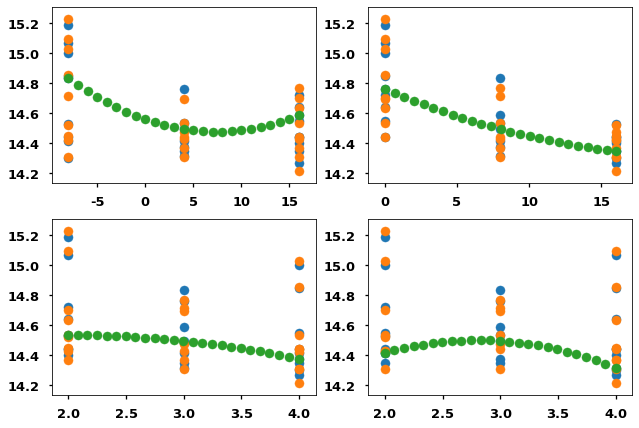

In [232]:
plt.subplot(2,2,1)
plt.scatter(Stock_Market['X1'],prediction) #모델 예측값
plt.scatter(Stock_Market['X1'],Stock_Market['Result']) #실제 값
plt.scatter(X_new1['X1'],prediction_graph1) #예측값의 경로를 추정하기 위한 값

plt.subplot(2,2,2)
plt.scatter(Stock_Market['X2'],prediction) #모델 예측값
plt.scatter(Stock_Market['X2'],Stock_Market['Result']) #실제 값
plt.scatter(X_new2['X2'],prediction_graph2) #예측값의 경로를 추정하기 위한 값

plt.subplot(2,2,3)
plt.scatter(Stock_Market['X3'],prediction) #모델 예측값
plt.scatter(Stock_Market['X3'],Stock_Market['Result']) #실제 값
plt.scatter(X_new3['X3'],prediction_graph3) #예측값의 경로를 추정하기 위한 값

plt.subplot(2,2,4)
plt.scatter(Stock_Market['X4'],prediction) #모델 예측값
plt.scatter(Stock_Market['X4'],Stock_Market['Result']) #실제 값
plt.scatter(X_new4['X4'],prediction_graph4) #예측값의 경로를 추정하기 위한 값